# Plasticity in evolutionary games
---

Things to do next:
- Reduce the inequalities defining global stability of plasticity in the Snowdrift game (if impossible with Sagemath, use Mathematica)
- Do a numerical study of the Rock-Paper-Scissors game to illustrate results on zero-sum games
- Eventually plot the 4-strategy dynamics in RPS with added plastic type; showing only the faces will not be enough because plasticity is unstable on the faces (a 2-player symmetric zero-sum game with added plastic type...).

(- Maybe simulate the stochastic version of adaptive dynamics in the Prisoner's Dilemma; IF I DECIDE TO INCLUDE THIS IN THE PAPER AND IF I HAVE TIME)

## Defining the model and functions for plotting results

In [1]:
%display typeset

In [2]:
#Payoff of a player adopting mixed strategy x when playing against an individual with the same strategy
#Alternatively, fitness in a population where the frequency of cooperators is x
f(x,R,S,T,P) = x*(x*R+(1-x)*S) + (1-x)*(x*T+(1-x)*P);
f

(x, R, S, T, P) |--> (P*(x - 1) - T*x)*(x - 1) - (S*(x - 1) - R*x)*x

In [3]:
dfx = diff(f,x);
paretoEq = solve(dfx==0,x);
paretoEq[0].rhs().subs(R=3,S=4,T=7,P=5)

1/6

/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


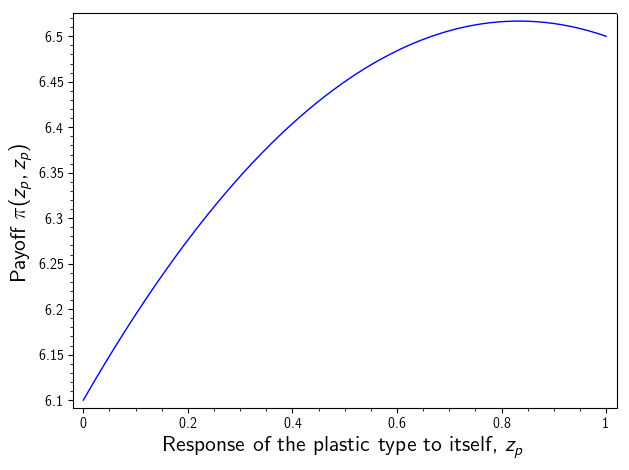

In [4]:
from matplotlib import rc, rcParams
rc('text',usetex=True)
rcParams['text.latex.preamble'] = [
       r'\usepackage{siunitx}',   # i need upright \micro symbols, but you need...
       r'\sisetup{detect-all}',   # ...this to force siunitx to actually use your fonts
       #r'\usepackage{fouriernc}',
       #r'\usepackage{times}',
       #r'\usepackage[defaultsans]{lato}',    # set the normal font here
       r'\usepackage{sansmath}',  # load up the sansmath so that math -> helvet
       r'\renewcommand\familydefault{\sfdefault}',
       r'\sansmath'               # <- tricky! -- gotta actually tell tex to use!
       #r'\footnotesize'
]
#rc('font',**{'family':'serif','serif':['fouriernc']})
rc('font',**{'family':'sans-serif','sans-serif':['Computer Modern']})
cR=6.5
cS=6.2
cT=7
cP=6.1
favg = plot(f(x,cR,cS,cT,cP),x,0,1,frame=True,axes=False,xmin=0.5,xmax=1,axes_labels=["Response of the plastic type to itself, $z_p$","Payoff $\\pi(z_p,z_p)$"]);
show(favg)
#save(favg,"fitAvg.pdf")

In [5]:
# This function computes the payoff obtained by an opponent of a plastic type. If the opponent is itself a plastic type, replace p_c=z_p
o_p(p_c,z,R,S,T,P) = p_c*z*R + p_c*(1-z)*S + (1-p_c)*z*T + (1-p_c)*(1-z)*P
o_p

(p_c, z, R, S, T, P) |--> P*(p_c - 1)*(z - 1) - S*p_c*(z - 1) - T*(p_c - 1)*z + R*p_c*z

In [6]:
o_p(z,z,R,S,T,P)

P*(z - 1)^2 - S*(z - 1)*z - T*(z - 1)*z + R*z^2

In [7]:
cR=2.5
cS=0.1
cT=5
cP=-1
intNE = solve(o_p(0,x,R,S,T,P)==o_p(1,x,R,S,T,P),x)[0].rhs()
intNE.subs(R=cR,S=cS,T=cT,P=cP)

0.305555555555556

In [8]:
#Fitness of the three possible types: Cooperator, Defector, and plastic type
w_c(x_c,x_d,R,S,T,P,z_c,z_d,z_p) = x_c*R + x_d*S + (1-x_c-x_d)*o_p(1,z_c,R,S,T,P);
w_d(x_c,x_d,R,S,T,P,z_c,z_d,z_p) = x_c*T + x_d*P + (1-x_c-x_d)*o_p(0,z_d,R,S,T,P);
w_p(x_c,x_d,R,S,T,P,k,z_c,z_d,z_p) = x_c*o_p(z_c,1,R,S,T,P) + x_d*o_p(z_d,0,R,S,T,P) + (1-x_c-x_d)*o_p(z_p,z_p,R,S,T,P) - k;

In [9]:
#Average fitness
w(x_c,x_d,R,S,T,P,k,z_c,z_d,z_p) = x_c*w_c(x_c,x_d,R,S,T,P,z_c,z_d,z_p) + x_d*w_d(x_c,x_d,R,S,T,P,z_c,z_d,z_p) + (1-x_c-x_d)*w_p(x_c,x_d,R,S,T,P,k,z_c,z_d,z_p);
w

(x_c, x_d, R, S, T, P, k, z_c, z_d, z_p) |--> ((P*(z_p - 1)^2 - S*(z_p - 1)*z_p - T*(z_p - 1)*z_p + R*z_p^2)*(x_c + x_d - 1) + (T*(z_c - 1) - R*z_c)*x_c + (P*(z_d - 1) - S*z_d)*x_d + k)*(x_c + x_d - 1) + ((S*(z_c - 1) - R*z_c)*(x_c + x_d - 1) + R*x_c + S*x_d)*x_c + ((P*(z_d - 1) - T*z_d)*(x_c + x_d - 1) + T*x_c + P*x_d)*x_d

In [10]:
repDyn2(x_c,x_d,R,S,T,P,k,z_c,z_d,z_p) = [x_c*(w_c(x_c,x_d,R,S,T,P,z_c,z_d,z_p) - w(x_c,x_d,R,S,T,P,k,z_c,z_d,z_p)), x_d*(w_d(x_c,x_d,R,S,T,P,z_c,z_d,z_p) - w(x_c,x_d,R,S,T,P,k,z_c,z_d,z_p))];
len(repDyn2)

2

In [11]:
j2=jacobian(repDyn2(x_c,x_d,R,S,T,P,k,z_c,z_d,z_p),(x_c,x_d))
j2

[-((P*(z_p - 1)^2 - S*(z_p - 1)*z_p - T*(z_p - 1)*z_p + R*z_p^2)*(x_c + x_d - 1) + (T*(z_c - 1) - R*z_c)*x_c + (P*(z_d - 1) - S*z_d)*x_d + k)*(x_c + x_d - 1) + (S*(z_c - 1) - R*z_c)*(x_c + x_d - 1) - ((P*(z_p - 1)^2 - S*(z_p - 1)*z_p - T*(z_p - 1)*z_p + R*z_p^2 + T*(z_c - 1) - R*z_c)*(x_c + x_d - 1) + (P*(z_p - 1)^2 - S*(z_p - 1)*z_p - T*(z_p - 1)*z_p + R*z_p^2)*(x_c + x_d - 1) + (S*(z_c - 1) - R*z_c)*(x_c + x_d - 1) + (S*(z_c - 1) - R*z_c + R)*x_c + (T*(z_c - 1) - R*z_c)*x_c + R*x_c + (P*(z_d - 1) - S*z_d)*x_d + (P*(z_d - 1) - T*z_d + T)*x_d + S*x_d - S*(z_c - 1) + R*z_c - R + k)*x_c - ((S*(z_c - 1) - R*z_c)*(x_c + x_d - 1) + R*x_c + S*x_d)*x_c + R*x_c - ((P*(z_d - 1) - T*z_d)*(x_c + x_d - 1) + T*x_c + P*x_d)*x_d + S*x_d                                                                                                                                                                                                                                                                                                                                                   -((P*(z_p - 1)^2 - S*(z_p - 1)*z_p - T*(z_p - 1)*z_p + R*z_p^2 + P*(z_d - 1) - S*z_d)*(x_c + x_d - 1) + (P*(z_p - 1)^2 - S*(z_p - 1)*z_p - T*(z_p - 1)*z_p + R*z_p^2)*(x_c + x_d - 1) + (P*(z_d - 1) - T*z_d)*(x_c + x_d - 1) + (S*(z_c - 1) - R*z_c + S)*x_c + (T*(z_c - 1) - R*z_c)*x_c + T*x_c + (P*(z_d - 1) - S*z_d)*x_d + (P*(z_d - 1) - T*z_d + P)*x_d + P*x_d - S*(z_c - 1) + R*z_c - S + k)*x_c]
[                                                                                                                                                                                                                                                                                                                                                  -((P*(z_p - 1)^2 - S*(z_p - 1)*z_p - T*(z_p - 1)*z_p + R*z_p^2 + T*(z_c - 1) - R*z_c)*(x_c + x_d - 1) + (P*(z_p - 1)^2 - S*(z_p - 1)*z_p - T*(z_p - 1)*z_p + R*z_p^2)*(x_c + x_d - 1) + (S*(z_c - 1) - R*z_c)*(x_c + x_d - 1) + (S*(z_c - 1) - R*z_c + R)*x_c + (T*(z_c - 1) - R*z_c)*x_c + R*x_c + (P*(z_d - 1) - S*z_d)*x_d + (P*(z_d - 1) - T*z_d + T)*x_d + S*x_d - P*(z_d - 1) + T*z_d - T + k)*x_d -((P*(z_p - 1)^2 - S*(z_p - 1)*z_p - T*(z_p - 1)*z_p + R*z_p^2)*(x_c + x_d - 1) + (T*(z_c - 1) - R*z_c)*x_c + (P*(z_d - 1) - S*z_d)*x_d + k)*(x_c + x_d - 1) + (P*(z_d - 1) - T*z_d)*(x_c + x_d - 1) - ((S*(z_c - 1) - R*z_c)*(x_c + x_d - 1) + R*x_c + S*x_d)*x_c + T*x_c - ((P*(z_p - 1)^2 - S*(z_p - 1)*z_p - T*(z_p - 1)*z_p + R*z_p^2 + P*(z_d - 1) - S*z_d)*(x_c + x_d - 1) + (P*(z_p - 1)^2 - S*(z_p - 1)*z_p - T*(z_p - 1)*z_p + R*z_p^2)*(x_c + x_d - 1) + (P*(z_d - 1) - T*z_d)*(x_c + x_d - 1) + (S*(z_c - 1) - R*z_c + S)*x_c + (T*(z_c - 1) - R*z_c)*x_c + T*x_c + (P*(z_d - 1) - S*z_d)*x_d + (P*(z_d - 1) - T*z_d + P)*x_d + P*x_d - P*(z_d - 1) + T*z_d - P + k)*x_d - ((P*(z_d - 1) - T*z_d)*(x_c + x_d - 1) + T*x_c + P*x_d)*x_d + P*x_d]

In [12]:
#eqsRep2=solve([repDyn2(x_c,x_d,R,S,T,P,k,z_c,z_d,z_p)[0]==0, repDyn2(x_c,x_d,R,S,T,P,k,z_c,z_d,z_p)[1]==0,(1-x_c-x_d)*(w_p(x_c,x_d,R,S,T,P,k,z_c,z_d,z_p) - w(x_c,x_d,R,S,T,P,k,z_c,z_d,z_p))==0],x_c,x_d);
#eqsRep2

In [13]:
#Fixing the response to cooperators but letting the response to defectors and plastic types be free
#c = var('c')
#y = var('y')
#d = var('d')
#Zc=c
#Zd=d
#Zp=y
#eqsc1d0p1 = solve([repDyn2(x_c,x_d,R,S,T,P,k,Zc,Zd,Zp)[0]==0, repDyn2(x_c,x_d,R,S,T,P,k,Zc,Zd,Zp)[1]==0,(1-x_c-x_d)*(w_p(x_c,x_d,R,S,T,P,k,Zc,Zd,Zp) - w(x_c,x_d,R,S,T,P,k,Zc,Zd,Zp))==0],x_c,x_d);
#eqsc1d0p1

In [14]:
Zc=1
Zd=0
Zp=1
eqsc1d0p1 = solve([repDyn2(x_c,x_d,R,S,T,P,k,Zc,Zd,Zp)[0]==0, repDyn2(x_c,x_d,R,S,T,P,k,Zc,Zd,Zp)[1]==0,(1-x_c-x_d)*(w_p(x_c,x_d,R,S,T,P,k,Zc,Zd,Zp) - w(x_c,x_d,R,S,T,P,k,Zc,Zd,Zp))==0],x_c,x_d);
eqsc1d0p1

[[x_c == 0, x_d == 0], [x_c == 0, x_d == (P - R + k)/(P - R)], [x_c == (P^2 - P*R - (P - R)*S + (R - S)*k)/(P^2 - P*S - (P - S)*T), x_d == k/(P - S)], [x_c == 1, x_d == 0], [x_c == 0, x_d == 1], [x_c == (P - S)/(P + R - S - T), x_d == (R - T)/(P + R - S - T)]]

In [15]:
Zc=0
Zd=1
Zp=1
eqsc0d1p1 = solve([repDyn2(x_c,x_d,R,S,T,P,k,Zc,Zd,Zp)[0]==0, repDyn2(x_c,x_d,R,S,T,P,k,Zc,Zd,Zp)[1]==0,(1-x_c-x_d)*(w_p(x_c,x_d,R,S,T,P,k,Zc,Zd,Zp) - w(x_c,x_d,R,S,T,P,k,Zc,Zd,Zp))==0],x_c,x_d);
eqsc0d1p1

[[x_c == 0, x_d == 0], [x_c == (R - S - k)/(2*R - S - T), x_d == 0], [x_c == 0, x_d == (R - T - k)/(P + R - S - T)], [x_c == (P*R - (P + R)*S + S^2 - (P - T)*k)/(2*P*R + R^2 - (P + 2*R)*S + S^2 - (P + 2*R - S)*T + T^2), x_d == (R^2 - 2*R*T + T^2 - (R - S)*k)/(2*P*R + R^2 - (P + 2*R)*S + S^2 - (P + 2*R - S)*T + T^2)], [x_c == 1, x_d == 0], [x_c == 0, x_d == 1], [x_c == (P - S)/(P + R - S - T), x_d == (R - T)/(P + R - S - T)]]

In [16]:
Zc=0
Zd=0
Zp=1
eqsc0d0p1 = solve([repDyn2(x_c,x_d,R,S,T,P,k,Zc,Zd,Zp)[0]==0, repDyn2(x_c,x_d,R,S,T,P,k,Zc,Zd,Zp)[1]==0,(1-x_c-x_d)*(w_p(x_c,x_d,R,S,T,P,k,Zc,Zd,Zp) - w(x_c,x_d,R,S,T,P,k,Zc,Zd,Zp))==0],x_c,x_d);
eqsc0d0p1

[[x_c == 0, x_d == 0], [x_c == (R - S - k)/(2*R - S - T), x_d == 0], [x_c == 0, x_d == (P - R + k)/(P - R)], [x_c == (P - S)/(P + R - S - T), x_d == (P*R - R^2 - (P - R)*T + (P + R - S - T)*k)/(P^2 - R^2 - (P - R)*S - (P - R)*T)], [x_c == 1, x_d == 0], [x_c == 0, x_d == 1], [x_c == (P - S)/(P + R - S - T), x_d == (R - T)/(P + R - S - T)]]

In [17]:
Zc=1
Zd=0
Zp=0
eqsc1d0p0 = solve([repDyn2(x_c,x_d,R,S,T,P,k,Zc,Zd,Zp)[0]==0, repDyn2(x_c,x_d,R,S,T,P,k,Zc,Zd,Zp)[1]==0,(1-x_c-x_d)*(w_p(x_c,x_d,R,S,T,P,k,Zc,Zd,Zp) - w(x_c,x_d,R,S,T,P,k,Zc,Zd,Zp))==0],x_c,x_d);
eqsc1d0p0

[[x_c == 0, x_d == 0], [x_c == (P - R - k)/(P - R), x_d == 0], [x_c == k/(R - T), x_d == -(P*R - R^2 - (P - R)*T - (P - T)*k)/(R^2 - R*S - (R - S)*T)], [x_c == 1, x_d == 0], [x_c == 0, x_d == 1], [x_c == (P - S)/(P + R - S - T), x_d == (R - T)/(P + R - S - T)]]

In [18]:
Zc=1
Zd=0
Zp=1
solve_ineq([repDyn2(x_c,x_d,R,S,T,P,k,Zc,Zd,Zp)[0]==0, repDyn2(x_c,x_d,R,S,T,P,k,Zc,Zd,Zp)[1]==0,(1-x_c-x_d)*(w_p(x_c,x_d,R,S,T,P,k,Zc,Zd,Zp) - w(x_c,x_d,R,S,T,P,k,Zc,Zd,Zp))==0,0<=x_c<=1,0<=x_d<=1,x_c+x_d<=1],[x_c,x_d])

[[x_c == 1, x_d == 0, k == 0, R - T == 0, 0 == 0],
 [x_c == 1, x_d == 0, k == 0, 0 == 0],
 [x_c == 1, x_d == 0, R - T == 0, 0 == 0],
 [x_c == 1, x_d == 0, 0 == 0],
 [x_c == 0, x_d == 1, k == 0, 0 == 0, P - S == 0],
 [x_c == 0, x_d == 1, k == 0, 0 == 0],
 [x_c == 0, x_d == 1, 0 == 0, P - S == 0],
 [x_c == 0, x_d == 1, 0 == 0],
 [x_c == -x_d + 1,
  0 < x_d,
  x_d < 1,
  2*P*(x_d - 1)*x_d - S*(x_d - 1)*x_d - T*(x_d - 1)*x_d - P*x_d^2 + R*x_d^2 - k*(x_d - 1) + P*x_d - R*x_d + k*x_d == 0,
  2*P*(x_d - 1)*x_d - S*(x_d - 1)*x_d - T*(x_d - 1)*x_d - P*x_d^2 + R*x_d^2 - P*(x_d - 1) + T*(x_d - 1) - k*(x_d - 1) + 2*P*x_d - 2*R*x_d + k*x_d - P + R - k == 0,
  2*P*(x_d - 1)*x_d - S*(x_d - 1)*x_d - T*(x_d - 1)*x_d - P*x_d^2 + R*x_d^2 - k*(x_d - 1) + 2*P*x_d - R*x_d - S*x_d + k*x_d - k == 0],
 [x_c == -x_d + 1,
  0 < x_d,
  x_d < 1,
  2*P*(x_d - 1)*x_d - S*(x_d - 1)*x_d - T*(x_d - 1)*x_d - P*x_d^2 + R*x_d^2 - P*(x_d - 1) + T*(x_d - 1) - k*(x_d - 1) + 2*P*x_d - 2*R*x_d + k*x_d - P + R - k == 0,
  2*P*(x_d - 1)*x_d - S*(x_d - 1)*x_d - T*(x_d - 1)*x_d - P*x_d^2 + R*x_d^2 - k*(x_d - 1) + 2*P*x_d - R*x_d - S*x_d + k*x_d - k == 0],
 [x_c == 0, x_d == 0, 0 == 0, -P + R - k == 0, -k == 0],
 [x_c == 0, x_d == 0, 0 == 0, -P + R - k == 0],
 [x_c == 0, x_d == 0, 0 == 0, -k == 0],
 [x_c == 0, x_d == 0, 0 == 0],
 [x_d == 0,
  0 < x_c,
  x_c < 1,
  k*x_c == 0,
  P*x_c - T*x_c + k*x_c - P + R - k == 0,
  k*x_c - k == 0],
 [x_d == 0, 0 < x_c, x_c < 1, k*x_c == 0, k*x_c - k == 0],
 [x_c == 0,
  0 < x_d,
  x_d < 1,
  -P*x_d^2 + R*x_d^2 + P*x_d - R*x_d + k*x_d == 0,
  -P*x_d^2 + R*x_d^2 + 2*P*x_d - 2*R*x_d + k*x_d - P + R - k == 0,
  -P*x_d^2 + R*x_d^2 + 2*P*x_d - R*x_d - S*x_d + k*x_d - k == 0],
 [x_c == 0,
  0 < x_d,
  x_d < 1,
  -P*x_d^2 + R*x_d^2 + P*x_d - R*x_d + k*x_d == 0,
  -P*x_d^2 + R*x_d^2 + 2*P*x_d - 2*R*x_d + k*x_d - P + R - k == 0],
 [0 < x_c,
  x_c < -x_d + 1,
  0 < x_d,
  x_d < 1,
  -2*P*x_c*x_d + S*x_c*x_d + T*x_c*x_d - P*x_d^2 + R*x_d^2 + k*x_c + P*x_d - R*x_d + k*x_d == 0,
  -2*P*x_c*x_d + S*x_c*x_d + T*x_c*x_d - P*x_d^2 + R*x_d^2 + P*x_c - T*x_c + k*x_c + 2*P*x_d - 2*R*x_d + k*x_d - P + R - k == 0,
  -2*P*x_c*x_d + S*x_c*x_d + T*x_c*x_d - P*x_d^2 + R*x_d^2 + k*x_c + 2*P*x_d - R*x_d - S*x_d + k*x_d - k == 0]]

In [19]:
eqsc0d1p1[5]

[x_c == 0, x_d == 1]

In [20]:
Zc=0
Zd=1
Zp=1
j2.subs(eqsc0d1p1[0],z_c=Zc,z_d=Zd,z_p=Zp).eigenvalues()

[-R + T + k, -R + S + k]

In [21]:
simToP(x,y)=(-(1/2)*x+1-y,(sqrt(3)/2)*x);
plToSim(x,y)=(2/3*sqrt(3)*y,-1/3*sqrt(3)*y - x + 1);

In [22]:
speed(x_c,x_d,R,S,T,P,k,z_c,z_d,z_p)=norm(vector(repDyn2(plToSim(x_c,x_d)[0],plToSim(x_c,x_d)[1],R,S,T,P,k,z_c,z_d,z_p)));
speed(0.2,0.1,8,0,5,5,0,0,1,1).n()

0.784875625486628

In [23]:
def setSimplex(strat1,strat2,strat3,fontSize,zd):
    bdr1=line([simToP(0,0), simToP(1,0)],color='black',aspect_ratio=1,axes=False,zorder=zd);
    bdr2=line([simToP(0,0), simToP(0,1)],color='black',axes=False,zorder=zd);
    bdr3=line([simToP(0,1), simToP(1,0)],color='black',axes=False,zorder=zd);
    lbl1=text(strat1, [simToP(0,0)[0]+0.032,simToP(0,0)[1]-0.022],fontsize=fontSize, color='black',axes=False,zorder=zd);
    lbl2=text(strat2, [simToP(1,0)[0],simToP(1,0)[1]+0.040],fontsize=fontSize, color='black',axes=False,zorder=zd);
    lbl3=text(strat3, [simToP(0,1)[0]-0.043,simToP(0,1)[1]-0.022],fontsize=fontSize, color='black',axes=False,zorder=zd);
    return(bdr1+bdr2+bdr3+lbl1+lbl2+lbl3)

In [24]:
bdrys(epsilon) = ((-(2*epsilon + sqrt(3))/(2*epsilon + 1))*x + (2*epsilon^2 + epsilon*(sqrt(3) + 2) + sqrt(3))/(2*epsilon + 1) - y)*(((2*epsilon + sqrt(3))/(2*epsilon + 1))*x + (2*epsilon^2 + sqrt(3)*epsilon)/(2*epsilon + 1) - y);
bdrys(0.1)

-(0.833333333333333*x*(sqrt(3) + 0.200000000000000) + y - 0.916666666666667*sqrt(3) - 0.183333333333333)*(0.833333333333333*x*(sqrt(3) + 0.200000000000000) - y + 0.0833333333333333*sqrt(3) + 0.0166666666666667)

In [25]:
def numSdeSimplexOld(x0,y0,R,S,T,P,k,z_c,z_d,z_p,step,parr,Tmax,col,arrSize,zd):
    x,y=var('x,y');
    sol=desolve_odeint(repDyn2(x,y,R,S,T,P,k,z_c,z_d,z_p),[x0,y0],srange(0,Tmax,step),[x,y]);
    solRev=desolve_odeint(-repDyn2(x,y,R,S,T,P,k,z_c,z_d,z_p),[x0,y0],srange(0,Tmax,step),[x,y]);
    
    solX=[];
    solY=[];
    solXrev=[];
    solYrev=[];
    for i in sol:
        cPt = simToP(i[0],i[1]);
        solX += [N(cPt[0])];
        solY += [N(cPt[1])];
    for i in solRev:
        cPt = simToP(i[0],i[1]);
        solXrev += [N(cPt[0])];
        solYrev += [N(cPt[1])];

    psol=line(zip(solX,solY),color=col,xmin=0, xmax=1,ymin=0, ymax=1,aspect_ratio=1, axes=False,ticks=[[],[]],frame=False,zorder=zd);
    psolRev=line(zip(solXrev,solYrev),color=col,xmin=0, xmax=1,ymin=0, ymax=1,aspect_ratio=1, axes=False,ticks=[[],[]],frame=False,zorder=zd);

    dirs=arrow((solX[integer_floor(parr[0]*len(solX))],solY[integer_floor(parr[0]*len(solX))]), (solX[integer_floor(parr[0]*len(solX))+1],solY[integer_floor(parr[0]*len(solX))+1]),width=1, arrowsize=arrSize,color=col,zorder=zd);
    dirsRev=arrow((solXrev[integer_floor(parr[0]*len(solXrev))+1],solYrev[integer_floor(parr[0]*len(solXrev))+1]), (solXrev[integer_floor(parr[0]*len(solXrev))],solYrev[integer_floor(parr[0]*len(solXrev))]),width=1, arrowsize=arrSize,color=col,zorder=zd);
    
    

    for i in [1..(len(parr)-1)]:
        dirs = dirs+arrow((solX[integer_floor(parr[i]*len(solX))],solY[integer_floor(parr[i]*len(solX))]), (solX[integer_floor(parr[i]*len(solX))+1],solY[integer_floor(parr[i]*len(solX))+1]),width=1, arrowsize=arrSize,color=col,zorder=zd);
        dirsRev = dirs+arrow((solXrev[integer_floor(parr[i]*len(solXrev))+1],solYrev[integer_floor(parr[i]*len(solXrev))+1]), (solXrev[integer_floor(parr[i]*len(solXrev))],solYrev[integer_floor(parr[i]*len(solXrev))]),width=1, arrowsize=arrSize,color=col,zorder=zd);
    return(psol+psolRev+dirs)

In [26]:
#Introducing my new arrow style
def numSdeSimplex2(x0,y0,R,S,T,P,k,z_c,z_d,z_p,step,parr,Tmax,col,arrSize,arrWidth,zd):
    x,y=var('x,y');
    sol=desolve_odeint(repDyn2(x,y,R,S,T,P,k,z_c,z_d,z_p),[x0,y0],srange(0,Tmax,step),[x,y]);
    solRev=desolve_odeint(-repDyn2(x,y,R,S,T,P,k,z_c,z_d,z_p),[x0,y0],srange(0,Tmax,step),[x,y]);
    
    solX=[];
    solY=[];
    solXrev=[];
    solYrev=[];
    for i in sol:
        cPt = simToP(i[0],i[1]);
        solX += [N(cPt[0])];
        solY += [N(cPt[1])];
    for i in solRev:
        cPt = simToP(i[0],i[1]);
        solXrev += [N(cPt[0])];
        solYrev += [N(cPt[1])];

    psol=line(zip(solX,solY),color=col,xmin=0, xmax=1,ymin=0, ymax=1,aspect_ratio=1, axes=False,ticks=[[],[]],frame=False,zorder=zd);
    psolRev=line(zip(solXrev,solYrev),color=col,xmin=0, xmax=1,ymin=0, ymax=1,aspect_ratio=1, axes=False,ticks=[[],[]],frame=False,zorder=zd);

    dirs=arrow_dyn2(xStart=[solX[integer_floor(parr[0]*len(solX))],solY[integer_floor(parr[0]*len(solX))]], xEnd=[solX[integer_floor(parr[0]*len(solX))+1],solY[integer_floor(parr[0]*len(solX))+1]],arrow_width=arrWidth, arrow_size=arrSize,arrow_color=col,zOrder=zd);

    dirsRev=arrow_dyn2(xStart=[solXrev[integer_floor(parr[0]*len(solXrev))],solYrev[integer_floor(parr[0]*len(solXrev))]], xEnd=[solXrev[integer_floor(parr[0]*len(solXrev))+1],solYrev[integer_floor(parr[0]*len(solXrev))+1]],arrow_width=arrWidth, arrow_size=arrSize,arrow_color=col,zOrder=zd);
    
    

    for i in [1..(len(parr)-1)]:
        dirs = dirs+arrow_dyn2(xStart=[solX[integer_floor(parr[i]*len(solX))],solY[integer_floor(parr[i]*len(solX))]], xEnd=[solX[integer_floor(parr[i]*len(solX))+1],solY[integer_floor(parr[i]*len(solX))+1]],arrow_width=arrWidth, arrow_size=arrSize,arrow_color=col,zOrder=zd);
        dirsRev = dirs+arrow_dyn2([solXrev[integer_floor(parr[i]*len(solXrev))+1],solYrev[integer_floor(parr[i]*len(solXrev))+1]], [solXrev[integer_floor(parr[i]*len(solXrev))],solYrev[integer_floor(parr[i]*len(solXrev))]],arrow_width=arrWidth, arrow_size=arrSize,arrow_color=col,zOrder=zd);
    return(psol+psolRev+dirs)

In [27]:
def eqShow(R,S,T,P,k,z_c,z_d,z_p,colSnk,colSdl,colSce,eqsAssume,ptSize,zd):
    var('x,y');


    source = []; #list of sources (both eigenvalues are positive)
    sink = []; #list of sinks (both eigenvalues are negative)
    saddle = []; #list of saddles (one neg., one pos. eig.)
    undet = []; #list of equilibria with both 0 eigenvalues

    numEqs = [];
    numEig = [];


    for i in range(len(eqsAssume)):
        numEqs += [[eqsAssume[i][0].rhs().subs(R=R,S=S,T=T,P=P,k=k,z_c=z_c,z_d=z_d,z_p=z_p).n(),eqsAssume[i][1].rhs().subs(R=R,S=S,T=T,P=P,k=k,z_c=z_c,z_d=z_d,z_p=z_p).n()]];
        if (imag_part(numEqs[i][0])!=0 or imag_part(numEqs[i][1])!=0):
            numEqs[i][0] = 99;#attributing unrealistic values in case there are complex eigenvalues, to draw attention
            numEqs[i][1] = 99;

    for i in range(len(eqsAssume)):
            numEig += [j2.subs(x_c=numEqs[i][0],x_d=numEqs[i][1],R=R,S=S,T=T,P=P,k=k,z_c=z_c,z_d=z_d,z_p=z_p).n().eigenvalues()]; #j is the name of the Jacobian matrix, defined above in the notebook

    for i in range(len(eqsAssume)):
        if (0<=numEqs[i][0]<=1 and 0<=numEqs[i][1]<=1):
                if (numEig[i][0]>0 and numEig[i][1]>0):
                    source += [simToP(numEqs[i][0],numEqs[i][1])];
                elif (numEig[i][0]>0 or numEig[i][1]>0):
                    saddle += [simToP(numEqs[i][0],numEqs[i][1])];
                elif (numEig[i][0]==0 or numEig[i][1]==0):
                    undet += [simToP(numEqs[i][0],numEqs[i][1])];
                else:
                    sink += [simToP(numEqs[i][0],numEqs[i][1])];

    pSink = point(sink,color=colSnk,faceted='True',markeredgecolor='black',size=ptSize,zorder=zd,axes=False,ticks=[[],[]],frame=False);
    pSource = point(source,color=colSce,faceted='True',markeredgecolor='black',size=ptSize,zorder=zd,axes=False,ticks=[[],[]],frame=False);
    pSaddle = point(saddle,color=colSdl,faceted='True',markeredgecolor='black',size=ptSize,zorder=zd,axes=False,ticks=[[],[]],frame=False);
    pUndet = point(undet,color='gray',faceted='True',markeredgecolor='black',size=ptSize,zorder=zd,axes=False,ticks=[[],[]],frame=False);

    return(pSink+pSource+pSaddle+pUndet)

In [28]:
#(R,S,T,P) = the payoffs of the 2-action pure-type game
#k = cost of plasticity
#(z_c,z_d,z_p) = probability that the plastic type cooperates against cooperators, defectors, and plastic types (resp.)
#colSnk = Color of sinks on the plot
#colSdl = Color of saddles
#colSce = Color of sources
#ptSize = size of the equilibria on the plot
#zd = layer of the plot (see Sagemath documentation for details)
def eqShowComp(R,S,T,P,k,z_c,z_d,z_p,colSnk,colSdl,colSce,ptSize,zd):
    var('x,y');


    source = []; #list of sources (both eigenvalues are positive)
    sink = []; #list of sinks (both eigenvalues are negative)
    saddle = []; #list of saddles (one neg., one pos. eig.)
    undet = []; #list of equilibria with both 0 eigenvalues

    numEqs = [];
    numEig = [];


    #Compute equilibria of the replicator dynamics
    nuEqsRaw = solve([repDyn2(x_c,x_d,R,S,T,P,k,z_c,z_d,z_p)[0]==0, repDyn2(x_c,x_d,R,S,T,P,k,z_c,z_d,z_p)[1]==0,(1-x_c-x_d)*(w_p(x_c,x_d,R,S,T,P,k,z_c,z_d,z_p) - w(x_c,x_d,R,S,T,P,k,z_c,z_d,z_p))==0],x_c,x_d);
    
    #Check that all equilibria are within the simplex
    for i in range(len(nuEqsRaw)):
        if (0 <=  nuEqsRaw[i][0].rhs() <= 1 and 0 <=  nuEqsRaw[i][1].rhs() <= 1 and nuEqsRaw[i][0].rhs() + nuEqsRaw[i][1].rhs() <= 1):
            numEqs += [[nuEqsRaw[i][0].rhs(),nuEqsRaw[i][1].rhs()]];
    #Check that equilibria are real
    for i in range(len(numEqs)):
        if (imag_part(numEqs[i][0])!=0 or imag_part(numEqs[i][1])!=0):
            numEqs[i][0] = 99;#attributing unrealistic values in case there are complex eigenvalues, to draw attention
            numEqs[i][1] = 99;

    #Compute eigenvalues of Jacobian evaluated at each equilibrium
    for i in range(len(numEqs)):
            numEig += [j2.subs(x_c=numEqs[i][0],x_d=numEqs[i][1],R=R,S=S,T=T,P=P,k=k,z_c=z_c,z_d=z_d,z_p=z_p).n().eigenvalues()]; #j2 is the name of the Jacobian matrix, defined above in the notebook

    #Classify equilibria into sinks, saddles, sources, degenerate
    for i in range(len(numEqs)):
        if (0<=numEqs[i][0]<=1 and 0<=numEqs[i][1]<=1):
                if (numEig[i][0]>0 and numEig[i][1]>0):
                    source += [simToP(numEqs[i][0],numEqs[i][1])];
                elif (numEig[i][0]>0 or numEig[i][1]>0):
                    saddle += [simToP(numEqs[i][0],numEqs[i][1])];
                elif (numEig[i][0]==0 or numEig[i][1]==0):
                    undet += [simToP(numEqs[i][0],numEqs[i][1])];
                else:
                    sink += [simToP(numEqs[i][0],numEqs[i][1])];

    #Plot equilibria
    pSink = point(sink,color=colSnk,faceted='True',markeredgecolor='black',size=ptSize,zorder=zd,axes=False,ticks=[[],[]],frame=False);
    pSource = point(source,color=colSce,faceted='True',markeredgecolor='black',size=ptSize,zorder=zd,axes=False,ticks=[[],[]],frame=False);
    pSaddle = point(saddle,color=colSdl,faceted='True',markeredgecolor='black',size=ptSize,zorder=zd,axes=False,ticks=[[],[]],frame=False);
    pUndet = point(undet,color='gray',faceted='True',markeredgecolor='black',size=ptSize,zorder=zd,axes=False,ticks=[[],[]],frame=False);

    return(pSink+pSource+pSaddle+pUndet)

In [29]:
#(R,S,T,P) = the payoffs of the 2-action pure-type game
#k = cost of plasticity
#(z_c,z_d,z_p) = probability that the plastic type cooperates against cooperators, defectors, and plastic types (resp.)
#colSnk = Color of sinks on the plot
#colSdl = Color of saddles
#colSce = Color of sources
#ptSize = size of the equilibria on the plot
#zd = layer of the plot (see Sagemath documentation for details)
def eqClassesComp(R,S,T,P,k,z_c,z_d,z_p):
    var('x,y');


    source = []; #list of sources (both eigenvalues are positive)
    sink = []; #list of sinks (both eigenvalues are negative)
    saddle = []; #list of saddles (one neg., one pos. eig.)
    undet = []; #list of equilibria with both 0 eigenvalues

    numEqs = [];
    numEig = [];


    #Compute equilibria of the replicator dynamics
    nuEqsRaw = solve([repDyn2(x_c,x_d,R,S,T,P,k,z_c,z_d,z_p)[0]==0.0, repDyn2(x_c,x_d,R,S,T,P,k,z_c,z_d,z_p)[1]==0.0,(1-x_c-x_d)*(w_p(x_c,x_d,R,S,T,P,k,z_c,z_d,z_p) - w(x_c,x_d,R,S,T,P,k,z_c,z_d,z_p))==0.0],x_c,x_d);
    
    #Check that all equilibria are within the simplex
    for i in range(len(nuEqsRaw)):
        if (0 <=  nuEqsRaw[i][0].rhs() <= 1 and 0 <=  nuEqsRaw[i][1].rhs() <= 1 and nuEqsRaw[i][0].rhs() + nuEqsRaw[i][1].rhs() <= 1):
            numEqs += [[n(nuEqsRaw[i][0].rhs()),n(nuEqsRaw[i][1].rhs())]];
    #Check that equilibria are real
    for i in range(len(numEqs)):
        if (imag_part(numEqs[i][0])!=0 or imag_part(numEqs[i][1])!=0):
            numEqs[i][0] = 99;#attributing unrealistic values in case there are complex eigenvalues, to draw attention
            numEqs[i][1] = 99;

    #Compute eigenvalues of Jacobian evaluated at each equilibrium
    for i in range(len(numEqs)):
            numEig += [j2.subs(x_c=numEqs[i][0],x_d=numEqs[i][1],R=R,S=S,T=T,P=P,k=k,z_c=z_c,z_d=z_d,z_p=z_p).n().eigenvalues()]; #j2 is the name of the Jacobian matrix, defined above in the notebook

    #Classify equilibria into sinks, saddles, sources, degenerate
    for i in range(len(numEqs)):
        if (0<=numEqs[i][0]<=1 and 0<=numEqs[i][1]<=1):
                if (numEig[i][0]>0 and numEig[i][1]>0):
                    source += [simToP(numEqs[i][0],numEqs[i][1])];
                elif (numEig[i][0]>0 or numEig[i][1]>0):
                    saddle += [simToP(numEqs[i][0],numEqs[i][1])];
                elif (numEig[i][0]==0 or numEig[i][1]==0):
                    undet += [simToP(numEqs[i][0],numEqs[i][1])];
                else:
                    sink += [simToP(numEqs[i][0],numEqs[i][1])];

    equilibria = {'sources': source, 'sinks': sink, 'saddles': saddle, 'undetermined': undet}
    
    return(equilibria)

In [30]:
cR=8
cS=0
cT=4
cP=5
ck=1
cZc=1
cZd=0
cZp=1
dicEqs = eqClassesComp(cR,cS,cT,cP,ck,cZc,cZd,cZp);
dicEqs

/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:37: UserWarning: Using generic algorithm for an inexact ring, which will probably give incorrect results due to numerical precision issues.


{'sources': [(0.277777777777778, 0.277777777777778*sqrt(3))],
 'sinks': [(0.500000000000000, 0.500000000000000*sqrt(3)),
  (0.000000000000000, 0.000000000000000)],
 'saddles': [(1, 0.000000000000000), (0.333333333333333, 0.000000000000000)],
 'undetermined': []}

In [31]:
def eqClasses(R,S,T,P,k,z_c,z_d,z_p,colSnk,colSdl,colSce,eqsAssume,ptSize,zd):
    var('x,y');


    source = []; #list of sources (both eigenvalues are positive)
    sink = []; #list of sinks (both eigenvalues are negative)
    saddle = []; #list of saddles (one neg., one pos. eig.)
    undet = []; #list of equilibria with both 0 eigenvalues

    numEqs = [];
    numEig = [];


    for i in range(len(eqsAssume)):
        numEqs += [[eqsAssume[i][0].rhs().subs(R=R,S=S,T=T,P=P,k=k,z_c=z_c,z_d=z_d,z_p=z_p).n(),eqsAssume[i][1].rhs().subs(R=R,S=S,T=T,P=P,k=k,z_c=z_c,z_d=z_d,z_p=z_p).n()]];
        if (imag_part(numEqs[i][0])!=0 or imag_part(numEqs[i][1])!=0):
            numEqs[i][0] = 99;#attributing unrealistic values in case there are complex eigenvalues, to draw attention
            numEqs[i][1] = 99;

    for i in range(len(eqsAssume)):
            numEig += [j2.subs(x_c=numEqs[i][0],x_d=numEqs[i][1],R=R,S=S,T=T,P=P,k=k,z_c=z_c,z_d=z_d,z_p=z_p).n().eigenvalues()]; #j is the name of the Jacobian matrix, defined above in the notebook

    for i in range(len(eqsAssume)):
        if (0<=numEqs[i][0]<=1 and 0<=numEqs[i][1]<=1):
                if (numEig[i][0]>0 and numEig[i][1]>0):
                    source += [simToP(numEqs[i][0],numEqs[i][1])];
                elif (numEig[i][0]>0 or numEig[i][1]>0):
                    saddle += [simToP(numEqs[i][0],numEqs[i][1])];
                elif (numEig[i][0]==0 or numEig[i][1]==0):
                    undet += [simToP(numEqs[i][0],numEqs[i][1])];
                else:
                    sink += [simToP(numEqs[i][0],numEqs[i][1])];

    equilibria = {'sources': source, 'sinks': sink, 'saddles': saddle, 'undetermined': undet}
    
    return(equilibria)

In [32]:
def eqsEigs(R,S,T,P,k,z_c,z_d,z_p,eqsAssume):
    var('x,y');


    source = []; #list of sources (both eigenvalues are positive)
    sink = []; #list of sinks (both eigenvalues are negative)
    saddle = []; #list of saddles (one neg., one pos. eig.)
    undet = []; #list of equilibria with both 0 eigenvalues

    numEqs = [];
    numEig = [];


    for i in range(len(eqsAssume)):
        numEqs += [[eqsAssume[i][0].rhs().subs(R=R,S=S,T=T,P=P,k=k,z_c=z_c,z_d=z_d,z_p=z_p).n(),eqsAssume[i][1].rhs().subs(R=R,S=S,T=T,P=P,k=k,z_c=z_c,z_d=z_d,z_p=z_p).n()]];
        if (imag_part(numEqs[i][0])!=0 or imag_part(numEqs[i][1])!=0):
            numEqs[i][0] = 99;#attributing unrealistic values in case there are complex eigenvalues, to draw attention
            numEqs[i][1] = 99;

    for i in range(len(eqsAssume)):
            numEig += [j2.subs(x_c=numEqs[i][0],x_d=numEqs[i][1],R=R,S=S,T=T,P=P,k=k,z_c=z_c,z_d=z_d,z_p=z_p).n().eigenvalues()]; #j is the name of the Jacobian matrix, defined above in the notebook

    for i in range(len(eqsAssume)):
        if (0<=numEqs[i][0]<=1 and 0<=numEqs[i][1]<=1):
                if (numEig[i][0]>0 and numEig[i][1]>0):
                    source += [simToP(numEqs[i][0],numEqs[i][1])];
                elif (numEig[i][0]>0 or numEig[i][1]>0):
                    saddle += [simToP(numEqs[i][0],numEqs[i][1])];
                elif (numEig[i][0]==0 or numEig[i][1]==0):
                    undet += [simToP(numEqs[i][0],numEqs[i][1])];
                else:
                    sink += [simToP(numEqs[i][0],numEqs[i][1])];


    return([numEqs,numEig])

## Explorations

/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


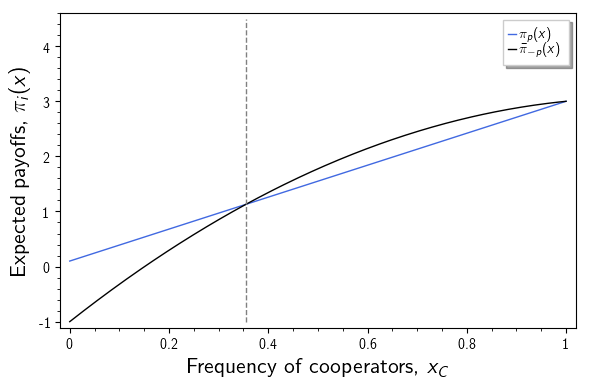

In [32]:
ck = 0
cR=3
cS=0.1
cT=5
cP=-1
zC=1
zD=1
zP=0.8
fitFreqP = plot(w_p(x,1-x,cR,cS,cT,cP,ck,zC,zD,zP),x,0,1,frame=True,axes=False,xmin=0.5,xmax=1,axes_labels=["Frequency of cooperators, $x$","Expected payoffs, $\\pi_i(x)$"], color='royalblue', legend_label='$\\pi_p(x)$');
avgFit = plot(x*w_c(x,1-x,cR,cS,cT,cP,zC,zD,zP) + (1-x)*w_d(x,1-x,cR,cS,cT,cP,zC,zD,zP),x,0,1,frame=True,axes=False,xmin=0.5,xmax=1,axes_labels=["Frequency of cooperators, $x_C$","Expected payoffs, $\\pi_i(x)$"], color='black', legend_label='$\\bar{\\pi}_{-p}(x)$');
NEvLine = line([(intNE.subs(R=cR,S=cS,T=cT,P=cP),-1), (intNE.subs(R=cR,S=cS,T=cT,P=cP),4.5)],color='gray',linestyle="--")

show(fitFreqP+avgFit+NEvLine)

In [33]:
#Condition for the optimum to be a maximum and within (0,1)
optZp = solve(derivative(f(x,R,S,T,P),x)==0,x);
solve_ineq([0<optZp[0].rhs(),optZp[0].rhs()<1,R+P<S+T],[R,S,T,P])

[[R < 1/2*S + 1/2*T, 2*P - T < S]]

In [34]:
#Condition for the optimum to be a maximum and within (0,1)
optZp = solve(derivative(f(x,R,S,T,P),x)==0,x);
solve_ineq([0<optZp[0].rhs().subs(R=1,P=0),optZp[0].rhs().subs(R=1,P=0)<1,1<S+T],[R,S,T,P])

[[-T + 2 < S]]

In [35]:
#Second-order condition for a maximum of pi(zp,zp)
solve_ineq([derivative(f(x,R,S,T,P),x,2)<0],[R,S,T,P])

[[R < -P + S + T]]

/Users/slimane/anaconda/envs/sage/lib/python3.6/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


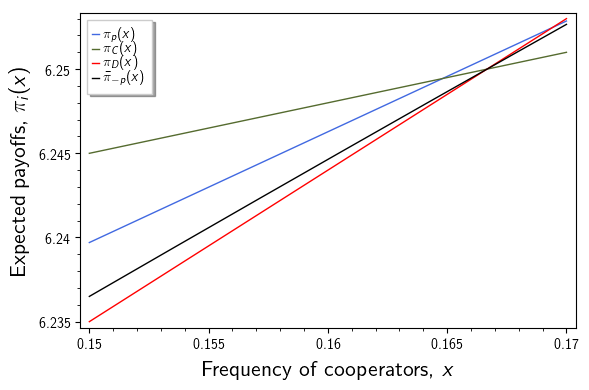

In [56]:
ck = 0.001
cR=6.5
cS=6.2
cT=7
cP=6.1
zC=0.4
zD=0.42
zP=1
fitFreqP = plot(w_p(x,1-x,cR,cS,cT,cP,ck,zC,zD,zP),x,0.15,0.17,frame=True,axes=False,xmin=0.15,xmax=0.17,axes_labels=["Frequency of cooperators, $x$","Expected payoffs, $\\pi_i(x)$"], color='royalblue', legend_label='$\\pi_p(x)$');
fitFreqC = plot(w_c(x,1-x,cR,cS,cT,cP,zC,zD,zP),x,0.15,0.17,frame=True,axes=False,xmin=0.15,xmax=0.17,axes_labels=["Frequency of cooperators, $x$","Expected payoffs, $\\pi_i(x)$"], color='darkolivegreen', legend_label='$\\pi_C(x)$');
fitFreqD = plot(w_d(x,1-x,cR,cS,cT,cP,zC,zD,zP),x,0.15,0.17,frame=True,axes=False,xmin=0.15,xmax=0.17,axes_labels=["Frequency of cooperators, $x$","Expected payoffs, $\\pi_i(x)$"], color='red', legend_label='$\\pi_D(x)$');
avgFit = plot(x*w_c(x,1-x,cR,cS,cT,cP,zC,zD,zP) + (1-x)*w_d(x,1-x,cR,cS,cT,cP,zC,zD,zP),x,0.15,0.17,frame=True,axes=False,xmin=0.15,xmax=0.17,axes_labels=["Frequency of cooperators, $x$","Expected payoffs, $\\pi_i(x)$"], color='black', legend_label='$\\bar{\\pi}_{-p}(x)$');

show(fitFreqP+fitFreqC+fitFreqD+avgFit)

Plotting the region where $w_p(\mathbf{x})>\bar{w}(\mathbf{x})$

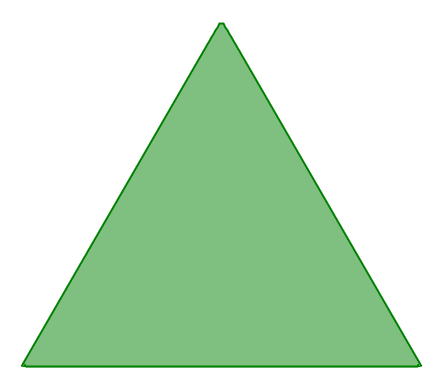

In [36]:
#o_p(p_c,z,R,S,T,P)
ck=0
cR=6.5
cS=6.2
cT=7
cP=6.1
cZc=0.3
cZd=0.42
cZp=1

csp = contour_plot(speed(x,y,cR,cS,cT,cP,ck,cZc,cZd,cZp), (x,0,1), (y,0,sqrt(3/4)),cmap='RdYlBu_r',region=bdrys(0.01),contours=20,axes=False,frame=False,zorder=50);


wpGwb = region_plot([w_p(plToSim(x_c,x_d)[0],plToSim(x_c,x_d)[1],cR,cS,cT,cP,ck,cZc,cZd,cZp) > w(plToSim(x_c,x_d)[0],plToSim(x_c,x_d)[1],cR,cS,cT,cP,ck,cZc,cZd,cZp),plToSim(x_c,x_d)[0]+plToSim(x_c,x_d)[1]<=1,plToSim(x_c,x_d)[0]>=0,plToSim(x_c,x_d)[1]>=0], (x_c,0,1), (x_d,0,sqrt(3/4)), incol='green', bordercol='green',axes_labels=["",""],frame=False,axes=False,alpha=0.5, fontsize = 16);

show(wpGwb)

In [37]:
qc=0.3
a1 = qc*w_c(qc,1-qc,cR,cS,cT,cP,zC,zD,zP) + (1-qc)*w_d(qc,1-qc,cR,cS,cT,cP,zC,zD,zP);
a2 =w_p(qc,1-qc,cR,cS,cT,cP,ck,zC,zD,zP);
[a1,a2]

[6.34600000000000, 6.29000000000000]

In [38]:
a1 = (cP*cR - cS*cT)/(cP + cR - cS - cT); # The Nash equilibrium payoff
a2 =w_p((cP - cS)/(cP - cS + cR - cT),1-(cP - cS)/(cP - cS + cR - cT),cR,cS,cT,cP,ck,zC,zD,zP);
[a1,a2]

[6.24999999999999, 6.25000000000000]

## Evolutionary dynamics of costly plasticity ($k>0$)

### Stag-hunt game

/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:37: UserWarning: Using generic algorithm for an inexact ring, which will probably give incorrect results due to numerical precision issues.
/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


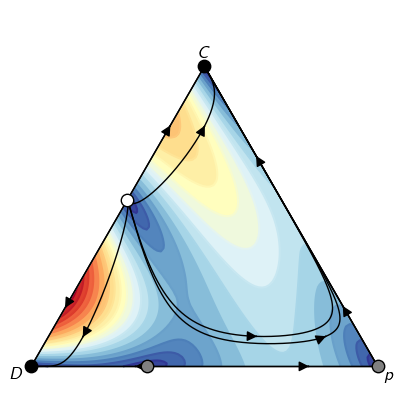

In [41]:
#Stag-hunt game
#Assuming z_c=0,z_d=1,z_p=1
cR=8
cS=0
cT=4
cP=5
ck=1
cZc=1
cZd=0
cZp=1
arrowSize=3;

fSim=setSimplex("$p$","$C$","$D$",13,53);
traj1=numSdeSimplex2(0.7,0,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',arrowSize,53);
traj2=numSdeSimplex2(0.2,0,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',arrowSize,53);
traj3=numSdeSimplex2(0,0.2,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',arrowSize,53);
traj4=numSdeSimplex2(0,0.7,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',arrowSize,53);
traj5=numSdeSimplex2(0.2,0.8,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',arrowSize,53);
traj6=numSdeSimplex2(0.8,0.2,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',arrowSize,53);
traj7=numSdeSimplex2(0.1,0.8,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',arrowSize,53);
traj8=numSdeSimplex2(0.8,0.1,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.000001],10,'black',arrowSize,53);
traj9=numSdeSimplex2(0.1,0.1,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.000001],10,'black',arrowSize,53);
traj10=numSdeSimplex2(0.1,0.3,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.000001],10,'black',arrowSize,53);
csp = contour_plot(speed(x,y,cR,cS,cT,cP,ck,cZc,cZd,cZp), (x,0,1), (y,0,sqrt(3/4)),cmap='RdYlBu_r',region=bdrys(0.01),contours=20,axes=False,frame=False,zorder=50);
hideOut1 = polygon2d([(0,sqrt(3/4)), simToP(0,1), simToP(1,0)], fill=True, thickness=1, color='white',axes=False,zorder=51);
hideOut2 = polygon2d([(1,sqrt(3/4)), simToP(0,0), simToP(1,0)], fill=True, thickness=1, color='white',axes=False,zorder=52);
stbEqs = eqShowComp(cR,cS,cT,cP,ck,cZc,cZd,cZp,'black','gray','white',80,54);
show(fSim+traj1+traj2+traj3+traj4+traj5+traj6+traj7+traj8+traj9+traj10+csp+hideOut1+hideOut2+stbEqs)
#save(fSim+traj1+traj2+traj3+traj4+traj5+traj6+traj7+csp+hideOut1+hideOut2+stbEqs,"resPayDom.pdf")

/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:37: UserWarning: Using generic algorithm for an inexact ring, which will probably give incorrect results due to numerical precision issues.
/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


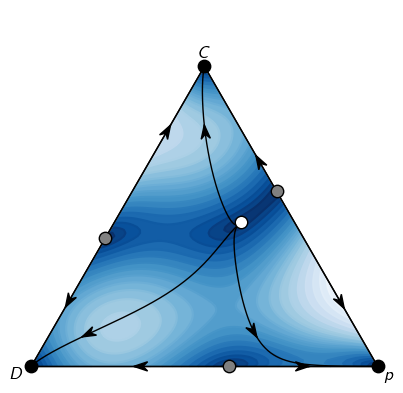

In [76]:
#Stag-hunt game
#Assuming z_c=0,z_d=1,z_p=1
cR=8
cS=0
cT=4
cP=3
ck=1
cZc=0
cZd=1
cZp=1
arrowSize=1/25.0;
arrowWidth=(1/3)*arrowSize

fSim=setSimplex("$p$","$C$","$D$",13,53);
traj1=numSdeSimplex2(0.7,0,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',arrowSize,arrowWidth,53);
traj2=numSdeSimplex2(0.2,0,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',arrowSize,arrowWidth,53);
traj3=numSdeSimplex2(0,0.2,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',arrowSize,arrowWidth,53);
traj4=numSdeSimplex2(0,0.7,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',arrowSize,arrowWidth,53);
traj5=numSdeSimplex2(0.2,0.8,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',arrowSize,arrowWidth,53);
traj6=numSdeSimplex2(0.8,0.2,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',arrowSize,arrowWidth,53);
traj7=numSdeSimplex2(0.1,0.8,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',arrowSize,arrowWidth,53);
traj8=numSdeSimplex2(0.8,0.1,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.000001],10,'black',arrowSize,arrowWidth,53);
traj9=numSdeSimplex2(0.1,0.1,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.000001],10,'black',arrowSize,arrowWidth,53);
traj10=numSdeSimplex2(0.1,0.3,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.000001],10,'black',arrowSize,arrowWidth,53);
csp = contour_plot(speed(x,y,cR,cS,cT,cP,ck,cZc,cZd,cZp), (x,0,1), (y,0,sqrt(3/4)),cmap='Blues_r',region=bdrys(0.01),contours=20,axes=False,frame=False,zorder=50);
hideOut1 = polygon2d([(0,sqrt(3/4)), simToP(0,1), simToP(1,0)], fill=True, thickness=1, color='white',axes=False,zorder=51);
hideOut2 = polygon2d([(1,sqrt(3/4)), simToP(0,0), simToP(1,0)], fill=True, thickness=1, color='white',axes=False,zorder=52);
stbEqs = eqShowComp(cR,cS,cT,cP,ck,cZc,cZd,cZp,'black','gray','white',80,54);
show(fSim+traj1+traj2+traj3+traj4+traj5+traj6+traj7+traj8+traj10+csp+hideOut1+hideOut2+stbEqs)
#save(fSim+traj1+traj2+traj3+traj4+traj5+traj6+traj7+csp+hideOut1+hideOut2+stbEqs,"resPayDom.pdf")

In [54]:
save(fSim+traj1+traj2+traj3+traj4+traj5+traj6+traj7+traj8+traj10+csp+hideOut1+hideOut2+stbEqs,"cdpSHunstable.pdf")

### Prisoner's dilemma game

/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:37: UserWarning: Using generic algorithm for an inexact ring, which will probably give incorrect results due to numerical precision issues.
/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


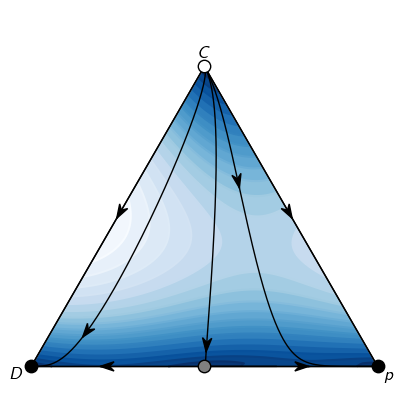

In [75]:
#Prisoner's Dilemma game
#Assuming z_c=0,z_d=0,z_p=1
cR=3
cS=-2
cT=5
cP=1
ck=1
cZc=0
cZd=0
cZp=1
arrowSize=1/25.0;
arrowWidth=(1/3)*arrowSize

fSim=setSimplex("$p$","$C$","$D$",13,53);
traj1=numSdeSimplex2(0.5,0,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',arrowSize,arrowWidth,53);
#traj2=numSdeSimplex2(0.2,0,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',arrowSize,arrowWidth,53);
traj3=numSdeSimplex2(0,0.2,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',arrowSize,arrowWidth,53);
traj4=numSdeSimplex2(0,0.8,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',arrowSize,arrowWidth,53);
traj5=numSdeSimplex2(0.5,0.5,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',arrowSize,arrowWidth,53);
#traj6=numSdeSimplex2(0.8,0.2,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',arrowSize,arrowWidth,53);
traj7=numSdeSimplex2(0.1,0.8,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',arrowSize,arrowWidth,53);
traj8=numSdeSimplex2(0.05,0.47,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.000001],10,'black',arrowSize,arrowWidth,53);
#traj9=numSdeSimplex2(0.1,0.1,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.000001],10,'black',arrowSize,arrowWidth,53);
traj10=numSdeSimplex2(0.6,0.1,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.00000001],10,'black',arrowSize,arrowWidth,53);
csp = contour_plot(speed(x,y,cR,cS,cT,cP,ck,cZc,cZd,cZp), (x,0,1), (y,0,sqrt(3/4)),cmap='Blues_r',region=bdrys(0.01),contours=20,axes=False,frame=False,zorder=50);
hideOut1 = polygon2d([(0,sqrt(3/4)), simToP(0,1), simToP(1,0)], fill=True, thickness=1, color='white',axes=False,zorder=51);
hideOut2 = polygon2d([(1,sqrt(3/4)), simToP(0,0), simToP(1,0)], fill=True, thickness=1, color='white',axes=False,zorder=52);
stbEqs = eqShowComp(cR,cS,cT,cP,ck,cZc,cZd,cZp,'black','gray','white',80,54);
show(fSim+traj1+traj3+traj4+traj5+traj7+traj8+traj10+csp+hideOut1+hideOut2+stbEqs)
#save(fSim+traj1+traj2+traj3+traj4+traj5+traj6+traj7+csp+hideOut1+hideOut2+stbEqs,"resPayDom.pdf")

In [155]:
save(fSim+traj1+traj3+traj4+traj5+traj7+traj8+traj10+csp+hideOut1+hideOut2+stbEqs,"cdpPD.pdf")

### Snowdrift game

In [66]:
cR=6.5
cS=6.2
cT=7
cP=6.1

(cR-cP)/(cT-cP)

0.444444444444445

/Applications/SageMath-8.9.app/Contents/Resources/sage/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:37: UserWarning: Using generic algorithm for an inexact ring, which will probably give incorrect results due to numerical precision issues.


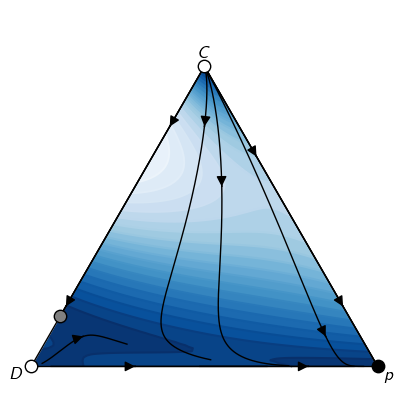

In [67]:
#Snowdrift game (like Hawk-Dove game with B=5 and C=3.5)
#Assuming z_c=0,z_d=0,z_p=1
ck=0
cR=6.5
cS=6.2
cT=7
cP=6.1
cZc=0.3
cZd=0.42
cZp=1
arrowSize=3;
timeTraj=50;

fSim=setSimplex("$p$","$C$","$D$",13,53);
traj1=numSdeSimplex2(0.7,0,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],timeTraj,'black',arrowSize,53);
traj2=numSdeSimplex2(0.2,0,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],timeTraj,'black',arrowSize,53);
traj3=numSdeSimplex2(0,0.2,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],timeTraj,'black',arrowSize,53);
traj4=numSdeSimplex2(0,0.7,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],timeTraj,'black',arrowSize,53);
traj5=numSdeSimplex2(0.2,0.8,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],timeTraj,'black',arrowSize,53);
traj6=numSdeSimplex2(0.8,0.2,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],timeTraj,'black',arrowSize,53);
traj7=numSdeSimplex2(0.1,0.8,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],timeTraj,'black',arrowSize,53);
traj8=numSdeSimplex2(0.8,0.1,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.000001],timeTraj,'black',arrowSize,53);
traj9=numSdeSimplex2(0.1,0.1,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.000001],timeTraj,'black',arrowSize,53);
traj10=numSdeSimplex2(0.6,0.15,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.000001],timeTraj,'black',arrowSize,53);
csp = contour_plot(speed(x,y,cR,cS,cT,cP,ck,cZc,cZd,cZp), (x,0,1), (y,0,sqrt(3/4)),cmap='Blues_r',region=bdrys(0.01),contours=20,axes=False,frame=False,zorder=50);
hideOut1 = polygon2d([(0,sqrt(3/4)), simToP(0,1), simToP(1,0)], fill=True, thickness=1, color='white',axes=False,zorder=51);
hideOut2 = polygon2d([(1,sqrt(3/4)), simToP(0,0), simToP(1,0)], fill=True, thickness=1, color='white',axes=False,zorder=52);
stbEqs = eqShowComp(cR,cS,cT,cP,ck,cZc,cZd,cZp,'black','gray','white',80,54);
show(fSim+traj1+traj2+traj3+traj4+traj5+traj6+traj7+traj8+traj9+traj10+csp+hideOut1+hideOut2+stbEqs)
#save(fSim+traj1+traj2+traj3+traj4+traj5+traj6+traj7+csp+hideOut1+hideOut2+stbEqs,"resPayDom.pdf")

In [150]:
save(fSim+traj1+traj2+traj3+traj4+traj5+traj6+traj7+traj8+traj9+traj10+csp+hideOut1+hideOut2+stbEqs,"cdpSD.pdf")

/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:37: UserWarning: Using generic algorithm for an inexact ring, which will probably give incorrect results due to numerical precision issues.
/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


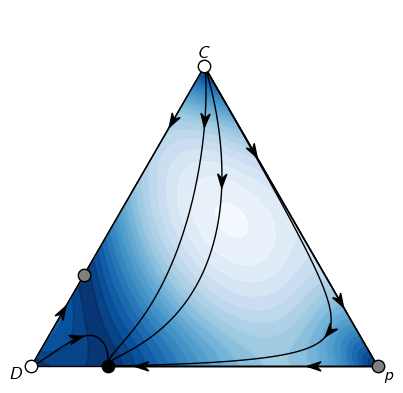

In [106]:
#Snowdrift game (like Hawk-Dove game with B=5 and C=3.5)
#Assuming z_c=0,z_d=0,z_p=1
#CAREFUL: DOVE IS THE COOPERATOR AND HAWK IS THE DEFECTOR
cR=2.5
cS=0.1
cT=5
cP=-1
ck=0.3
cZc=0.03
#cZd=0.45
cZd=1
cZp=0.9
arrowSize=1/25.0;
arrowWidth=(1/3)*arrowSize

fSim=setSimplex("$p$","$C$","$D$",13,53);
traj1=numSdeSimplex2(0.7,0,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',arrowSize,arrowWidth,53);
traj2=numSdeSimplex2(0.2,0,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',arrowSize,arrowWidth,53);
traj3=numSdeSimplex2(0,0.2,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',arrowSize,arrowWidth,53);
traj4=numSdeSimplex2(0,0.7,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',arrowSize,arrowWidth,53);
traj5=numSdeSimplex2(0.2,0.8,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',arrowSize,arrowWidth,53);
traj6=numSdeSimplex2(0.8,0.2,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',arrowSize,arrowWidth,53);
traj7=numSdeSimplex2(0.1,0.8,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],20,'black',arrowSize,arrowWidth,53);
traj8=numSdeSimplex2(0.8,0.1,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.000001],20,'black',arrowSize,arrowWidth,53);
traj9=numSdeSimplex2(0.1,0.1,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.000001],10,'black',arrowSize,arrowWidth,53);
traj10=numSdeSimplex2(0.6,0.15,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.000001],20,'black',arrowSize,arrowWidth,53);
csp = contour_plot(speed(x,y,cR,cS,cT,cP,ck,cZc,cZd,cZp), (x,0,1), (y,0,sqrt(3/4)),cmap='Blues_r',region=bdrys(0.01),contours=20,axes=False,frame=False,zorder=50);
hideOut1 = polygon2d([(0,sqrt(3/4)), simToP(0,1), simToP(1,0)], fill=True, thickness=1, color='white',axes=False,zorder=51);
hideOut2 = polygon2d([(1,sqrt(3/4)), simToP(0,0), simToP(1,0)], fill=True, thickness=1, color='white',axes=False,zorder=52);
stbEqs = eqShowComp(cR,cS,cT,cP,ck,cZc,cZd,cZp,'black','gray','white',80,54);
show(fSim+traj1+traj2+traj3+traj4+traj5+traj6+traj7+traj8+traj9+traj10+csp+hideOut1+hideOut2+stbEqs)
#save(fSim+traj1+traj2+traj3+traj4+traj5+traj6+traj7+csp+hideOut1+hideOut2+stbEqs,"resPayDom.pdf")

In [107]:
cR=2.5
cS=0.1
cT=5
cP=-1
ck=0.3
cZc=0.03
#cZd=0.45
cZd=1
cZp=0.9
dicEqs = eqClassesComp(cR,cS,cT,cP,ck,cZc,cZd,cZp);
dicEqs

/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:37: UserWarning: Using generic algorithm for an inexact ring, which will probably give incorrect results due to numerical precision issues.


{'sources': [(0.500000000000000, 0.500000000000000*sqrt(3)),
  (0.000000000000000, 0.000000000000000)],
 'sinks': [(0.220628792057364, 0.000000000000000)],
 'saddles': [(1, 0.000000000000000),
  (0.152777777777778, 0.152777777777778*sqrt(3))],
 'undetermined': []}

In [68]:
save(fSim+traj1+traj2+traj3+traj4+traj5+traj6+traj7+traj8+traj9+traj10+csp+hideOut1+hideOut2+stbEqs,'cdpSD.pdf')

In [40]:
sorted(colormaps)

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cool',
 'cool_r',
 'coolwarm',
 'coolwarm_r',
 'copper',
 'copper_r',
 'cubehelix',
 'cubehelix_r',
 'flag',
 'flag_r',
 'gist_earth',
 'gist_earth_r',
 'gist_gray',
 'gist_gray_r',
 'gist_heat',
 'gist_heat_r',
 'gist_ncar',
 'gist_ncar_r',
 'gist_rainbow',
 'gist_rainbow_r',
 'gist_stern',
 'gist_stern_r',
 'gist_yarg',
 'gist_yarg_r',
 'gnuplot',
 'gnuplot2',
 'gnuplot2_r',
 'gnuplot_r',
 'gray',
 'gray_r',
 'hot',
 'hot_r',
 'hsv',
 'hsv_r',
 'jet',
 'jet_r',
 'nipy_spectral',
 'nipy_spectral_r',
 'ocean',
 'ocean_r',
 'pink',
 'pink_r',
 'prism',
 'prism_r',
 'rainbow',
 'rainbow_r',
 'seismic',
 'seismic_r',
 'spring',
 'spring_r',
 'summer',
 'summer_r',
 'tab10',
 'tab10_r',
 'tab20',
 'tab20_r',
 'tab20b',
 'tab20b_r',
 'tab20c',
 'tab20c_r',
 'terrain',
 'terrain_r',
 'winter',
 'winter_r']

In [ ]:
#Snowdrift game (like Hawk-Dove game with B=5 and C=3.5)
#CAREFUL: DOVE IS THE COOPERATOR AND HAWK IS THE DEFECTOR
cR=2.5
cS=0.1
cT=5
cP=-1
ck=0.3
cZc=0
cZd=1
cZp=1
arrowSize=3;

fSim=setSimplex("$p$","$C$","$D$",13,53);
traj1=numSdeSimplex2(0.7,0,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',arrowSize,53);
traj2=numSdeSimplex2(0.2,0,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',arrowSize,53);
traj3=numSdeSimplex2(0,0.2,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',arrowSize,53);
traj4=numSdeSimplex2(0,0.7,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',arrowSize,53);
traj5=numSdeSimplex2(0.2,0.8,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',arrowSize,53);
traj6=numSdeSimplex2(0.8,0.2,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',arrowSize,53);
traj7=numSdeSimplex2(0.1,0.8,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],20,'black',arrowSize,53);
traj8=numSdeSimplex2(0.8,0.1,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.000001],20,'red',arrowSize,53);
traj9=numSdeSimplex2(0.1,0.1,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.000001],10,'black',arrowSize,53);
traj10=numSdeSimplex2(0.6,0.15,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.000001],20,'black',arrowSize,53);
csp = contour_plot(speed(x,y,cR,cS,cT,cP,ck,cZc,cZd,cZp), (x,0,1), (y,0,sqrt(3/4)),cmap='RdYlBu_r',region=bdrys(0.01),contours=20,axes=False,frame=False,zorder=50);
hideOut1 = polygon2d([(0,sqrt(3/4)), simToP(0,1), simToP(1,0)], fill=True, thickness=1, color='white',axes=False,zorder=51);
hideOut2 = polygon2d([(1,sqrt(3/4)), simToP(0,0), simToP(1,0)], fill=True, thickness=1, color='white',axes=False,zorder=52);
stbEqs = eqShowComp(cR,cS,cT,cP,ck,cZc,cZd,cZp,'black','gray','white',80,54);
show(fSim+traj1+traj2+traj3+traj4+traj5+traj6+traj7+traj9+traj10+csp+hideOut1+hideOut2+stbEqs)
#save(fSim+traj1+traj2+traj3+traj4+traj5+traj6+traj7+csp+hideOut1+hideOut2+stbEqs,"resPayDom.pdf")

In [ ]:
#Snowdrift game (like Hawk-Dove game with B=5 and C=3.5)
#Assuming z_c=0,z_d=0,z_p=1
cR=2.5
cS=0.1
cT=5
cP=-1
ck=1
cZc=0
cZd=1
cZp=1
fSim=setSimplex("$p$","$C$","$D$",13,53);
traj1=numSdeSimplex2(0.7,0,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',3,53);
traj2=numSdeSimplex2(0.2,0,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',3,53);
traj3=numSdeSimplex2(0,0.2,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',3,53);
traj4=numSdeSimplex2(0,0.7,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',3,53);
traj5=numSdeSimplex2(0.2,0.8,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',3,53);
traj6=numSdeSimplex2(0.8,0.2,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',3,53);
traj7=numSdeSimplex2(0.1,0.8,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',3,53);
traj8=numSdeSimplex2(0.8,0.1,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.000001],20,'black',3,53);
traj9=numSdeSimplex2(0.1,0.1,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.000001],10,'black',3,53);
traj10=numSdeSimplex2(0.6,0.15,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.000001],20,'black',3,53);
csp = contour_plot(speed(x,y,cR,cS,cT,cP,ck,cZc,cZd,cZp), (x,0,1), (y,0,sqrt(3/4)),cmap='RdYlBu_r',region=bdrys(0.01),contours=20,axes=False,frame=False,zorder=50);
hideOut1 = polygon2d([(0,sqrt(3/4)), simToP(0,1), simToP(1,0)], fill=True, thickness=1, color='white',axes=False,zorder=51);
hideOut2 = polygon2d([(1,sqrt(3/4)), simToP(0,0), simToP(1,0)], fill=True, thickness=1, color='white',axes=False,zorder=52);
stbEqs = eqShowComp(cR,cS,cT,cP,ck,cZc,cZd,cZp,'black','gray','white',130,54);
show(fSim+traj1+traj2+traj3+traj4+traj5+traj6+traj7+traj8+traj9+traj10+csp+hideOut1+hideOut2+stbEqs)
#save(fSim+traj1+traj2+traj3+traj4+traj5+traj6+traj7+csp+hideOut1+hideOut2+stbEqs,"resPayDom.pdf")

/Applications/SageMath-8.4.app/Contents/Resources/sage/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:24: UserWarning: Using generic algorithm for an inexact ring, which will probably give incorrect results due to numerical precision issues.


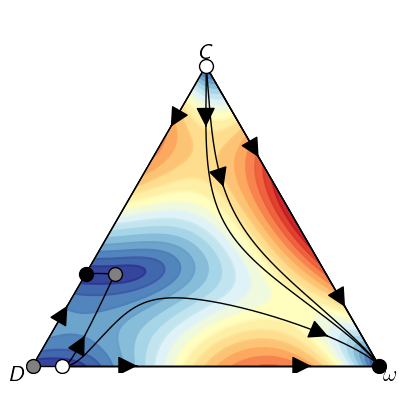

In [104]:
#Snowdrift game (like Hawk-Dove game with B=5 and C=3.5)
#Assuming z_c=0,z_d=0,z_p=1
cR=2.5
cS=0.1
cT=5
cP=-1
ck=0.3
cZc=0
cZd=0
cZp=1
fSim=setSimplex("$\\omega$","$C$","$D$",16,53);
traj1=numSdeSimplex2(0.7,0,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',6,53);
traj2=numSdeSimplex2(0.2,0,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',6,53);
traj3=numSdeSimplex2(0,0.2,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',6,53);
traj4=numSdeSimplex2(0,0.7,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',6,53);
traj5=numSdeSimplex2(0.2,0.8,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],20,'black',6,53);
traj6=numSdeSimplex2(0.8,0.2,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',6,53);
traj7=numSdeSimplex2(0.1,0.8,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],30,'black',6,53);
traj8=numSdeSimplex2(0.8,0.1,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.000001],10,'black',6,53);
traj9=numSdeSimplex2(0.1,0.1,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.000001],10,'black',6,53);
traj10=numSdeSimplex2(0.6,0.15,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.000001],10,'black',6,53);
csp = contour_plot(speed(x,y,cR,cS,cT,cP,ck,cZc,cZd,cZp), (x,0,1), (y,0,sqrt(3/4)),cmap='RdYlBu_r',region=bdrys(0.01),contours=20,axes=False,frame=False,zorder=50);
hideOut1 = polygon2d([(0,sqrt(3/4)), simToP(0,1), simToP(1,0)], fill=True, thickness=1, color='white',axes=False,zorder=51);
hideOut2 = polygon2d([(1,sqrt(3/4)), simToP(0,0), simToP(1,0)], fill=True, thickness=1, color='white',axes=False,zorder=52);
stbEqs = eqShowComp(cR,cS,cT,cP,ck,cZc,cZd,cZp,'black','gray','white',100,54);
show(fSim+traj1+traj2+traj3+traj4+traj5+traj6+traj7+traj8+traj9+traj10+csp+hideOut1+hideOut2+stbEqs)
#save(fSim+traj1+traj2+traj3+traj4+traj5+traj6+traj7+csp+hideOut1+hideOut2+stbEqs,"resPayDom.pdf")

### Resource consumption game
A game where local stability of plasticity is impossible

In [59]:
sorted(colormaps)

[u'Accent',
 u'Accent_r',
 u'Blues',
 u'Blues_r',
 u'BrBG',
 u'BrBG_r',
 u'BuGn',
 u'BuGn_r',
 u'BuPu',
 u'BuPu_r',
 u'CMRmap',
 u'CMRmap_r',
 u'Dark2',
 u'Dark2_r',
 u'GnBu',
 u'GnBu_r',
 u'Greens',
 u'Greens_r',
 u'Greys',
 u'Greys_r',
 u'OrRd',
 u'OrRd_r',
 u'Oranges',
 u'Oranges_r',
 u'PRGn',
 u'PRGn_r',
 u'Paired',
 u'Paired_r',
 u'Pastel1',
 u'Pastel1_r',
 u'Pastel2',
 u'Pastel2_r',
 u'PiYG',
 u'PiYG_r',
 u'PuBu',
 u'PuBuGn',
 u'PuBuGn_r',
 u'PuBu_r',
 u'PuOr',
 u'PuOr_r',
 u'PuRd',
 u'PuRd_r',
 u'Purples',
 u'Purples_r',
 u'RdBu',
 u'RdBu_r',
 u'RdGy',
 u'RdGy_r',
 u'RdPu',
 u'RdPu_r',
 u'RdYlBu',
 u'RdYlBu_r',
 u'RdYlGn',
 u'RdYlGn_r',
 u'Reds',
 u'Reds_r',
 u'Set1',
 u'Set1_r',
 u'Set2',
 u'Set2_r',
 u'Set3',
 u'Set3_r',
 u'Spectral',
 u'Spectral_r',
 u'Wistia',
 u'Wistia_r',
 u'YlGn',
 u'YlGnBu',
 u'YlGnBu_r',
 u'YlGn_r',
 u'YlOrBr',
 u'YlOrBr_r',
 u'YlOrRd',
 u'YlOrRd_r',
 u'afmhot',
 u'afmhot_r',
 u'autumn',
 u'autumn_r',
 u'binary',
 u'binary_r',
 u'bone',
 u'bone_r',
 u'brg',
 u'brg_r',
 u'bwr',
 u'bwr_r',
 u'cool',
 u'cool_r',
 u'coolwarm',
 u'coolwarm_r',
 u'copper',
 u'copper_r',
 u'cubehelix',
 u'cubehelix_r',
 u'flag',
 u'flag_r',
 u'gist_earth',
 u'gist_earth_r',
 u'gist_gray',
 u'gist_gray_r',
 u'gist_heat',
 u'gist_heat_r',
 u'gist_ncar',
 u'gist_ncar_r',
 u'gist_rainbow',
 u'gist_rainbow_r',
 u'gist_stern',
 u'gist_stern_r',
 u'gist_yarg',
 u'gist_yarg_r',
 u'gnuplot',
 u'gnuplot2',
 u'gnuplot2_r',
 u'gnuplot_r',
 u'gray',
 u'gray_r',
 u'hot',
 u'hot_r',
 u'hsv',
 u'hsv_r',
 u'jet',
 u'jet_r',
 u'nipy_spectral',
 u'nipy_spectral_r',
 u'ocean',
 u'ocean_r',
 u'pink',
 u'pink_r',
 u'prism',
 u'prism_r',
 u'rainbow',
 u'rainbow_r',
 u'seismic',
 u'seismic_r',
 u'spring',
 u'spring_r',
 u'summer',
 u'summer_r',
 u'tab10',
 u'tab10_r',
 u'tab20',
 u'tab20_r',
 u'tab20b',
 u'tab20b_r',
 u'tab20c',
 u'tab20c_r',
 u'terrain',
 u'terrain_r',
 u'winter',
 u'winter_r']

/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:37: UserWarning: Using generic algorithm for an inexact ring, which will probably give incorrect results due to numerical precision issues.
/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


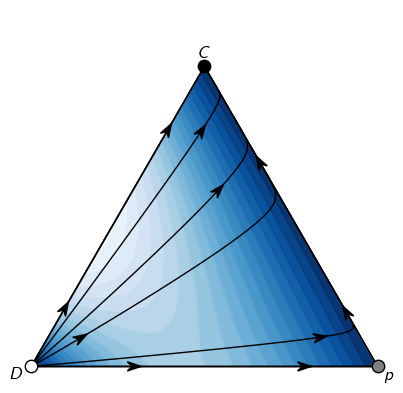

In [38]:
#Local stability of plasticity is impossible in the following game
cR=5
cS=10
cT=0
cP=0
ck=0.3
cZc=1
cZd=1
cZp=1
arrowSize=1/25.0;
arrowWidth=(1/3)*arrowSize
colTraj='black';

fSim=setSimplex("$p$","$C$","$D$",13,53);
traj1=numSdeSimplex2(0.7,0,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,colTraj,arrowSize,arrowWidth,53);
traj2=numSdeSimplex2(0.2,0,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,colTraj,arrowSize,arrowWidth,53);
traj3=numSdeSimplex2(0,0.2,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,colTraj,arrowSize,arrowWidth,53);
traj4=numSdeSimplex2(0,0.7,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,colTraj,arrowSize,arrowWidth,53);
traj5=numSdeSimplex2(0.2,0.8,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,colTraj,arrowSize,arrowWidth,53);
traj6=numSdeSimplex2(0.8,0.2,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,colTraj,arrowSize,arrowWidth,53);
traj7=numSdeSimplex2(0.1,0.8,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],20,colTraj,arrowSize,arrowWidth,53);
traj8=numSdeSimplex2(0.8,0.1,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.000001],20,colTraj,arrowSize,arrowWidth,53);
traj9=numSdeSimplex2(0.1,0.1,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.000001],10,colTraj,arrowSize,arrowWidth,53);
traj10=numSdeSimplex2(0.6,0.15,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.000001],20,colTraj,arrowSize,arrowWidth,53);
csp = contour_plot(speed(x,y,cR,cS,cT,cP,ck,cZc,cZd,cZp), (x,0,1), (y,0,sqrt(3/4)),cmap='Blues_r',region=bdrys(0.01),contours=20,axes=False,frame=False,zorder=50);
hideOut1 = polygon2d([(0,sqrt(3/4)), simToP(0,1), simToP(1,0)], fill=True, thickness=1, color='white',axes=False,zorder=51);
hideOut2 = polygon2d([(1,sqrt(3/4)), simToP(0,0), simToP(1,0)], fill=True, thickness=1, color='white',axes=False,zorder=52);
stbEqs = eqShowComp(cR,cS,cT,cP,ck,cZc,cZd,cZp,'black','gray','white',80,54);
show(fSim+traj1+traj2+traj3+traj4+traj5+traj6+traj7+traj8+traj9+traj10+csp+hideOut1+hideOut2+stbEqs)
#save(fSim+traj1+traj2+traj3+traj4+traj5+traj6+traj7+csp+hideOut1+hideOut2+stbEqs,"resPayDom.pdf")

In [64]:
save(fSim+traj1+traj2+traj3+traj4+traj5+traj6+traj7+traj8+traj9+traj10+csp+hideOut1+hideOut2+stbEqs,"cdpMGtest.pdf")

In [ ]:
#Local stability of plasticity is impossible in the following game
cR=5
cS=8
cT=6
cP=0
ck=0.3
cZc=1
cZd=1
cZp=0.72
arrowSize=3;
colTraj='black';

fSim=setSimplex("$p$","$C$","$D$",13,53);
traj1=numSdeSimplex2(0.7,0,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],100,colTraj,arrowSize,53);
traj2=numSdeSimplex2(0.2,0,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],100,colTraj,arrowSize,53);
traj3=numSdeSimplex2(0,0.2,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],100,colTraj,arrowSize,53);
traj4=numSdeSimplex2(0,0.7,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],100,colTraj,arrowSize,53);
traj5=numSdeSimplex2(0.2,0.8,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],100,colTraj,arrowSize,53);
traj6=numSdeSimplex2(0.8,0.2,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],100,colTraj,arrowSize,53);
traj7=numSdeSimplex2(0.1,0.8,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],100,colTraj,arrowSize,53);
traj8=numSdeSimplex2(0.8,0.1,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.000001],100,colTraj,arrowSize,53);
traj9=numSdeSimplex2(0.1,0.1,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.000001],100,colTraj,arrowSize,53);
traj10=numSdeSimplex2(0.6,0.15,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.000001],100,colTraj,arrowSize,53);
csp = contour_plot(speed(x,y,cR,cS,cT,cP,ck,cZc,cZd,cZp), (x,0,1), (y,0,sqrt(3/4)),cmap='RdYlBu_r',region=bdrys(0.01),contours=20,axes=False,frame=False,zorder=50);
hideOut1 = polygon2d([(0,sqrt(3/4)), simToP(0,1), simToP(1,0)], fill=True, thickness=1, color='white',axes=False,zorder=51);
hideOut2 = polygon2d([(1,sqrt(3/4)), simToP(0,0), simToP(1,0)], fill=True, thickness=1, color='white',axes=False,zorder=52);
stbEqs = eqShowComp(cR,cS,cT,cP,ck,cZc,cZd,cZp,'black','gray','white',80,54);
show(fSim+traj1+traj2+traj3+traj4+traj5+traj6+traj7+traj8+traj9+traj10+csp+hideOut1+hideOut2+stbEqs)
#save(fSim+traj1+traj2+traj3+traj4+traj5+traj6+traj7+csp+hideOut1+hideOut2+stbEqs,"resPayDom.pdf")

In [51]:
#eqShow(cR,cS,cT,cP,ck,cZc,cZd,cZp,'black','gray','white',eqsc0d1p1,80,54);
resEqsMG = eqsEigs(5,15,0,18,0.3,1,1,0,eqsc0d1p1);
(resEqsMG[0][5],resEqsMG[1][5])

/Applications/SageMath-8.4.app/Contents/Resources/sage/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:21: UserWarning: Using generic algorithm for an inexact ring, which will probably give incorrect results due to numerical precision issues.


([0.000000000000000, 1.00000000000000], [-3.00000000000001, -3.29999999999999])

In [50]:
save(fSim+traj1+traj2+traj3+traj4+traj5+traj6+traj7+traj8+traj9+traj10+csp+hideOut1+hideOut2+stbEqs,'cdpMG2.pdf')

In [ ]:
#Local stability of plasticity is impossible in the following game
cR=5
cS=6
cT=0
cP=0
ck=0.3
cZc=0
cZd=1
cZp=1
fSim=setSimplex("$p$","$C$","$D$",14,53);
traj1=numSdeSimplex2(0.7,0,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',3,53);
traj2=numSdeSimplex2(0.2,0,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',3,53);
traj3=numSdeSimplex2(0,0.2,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',3,53);
traj4=numSdeSimplex2(0,0.7,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',3,53);
traj5=numSdeSimplex2(0.2,0.8,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',3,53);
traj6=numSdeSimplex2(0.8,0.2,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',3,53);
traj7=numSdeSimplex2(0.1,0.8,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],20,'black',3,53);
traj8=numSdeSimplex2(0.8,0.1,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.000001],20,'black',3,53);
traj9=numSdeSimplex2(0.1,0.1,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.000001],10,'black',3,53);
traj10=numSdeSimplex2(0.6,0.15,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.000001],20,'black',3,53);
csp = contour_plot(speed(x,y,cR,cS,cT,cP,ck,cZc,cZd,cZp), (x,0,1), (y,0,sqrt(3/4)),cmap='RdYlBu_r',region=bdrys(0.01),contours=20,axes=False,frame=False,zorder=50);
hideOut1 = polygon2d([(0,sqrt(3/4)), simToP(0,1), simToP(1,0)], fill=True, thickness=1, color='white',axes=False,zorder=51);
hideOut2 = polygon2d([(1,sqrt(3/4)), simToP(0,0), simToP(1,0)], fill=True, thickness=1, color='white',axes=False,zorder=52);
stbEqs = eqShowComp(cR,cS,cT,cP,ck,cZc,cZd,cZp,'black','gray','white',130,54);
show(fSim+traj1+traj2+traj3+traj4+traj5+traj6+traj7+traj8+traj9+traj10+csp+hideOut1+hideOut2+stbEqs)
#save(fSim+traj1+traj2+traj3+traj4+traj5+traj6+traj7+csp+hideOut1+hideOut2+stbEqs,"resPayDom.pdf")

## Evolutionary dynamics of costless plasticity ($k=0$)

/Applications/SageMath-8.4.app/Contents/Resources/sage/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:24: UserWarning: Using generic algorithm for an inexact ring, which will probably give incorrect results due to numerical precision issues.


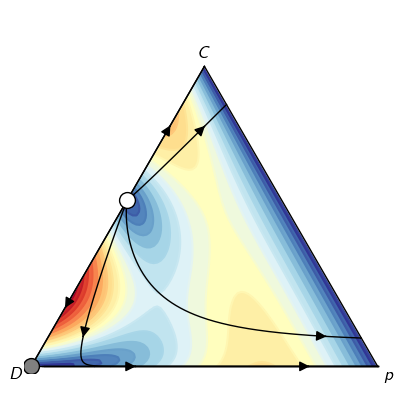

In [109]:
#Stag-hunt game
#Assuming z_c=1,z_d=0,z_p=1 (best-response + pareto with self)
cR=8
cS=0
cT=4
cP=5
ck=0
cZc=1
cZd=0
cZp=1
fSim=setSimplex("$p$","$C$","$D$",13,53);
traj1=numSdeSimplex2(0.7,0,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',3,53);
traj2=numSdeSimplex2(0.2,0,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',3,53);
traj3=numSdeSimplex2(0,0.2,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',3,53);
traj4=numSdeSimplex2(0,0.7,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',3,53);
traj5=numSdeSimplex2(0.2,0.8,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',3,53);
traj6=numSdeSimplex2(0.8,0.2,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',3,53);
traj7=numSdeSimplex2(0.1,0.8,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',3,53);
traj8=numSdeSimplex2(0.8,0.1,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.000001],10,'black',3,53);
traj9=numSdeSimplex2(0.1,0.1,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.000001],10,'black',3,53);
traj10=numSdeSimplex2(0.1,0.3,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.000001],10,'black',3,53);
csp = contour_plot(speed(x,y,cR,cS,cT,cP,ck,cZc,cZd,cZp), (x,0,1), (y,0,sqrt(3/4)),cmap='RdYlBu_r',region=bdrys(0.01),contours=20,axes=False,frame=False,zorder=50);
hideOut1 = polygon2d([(0,sqrt(3/4)), simToP(0,1), simToP(1,0)], fill=True, thickness=1, color='white',axes=False,zorder=51);
hideOut2 = polygon2d([(1,sqrt(3/4)), simToP(0,0), simToP(1,0)], fill=True, thickness=1, color='white',axes=False,zorder=52);
stbEqs = eqShowComp(cR,cS,cT,cP,ck,cZc,cZd,cZp,'black','gray','white',130,54);
show(fSim+traj1+traj2+traj3+traj4+traj5+traj6+traj7+traj8+traj9+csp+hideOut1+hideOut2+stbEqs)
#save(fSim+traj1+traj2+traj3+traj4+traj5+traj6+traj7+csp+hideOut1+hideOut2+stbEqs,"resPayDom.pdf")

In [81]:
save(fSim+traj1+traj2+traj3+traj4+traj5+traj6+traj7+traj8+traj9+traj10+csp+hideOut1+hideOut2+stbEqs,"cdpSHk0.pdf")

/Applications/SageMath-8.4.app/Contents/Resources/sage/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:24: UserWarning: Using generic algorithm for an inexact ring, which will probably give incorrect results due to numerical precision issues.


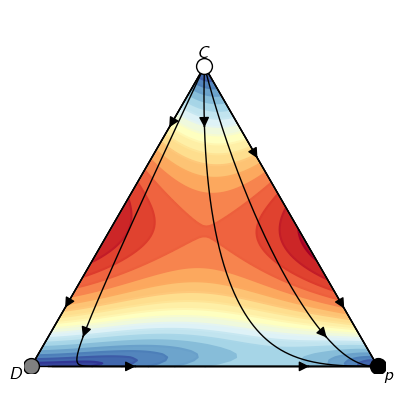

In [111]:
#Prisoner's Dilemma game
#Assuming z_c=0,z_d=0,z_p=1
cR=3
cS=-2
cT=5
cP=1
ck=0
cZc=0
cZd=0
cZp=1
fSim=setSimplex("$p$","$C$","$D$",13,53);
traj1=numSdeSimplex2(0.7,0,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',3,53);
traj2=numSdeSimplex2(0.2,0,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',3,53);
traj3=numSdeSimplex2(0,0.2,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',3,53);
traj4=numSdeSimplex2(0,0.7,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',3,53);
traj5=numSdeSimplex2(0.2,0.8,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',3,53);
traj6=numSdeSimplex2(0.8,0.2,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',3,53);
traj7=numSdeSimplex2(0.1,0.8,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',3,53);
traj8=numSdeSimplex2(0.8,0.1,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.000001],10,'black',3,53);
traj9=numSdeSimplex2(0.1,0.1,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.000001],10,'black',3,53);
traj10=numSdeSimplex2(0.1,0.3,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.000001],10,'black',3,53);
csp = contour_plot(speed(x,y,cR,cS,cT,cP,ck,cZc,cZd,cZp), (x,0,1), (y,0,sqrt(3/4)),cmap='RdYlBu_r',region=bdrys(0.01),contours=20,axes=False,frame=False,zorder=50);
hideOut1 = polygon2d([(0,sqrt(3/4)), simToP(0,1), simToP(1,0)], fill=True, thickness=1, color='white',axes=False,zorder=51);
hideOut2 = polygon2d([(1,sqrt(3/4)), simToP(0,0), simToP(1,0)], fill=True, thickness=1, color='white',axes=False,zorder=52);
stbEqs = eqShowComp(cR,cS,cT,cP,ck,cZc,cZd,cZp,'black','gray','white',130,54);
show(fSim+traj1+traj2+traj3+traj4+traj5+traj6+traj7+traj8+traj9+csp+hideOut1+hideOut2+stbEqs)
#save(fSim+traj1+traj2+traj3+traj4+traj5+traj6+traj7+csp+hideOut1+hideOut2+stbEqs,"resPayDom.pdf")

In [86]:
save(fSim+traj1+traj2+traj3+traj4+traj5+traj6+traj7+traj8+traj9+csp+hideOut1+hideOut2+stbEqs,"cdpPDk0.pdf")

/Applications/SageMath-8.4.app/Contents/Resources/sage/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:24: UserWarning: Using generic algorithm for an inexact ring, which will probably give incorrect results due to numerical precision issues.


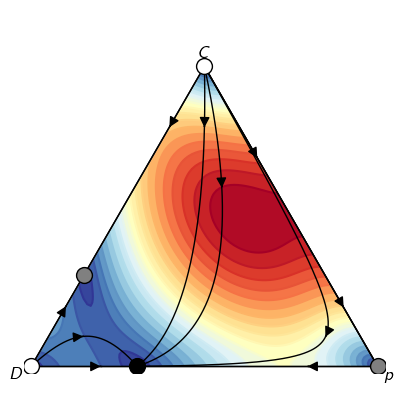

In [113]:
#Snowdrift game (like Hawk-Dove game with B=5 and C=3.5)
#Assuming z_c=0,z_d=1,z_p=1 (best-response + pareto with self)
cR=2.5
cS=0.1
cT=5
cP=-1
ck=0
cZc=0
cZd=1
cZp=1
fSim=setSimplex("$p$","$C$","$D$",13,53);
traj1=numSdeSimplex2(0.7,0,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',3,53);
traj2=numSdeSimplex2(0.2,0,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',3,53);
traj3=numSdeSimplex2(0,0.2,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',3,53);
traj4=numSdeSimplex2(0,0.8,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',3,53);
traj5=numSdeSimplex2(0.2,0.8,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',3,53);
traj6=numSdeSimplex2(0.8,0.2,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',3,53);
traj7=numSdeSimplex2(0.1,0.8,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.0001],10,'black',3,53);
traj8=numSdeSimplex2(0.8,0.1,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.000001],10,'black',3,53);
traj9=numSdeSimplex2(0.1,0.1,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.000001],10,'black',3,53);
traj10=numSdeSimplex2(0.6,0.15,cR,cS,cT,cP,ck,cZc,cZd,cZp,0.01,[0.000001],10,'black',3,53);
csp = contour_plot(speed(x,y,cR,cS,cT,cP,ck,cZc,cZd,cZp), (x,0,1), (y,0,sqrt(3/4)),cmap='RdYlBu_r',region=bdrys(0.01),contours=20,axes=False,frame=False,zorder=50);
hideOut1 = polygon2d([(0,sqrt(3/4)), simToP(0,1), simToP(1,0)], fill=True, thickness=1, color='white',axes=False,zorder=51);
hideOut2 = polygon2d([(1,sqrt(3/4)), simToP(0,0), simToP(1,0)], fill=True, thickness=1, color='white',axes=False,zorder=52);
stbEqs = eqShowComp(cR,cS,cT,cP,ck,cZc,cZd,cZp,'black','gray','white',130,54);
show(fSim+traj1+traj2+traj3+traj4+traj5+traj6+traj7+traj8+traj9+traj10+csp+hideOut1+hideOut2+stbEqs)
#save(fSim+traj1+traj2+traj3+traj4+traj5+traj6+traj7+csp+hideOut1+hideOut2+stbEqs,"resPayDom.pdf")

In [85]:
save(fSim+traj1+traj2+traj3+traj4+traj5+traj6+traj7+traj8+traj9+traj10+csp+hideOut1+hideOut2+stbEqs,"cdpSDk0.pdf")

## Regions of invasion and stability of plasticity

### Prisoner's Dilemma

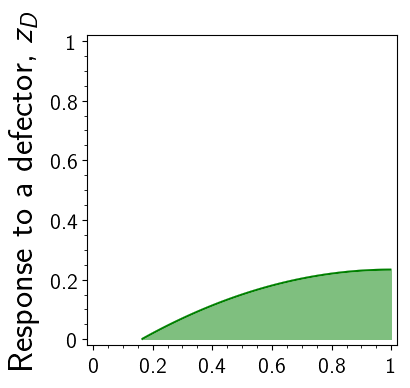

In [32]:
#o_p(p_c,z,R,S,T,P)
ck = 0.3
cR=3
cS=1
cT=5
cP=2
rpInvD = region_plot(o_p(0,y,cR,cS,cT,cP) < o_p(x,x,cR,cS,cT,cP) - ck, (x,0,1), (y,0,1), incol='green', bordercol='green',axes_labels=["","Response to a defector, $z_D$"],frame=True,axes=False,alpha=0.5, fontsize = 16);
save(rpInvD,"invDpd.pdf")
show(rpInvD)

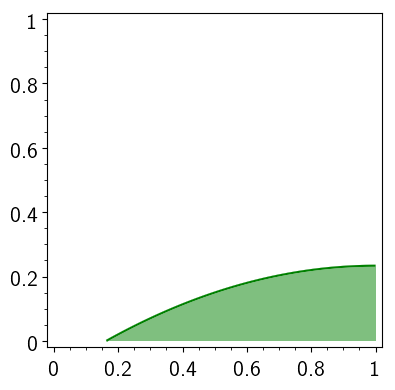

In [65]:
#o_p(p_c,z,R,S,T,P)
ck = 0.3
cR=3
cS=1
cT=5
cP=2
rpInvD = region_plot(o_p(0,y,cR,cS,cT,cP) < o_p(x,x,cR,cS,cT,cP) - ck, (x,0,1), (y,0,1), incol='green', bordercol='green',axes_labels=["",""],frame=True,axes=False,alpha=0.5, fontsize = 16);
save(rpInvD,"invDpd.pdf")
show(rpInvD)

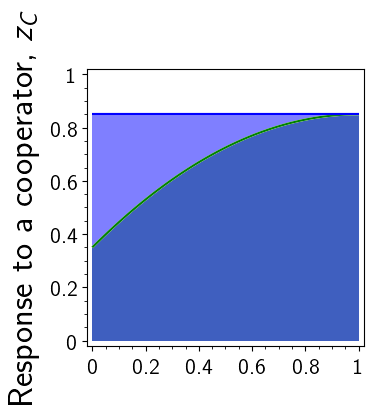

In [33]:
#o_p(p_c,z,R,S,T,P)
ck = 0.3
cR=3
cS=1
cT=5
cP=2
rpInvC = region_plot(o_p(1,y,cR,cS,cT,cP) < o_p(x,x,cR,cS,cT,cP) - ck, (x,0,1), (y,0,1), incol='green', bordercol='green',axes_labels=["","Response to a cooperator, $z_C$"],frame=True,axes=False,alpha=0.5, fontsize = 16);
rpInvpC = region_plot(o_p(1,1,cR,cS,cT,cP) < o_p(y,1,cR,cS,cT,cP) - ck, (x,0,1), (y,0,1), incol='blue', bordercol='blue',axes_labels=[""," Response to a cooperator, $z_C$"],frame=True,axes=False,alpha=0.5);
save(rpInvC+rpInvpC,"invCpd.pdf")
show(rpInvC+rpInvpC)

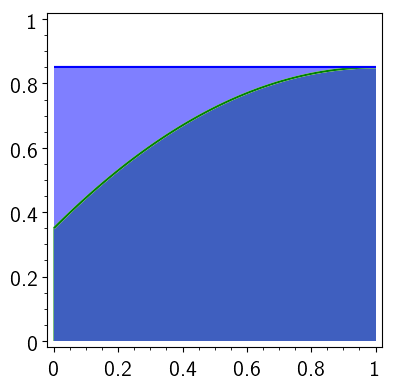

In [66]:
#o_p(p_c,z,R,S,T,P)
ck = 0.3
cR=3
cS=1
cT=5
cP=2
rpInvC = region_plot(o_p(1,y,cR,cS,cT,cP) < o_p(x,x,cR,cS,cT,cP) - ck, (x,0,1), (y,0,1), incol='green', bordercol='green',axes_labels=["",""],frame=True,axes=False,alpha=0.5, fontsize = 16);
rpInvpC = region_plot(o_p(1,1,cR,cS,cT,cP) < o_p(y,1,cR,cS,cT,cP) - ck, (x,0,1), (y,0,1), incol='blue', bordercol='blue',axes_labels=["",""],frame=True,axes=False,alpha=0.5);
save(rpInvC+rpInvpC,"invCpd.pdf")
show(rpInvC+rpInvpC)

### Stag-hunt

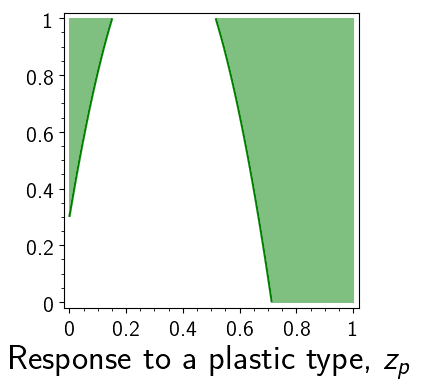

In [34]:
#o_p(p_c,z,R,S,T,P)
ck = 0.3
cR=8
cS=0
cT=4
cP=5
rpInvD = region_plot(o_p(0,y,cR,cS,cT,cP) < o_p(x,x,cR,cS,cT,cP) - ck, (x,0,1), (y,0,1), incol='green', bordercol='green',axes_labels=["Response to a plastic type, $z_p$",""],frame=True,axes=False,alpha=0.5, fontsize = 16);
rpInvpD = region_plot(o_p(0,0,cR,cS,cT,cP) < o_p(y,0,cR,cS,cT,cP) - ck, (x,0,1), (y,0,1), incol='blue', bordercol='blue',axes_labels=["Response to a plastic type, $z_p$",""],frame=True,axes=False,alpha=0.5);
save(rpInvD,"invDsh.pdf")
show(rpInvD)

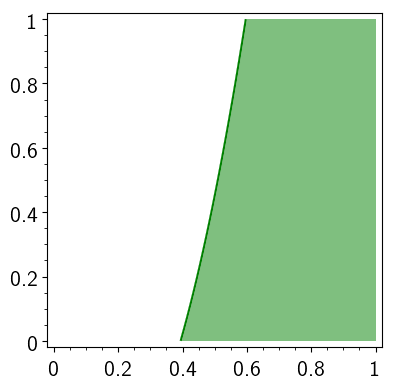

In [75]:
#o_p(p_c,z,R,S,T,P)
ck = 0.3
cR=8
cS=0
cT=4
cP=3
rpInvD = region_plot(o_p(0,y,cR,cS,cT,cP) < o_p(x,x,cR,cS,cT,cP) - ck, (x,0,1), (y,0,1), incol='green', bordercol='green',axes_labels=["",""],frame=True,axes=False,alpha=0.5, fontsize = 16);
rpInvpD = region_plot(o_p(0,0,cR,cS,cT,cP) < o_p(y,0,cR,cS,cT,cP) - ck, (x,0,1), (y,0,1), incol='blue', bordercol='blue',axes_labels=["",""],frame=True,axes=False,alpha=0.5);
save(rpInvD,"invDsh.pdf")
show(rpInvD)

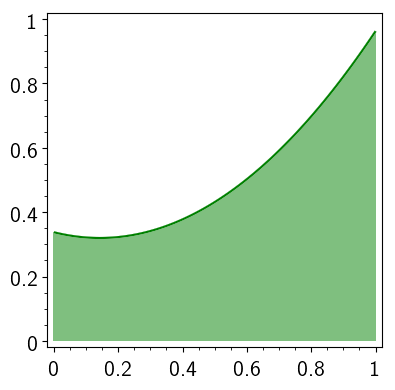

In [78]:
#o_p(p_c,z,R,S,T,P)
ck = 0.3
cR=8
cS=0
cT=4
cP=3
rpInvC = region_plot(o_p(1,y,cR,cS,cT,cP) < o_p(x,x,cR,cS,cT,cP) - ck, (x,0,1), (y,0,1), incol='green', bordercol='green',axes_labels=["",""],frame=True,axes=False,alpha=0.5, fontsize = 16);
rpInvpC = region_plot(o_p(1,1,cR,cS,cT,cP) < o_p(y,1,cR,cS,cT,cP) - ck, (x,0,1), (y,0,1), incol='blue', bordercol='blue',axes_labels=["Response to a plastic type, $z_p$"," Response to a cooperator, $z_C$"],frame=True,axes=False,alpha=0.5);
save(rpInvC,"invCsh.pdf")
show(rpInvC)

### Snowdrift

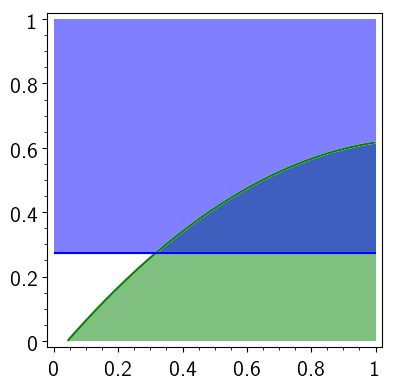

In [69]:
ck = 0.3
cR=3
cS=0.1
cT=5
cP=-1
rpInvD = region_plot(o_p(0,y,cR,cS,cT,cP) < o_p(x,x,cR,cS,cT,cP) - ck, (x,0,1), (y,0,1), incol='green', bordercol='green',axes_labels=["",""],frame=True,axes=False,alpha=0.5, fontsize = 16);
rpInvpD = region_plot(o_p(0,0,cR,cS,cT,cP) < o_p(y,0,cR,cS,cT,cP) - ck, (x,0,1), (y,0,1), incol='blue', bordercol='blue',axes_labels=["",""],frame=True,axes=False,alpha=0.5);
save(rpInvD+rpInvpD,"invDsd.pdf")
show(rpInvD+rpInvpD)

In [ ]:
#o_p(p_c,z,R,S,T,P)
ck = 0.3
cR=3
cS=0.1
cT=5
cP=-1
rpInvC = region_plot(o_p(1,y,cR,cS,cT,cP) < o_p(x,x,cR,cS,cT,cP) - ck, (x,0,1), (y,0,1), incol='green', bordercol='green',axes_labels=["",""],frame=True,axes=False,alpha=0.5, fontsize = 16);
rpInvpC = region_plot(o_p(1,1,cR,cS,cT,cP) < o_p(y,1,cR,cS,cT,cP) - ck, (x,0,1), (y,0,1), incol='blue', bordercol='blue',axes_labels=["",""],frame=True,axes=False,alpha=0.5);
save(rpInvC+rpInvpC,"invCsd.pdf")
show(rpInvC+rpInvpC)

In [ ]:
region_plot(o_p(1,y,cR,cS,cT,cP) < o_p(x,x,cR,cS,cT,cP) - ck, (x,0,1), (y,0,1), incol='green', bordercol='green',axes_labels=["Response to a plastic type, $z_p$"," Response to a cooperator, $z_C$"],frame=True,axes=False,alpha=0.5, fontsize = 14)

In [ ]:
graphics_array((),())

In [ ]:
rpInvC = region_plot(o_p(1,y,cR,cS,cT,cP) < o_p(x,x,cR,cS,cT,cP) - ck, (x,0,1), (y,0,1), incol='green', bordercol='green',axes_labels=["Response to a plastic type, $z_p$"," Response to a cooperator, $z_C$"],frame=True,axes=False,alpha=0.5,legend_label='Test');
rpInvC.set_legend_options(loc=(0.5, 0.9))
rpInvC.legend(True)
rpInvC.legend_label('Test')
show(rpInvC)

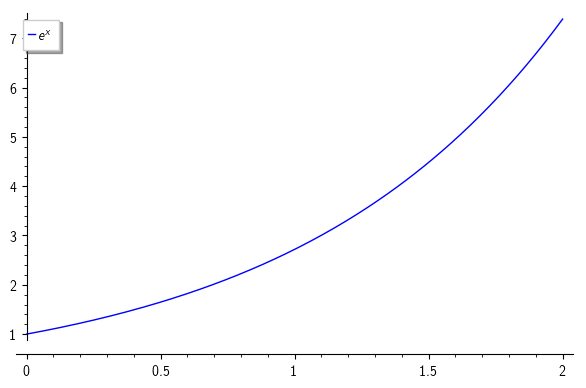

In [61]:
plot(exp(x), 0, 2, legend_label='$e^x$')

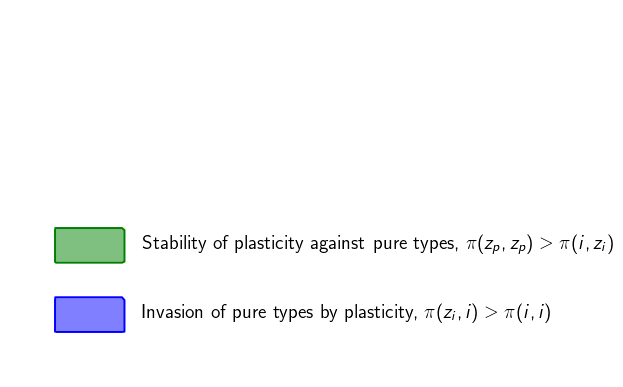

In [93]:
lgSq1 = region_plot([0.1<x,x<0.3,0.3<y,y<0.4], (x,0,1), (y,0,1), incol='green',bordercol='green',frame=False,axes=False,alpha=0.5,legend_label='Test')
t1 = text("Stability of plasticity against pure types, $\pi(z_p,z_p)>\pi(i,z_i)$", (0.35,0.35), horizontal_alignment="left",color='black',fontsize=14)
lgSq2 = region_plot([0.1<x,x<0.3,0.1<y,y<0.2], (x,0,1), (y,0,1), incol='blue',bordercol='blue',frame=False,axes=False,alpha=0.5,legend_label='Test')
t2 = text("Invasion of pure types by plasticity, $\pi(z_i,i)>\pi(i,i)$", (0.35,0.15), horizontal_alignment="left",color='black',fontsize=14)
save(lgSq1+t1+lgSq2+t2,"legendRegionIS.pdf")
show(lgSq1+t1+lgSq2+t2)

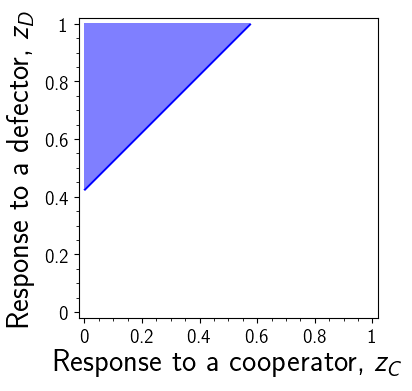

In [72]:
#Region where plasticity can invade a population at the mixed NE of the Snowdrift game
ck = 0.3
cR=3
cS=0.1
cT=5
cP=-1
rpInvD = region_plot(o_p(0,intNE.subs(R=cR,S=cS,T=cT,P=cP),cR,cS,cT,cP) < o_p(x,1,cR,cS,cT,cP)*intNE.subs(R=cR,S=cS,T=cT,P=cP) + o_p(y,0,cR,cS,cT,cP)*(1-intNE.subs(R=cR,S=cS,T=cT,P=cP)) - ck, (x,0,1), (y,0,1), incol='blue', bordercol='blue',axes_labels=["Response to a cooperator, $z_C$","Response to a defector, $z_D$"],frame=True,axes=False,alpha=0.5,fontsize = 14);
#rpInvpD = region_plot(o_p(0,0,cR,cS,cT,cP) < o_p(y,0,cR,cS,cT,cP) - ck, (x,0,1), (y,0,1), incol='blue', bordercol='blue',axes_labels=["",""],frame=True,axes=False,alpha=0.5);
save(rpInvD,"invNEsd.pdf")
show(rpInvD)

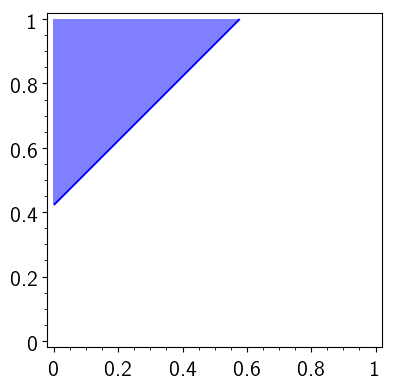

In [73]:
#Region where plasticity can invade a population at the mixed NE of the Snowdrift game
ck = 0.3
cR=3
cS=0.1
cT=5
cP=-1
rpInvD = region_plot(o_p(0,intNE.subs(R=cR,S=cS,T=cT,P=cP),cR,cS,cT,cP) < o_p(x,1,cR,cS,cT,cP)*intNE.subs(R=cR,S=cS,T=cT,P=cP) + o_p(y,0,cR,cS,cT,cP)*(1-intNE.subs(R=cR,S=cS,T=cT,P=cP)) - ck, (x,0,1), (y,0,1), incol='blue', bordercol='blue',axes_labels=["",""],frame=True,axes=False,alpha=0.5,fontsize = 16);
#rpInvpD = region_plot(o_p(0,0,cR,cS,cT,cP) < o_p(y,0,cR,cS,cT,cP) - ck, (x,0,1), (y,0,1), incol='blue', bordercol='blue',axes_labels=["",""],frame=True,axes=False,alpha=0.5);
save(rpInvD,"invNEsd.pdf")
show(rpInvD)

In [47]:
var('x,y,z')
region = implicit_plot3d(z, (x, -3, 3), (y, -3, 3), (z, -3, 3), plot_points=100, region=lambda x,y,z: y - 2*x<= 0 and 0<x and x<2 and 0<y and y<3)
#region.show()

In [32]:
solve(o_p(0,x,R,S,T,P)==o_p(1,x,R,S,T,P),x)[0].rhs()

(P - S)/(P + R - S - T)

In [31]:
cS

6

## Feasible payoffs

### Prisoner's dilemma game

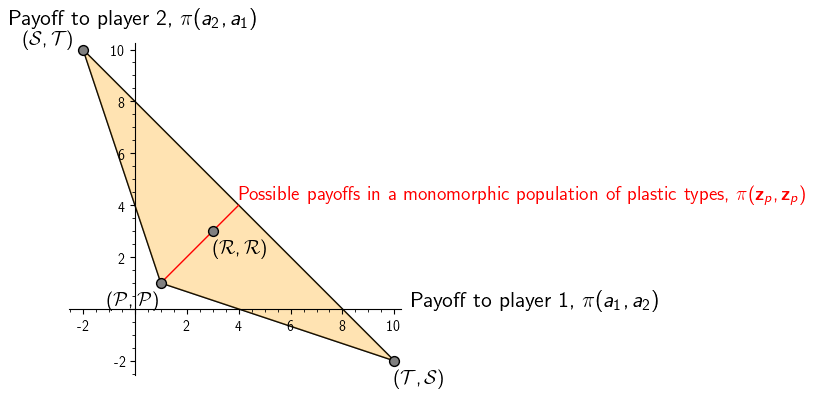

In [37]:
cR=3
cS=-2
cT=10
cP=1
cvxHullPayCs = polygon2d([[cP,cP], [cS,cT], [cT,cS]], color='black', fill=False,axes_labels=["Payoff to player 1, $\\pi(a_1,a_2)$","Payoff to player 2, $\\pi(a_2,a_1)$"],frame=False, axes=True)
cvxHullPay = polygon2d([[cP,cP], [cS,cT], [cT,cS]], color="orange", alpha=0.3, edgecolor='black', fill=True,axes_labels=["Payoff to player 1, $\\pi(a_1,a_2)$","Payoff to player 2, $\\pi(a_2,a_1)$"],frame=False, axes=True)
paySelf = line([(cP,cP), ((cT+cS)/2,(cT+cS)/2)],color='red')
tST = text("$(\\mathcal{S},\\mathcal{T})$", (cS-0.3,cT), vertical_alignment="bottom", horizontal_alignment="right",color='black',fontsize=14)
pST = point((cS,cT),color='gray',faceted='True',markeredgecolor='black',size=50,zorder=50)
tTS = text("$(\\mathcal{T},\\mathcal{S})$", (cT,cS-0.3), vertical_alignment="top", horizontal_alignment="left",color='black',fontsize=14)
pTS = point((cT,cS),color='gray',faceted='True',markeredgecolor='black',size=50,zorder=50)
tPP = text("$(\\mathcal{P},\\mathcal{P})$", (cP,cP-0.3), vertical_alignment="top", horizontal_alignment="right",color='black',fontsize=14)
pPP = point((cP,cP),color='gray',faceted='True',markeredgecolor='black',size=50,zorder=50)
tRR = text("$(\\mathcal{R},\\mathcal{R})$", (cR,cR-0.3), vertical_alignment="top", horizontal_alignment="left",color='black',fontsize=14)
pRR = point((cR,cR),color='gray',faceted='True',markeredgecolor='black',size=50,zorder=50)


tPay = text("Possible payoffs in a monomorphic population of plastic types, $\pi(\\mathbf{z}_p,\\mathbf{z}_p)$", ((cT+cS)/2,(cT+cS)/2), vertical_alignment="bottom", horizontal_alignment="left",color='red',fontsize=14)


show(cvxHullPayCs+cvxHullPay+paySelf+tST+pST+tTS+pTS+tPP+pPP+tRR+pRR+tPay)

In [128]:
save(cvxHullPay+paySelf+tST+pST+tTS+pTS+tPP+pPP+tRR+pRR+tPay,"cvxPay.pdf")

<input>:17: DeprecationWarning: invalid escape sequence \p
<input>:17: DeprecationWarning: invalid escape sequence \p
<input>:17: DeprecationWarning: invalid escape sequence \p
<input>:17: DeprecationWarning: invalid escape sequence \p
<input>:17: DeprecationWarning: invalid escape sequence \p
<input>:17: DeprecationWarning: invalid escape sequence \p
<input>:17: DeprecationWarning: invalid escape sequence \p
<input>:17: DeprecationWarning: invalid escape sequence \p
<input>:17: DeprecationWarning: invalid escape sequence \p
<input>:17: DeprecationWarning: invalid escape sequence \p
<input>:17: DeprecationWarning: invalid escape sequence \p
<input>:17: DeprecationWarning: invalid escape sequence \p
<ipython-input-44-b6ad26c0dff7>:17: DeprecationWarning: invalid escape sequence \p
  tPay = text("Possible payoffs in a monomorphic population of plastic types, $\pi(\\mathbf{z}_p,\\mathbf{z}_p)$", (cR+RealNumber('0.15'),cR), vertical_alignment="bottom", horizontal_alignment="left",color='re

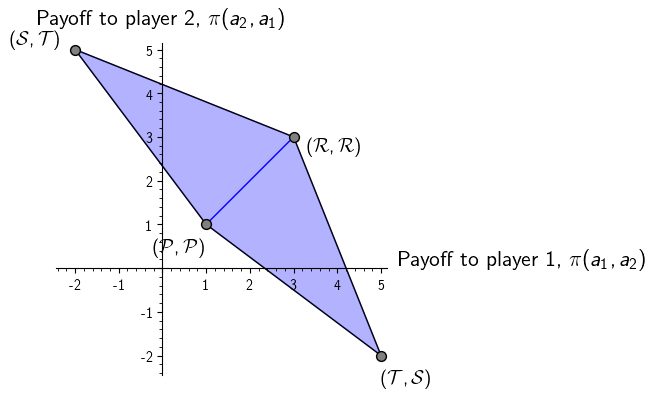

In [44]:
cR=3
cS=-2
cT=5
cP=1
cvxHullPayCs = polygon2d([[cP,cP], [cS,cT], [cR,cR], [cT,cS]], alpha=1, color='black', fill=False,axes_labels=["Payoff to player 1, $\\pi(a_1,a_2)$","Payoff to player 2, $\\pi(a_2,a_1)$"],frame=False, axes=True)
cvxHullPay = polygon2d([[cP,cP], [cS,cT], [cR,cR], [cT,cS]], color="blue", alpha=0.3, edgecolor='black', fill=True,axes_labels=["Payoff to player 1, $\\pi(a_1,a_2)$","Payoff to player 2, $\\pi(a_2,a_1)$"],frame=False, axes=True)
paySelf = line([(cP,cP), (cR,cR)],color='blue')
tST = text("$(\\mathcal{S},\\mathcal{T})$", (cS-0.3,cT), vertical_alignment="bottom", horizontal_alignment="right",color='black',fontsize=14)
pST = point((cS,cT),color='gray',faceted='True',markeredgecolor='black',size=50,zorder=50)
tTS = text("$(\\mathcal{T},\\mathcal{S})$", (cT,cS-0.3), vertical_alignment="top", horizontal_alignment="left",color='black',fontsize=14)
pTS = point((cT,cS),color='gray',faceted='True',markeredgecolor='black',size=50,zorder=50)
tPP = text("$(\\mathcal{P},\\mathcal{P})$", (cP,cP-0.3), vertical_alignment="top", horizontal_alignment="right",color='black',fontsize=14)
pPP = point((cP,cP),color='gray',faceted='True',markeredgecolor='black',size=50,zorder=50)
tRR = text("$(\\mathcal{R},\\mathcal{R})$", (cR+0.3,cR), vertical_alignment="top", horizontal_alignment="left",color='black',fontsize=14)
pRR = point((cR,cR),color='gray',faceted='True',markeredgecolor='black',size=50,zorder=50)

tPay = text("Possible payoffs in a monomorphic population of plastic types, $\pi(\\mathbf{z}_p,\\mathbf{z}_p)$", (cR+0.15,cR), vertical_alignment="bottom", horizontal_alignment="left",color='red',fontsize=14)


show(cvxHullPayCs+cvxHullPay+paySelf+tST+pST+tTS+pTS+tPP+pPP+tRR+pRR)

In [45]:
save(cvxHullPayCs+cvxHullPay+paySelf+tST+pST+tTS+pTS+tPP+pPP+tRR+pRR,"cvxPayPD.pdf")

/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


### Stag-hunt game

<input>:18: DeprecationWarning: invalid escape sequence \p
<input>:18: DeprecationWarning: invalid escape sequence \p
<input>:18: DeprecationWarning: invalid escape sequence \p
<input>:18: DeprecationWarning: invalid escape sequence \p
<input>:18: DeprecationWarning: invalid escape sequence \p
<input>:18: DeprecationWarning: invalid escape sequence \p
<input>:18: DeprecationWarning: invalid escape sequence \p
<input>:18: DeprecationWarning: invalid escape sequence \p
<input>:18: DeprecationWarning: invalid escape sequence \p
<input>:18: DeprecationWarning: invalid escape sequence \p
<input>:18: DeprecationWarning: invalid escape sequence \p
<input>:18: DeprecationWarning: invalid escape sequence \p
<ipython-input-46-b655bf2d6d97>:18: DeprecationWarning: invalid escape sequence \p
  tPay = text("Possible payoffs in a monomorphic population of plastic types, $\pi(\\mathbf{z}_p,\\mathbf{z}_p)$", (cR+RealNumber('0.15'),cR), vertical_alignment="bottom", horizontal_alignment="left",color='re

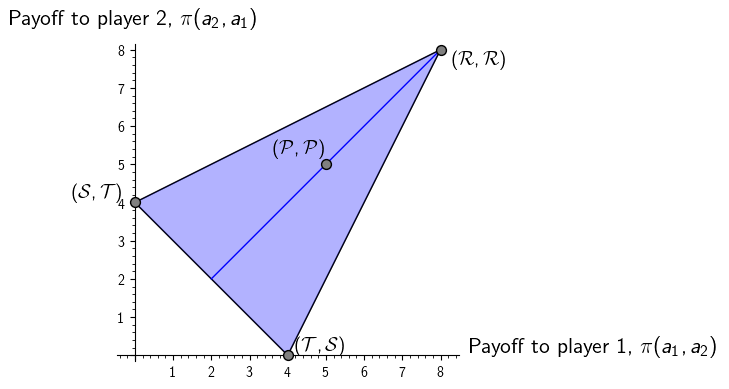

In [46]:
cR=8
cS=0
cT=4
cP=5

cvxHullPayCs = polygon2d([[cS,cT], [cR,cR], [cT,cS]], color='black', fill=False,axes_labels=["Payoff to player 1, $\\pi(a_1,a_2)$","Payoff to player 2, $\\pi(a_2,a_1)$"],frame=False, axes=True)
cvxHullPay = polygon2d([[cS,cT], [cR,cR], [cT,cS]], color="blue", alpha=0.3, edgecolor='black', fill=True,axes_labels=["Payoff to player 1, $\\pi(a_1,a_2)$","Payoff to player 2, $\\pi(a_2,a_1)$"],frame=False, axes=True)
tST = text("$(\\mathcal{S},\\mathcal{T})$", (cS-0.3,cT), vertical_alignment="bottom", horizontal_alignment="right",color='black',fontsize=14)
pST = point((cS,cT),color='gray',faceted='True',markeredgecolor='black',size=50,zorder=50)
tTS = text("$(\\mathcal{T},\\mathcal{S})$", (cT+0.2,cS), vertical_alignment="bottom", horizontal_alignment="left",color='black',fontsize=14)
pTS = point((cT,cS),color='gray',faceted='True',markeredgecolor='black',size=50,zorder=50)
tPP = text("$(\\mathcal{P},\\mathcal{P})$", (cP,cP+0.15), vertical_alignment="bottom", horizontal_alignment="right",color='black',fontsize=14)
pPP = point((cP,cP),color='gray',faceted='True',markeredgecolor='black',size=50,zorder=50)
tRR = text("$(\\mathcal{R},\\mathcal{R})$", (cR+0.3,cR), vertical_alignment="top", horizontal_alignment="left",color='black',fontsize=14)
pRR = point((cR,cR),color='gray',faceted='True',markeredgecolor='black',size=50,zorder=50)

paySelf = line([((cT+cS)/2,(cT+cS)/2), (cR,cR)],color='blue')
tPay = text("Possible payoffs in a monomorphic population of plastic types, $\pi(\\mathbf{z}_p,\\mathbf{z}_p)$", (cR+0.15,cR), vertical_alignment="bottom", horizontal_alignment="left",color='red',fontsize=14)


show(cvxHullPayCs+cvxHullPay+paySelf+tST+pST+tTS+pTS+tPP+pPP+tRR+pRR)

In [47]:
save(cvxHullPayCs+cvxHullPay+paySelf+tST+pST+tTS+pTS+tPP+pPP+tRR+pRR,"cvxPaySH.pdf")

/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


### Snowdrift game

<input>:18: DeprecationWarning: invalid escape sequence \p
<input>:18: DeprecationWarning: invalid escape sequence \p
<input>:18: DeprecationWarning: invalid escape sequence \p
<input>:18: DeprecationWarning: invalid escape sequence \p
<input>:18: DeprecationWarning: invalid escape sequence \p
<input>:18: DeprecationWarning: invalid escape sequence \p
<input>:18: DeprecationWarning: invalid escape sequence \p
<input>:18: DeprecationWarning: invalid escape sequence \p
<input>:18: DeprecationWarning: invalid escape sequence \p
<input>:18: DeprecationWarning: invalid escape sequence \p
<input>:18: DeprecationWarning: invalid escape sequence \p
<input>:18: DeprecationWarning: invalid escape sequence \p
<ipython-input-48-aa10bea4ad5f>:18: DeprecationWarning: invalid escape sequence \p
  tPay = text("Possible payoffs in a monomorphic population of plastic types, $\pi(\\mathbf{z}_p,\\mathbf{z}_p)$", (cR+RealNumber('0.15'),cR), vertical_alignment="bottom", horizontal_alignment="left",color='re

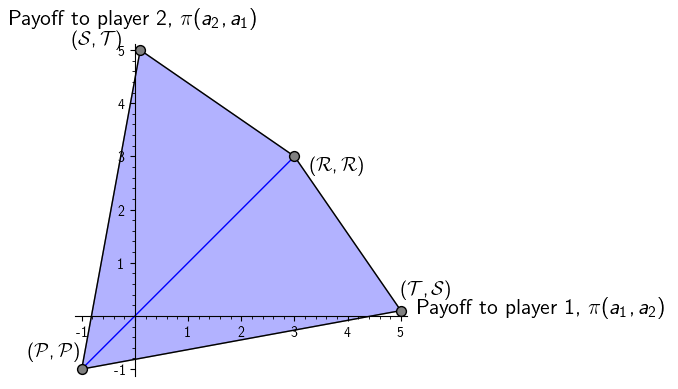

In [48]:
cR=3
cS=0.1
cT=5
cP=-1
cvxHullPay = polygon2d([[cP,cP], [cS,cT], [cR,cR], [cT,cS]], color="blue", alpha=0.3, edgecolor='black', fill=True,axes_labels=["Payoff to player 1, $\\pi(a_1,a_2)$","Payoff to player 2, $\\pi(a_2,a_1)$"],frame=False, axes=True)
cvxHullPayBd = polygon2d([[cP,cP], [cS,cT], [cR,cR], [cT,cS]], color='black', fill=False,axes_labels=["Payoff to player 1, $\\pi(a_1,a_2)$","Payoff to player 2, $\\pi(a_2,a_1)$"],frame=False, axes=True)

tST = text("$(\\mathcal{S},\\mathcal{T})$", (cS-0.3,cT), vertical_alignment="bottom", horizontal_alignment="right",color='black',fontsize=14)
pST = point((cS,cT),color='gray',faceted='True',markeredgecolor='black',size=50,zorder=50)
tTS = text("$(\\mathcal{T},\\mathcal{S})$", (cT,cS+0.2), vertical_alignment="bottom", horizontal_alignment="left",color='black',fontsize=14)
pTS = point((cT,cS),color='gray',faceted='True',markeredgecolor='black',size=50,zorder=50)
tPP = text("$(\\mathcal{P},\\mathcal{P})$", (cP,cP+0.15), vertical_alignment="bottom", horizontal_alignment="right",color='black',fontsize=14)
pPP = point((cP,cP),color='gray',faceted='True',markeredgecolor='black',size=50,zorder=50)
tRR = text("$(\\mathcal{R},\\mathcal{R})$", (cR+0.3,cR), vertical_alignment="top", horizontal_alignment="left",color='black',fontsize=14)
pRR = point((cR,cR),color='gray',faceted='True',markeredgecolor='black',size=50,zorder=50)

paySelf = line([(cP,cP), (cR,cR)],color='blue')
tPay = text("Possible payoffs in a monomorphic population of plastic types, $\pi(\\mathbf{z}_p,\\mathbf{z}_p)$", (cR+0.15,cR), vertical_alignment="bottom", horizontal_alignment="left",color='red',fontsize=14)


show(cvxHullPay+cvxHullPayBd+paySelf+tST+pST+tTS+pTS+tPP+pPP+tRR+pRR)

In [50]:
save(cvxHullPayBd+cvxHullPay+paySelf+tST+pST+tTS+pTS+tPP+pPP+tRR+pRR,"cvxPaySD.pdf")

/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


### Resource consumption game

<input>:19: DeprecationWarning: invalid escape sequence \p
<input>:19: DeprecationWarning: invalid escape sequence \p
<input>:19: DeprecationWarning: invalid escape sequence \p
<input>:19: DeprecationWarning: invalid escape sequence \p
<input>:19: DeprecationWarning: invalid escape sequence \p
<input>:19: DeprecationWarning: invalid escape sequence \p
<input>:19: DeprecationWarning: invalid escape sequence \p
<input>:19: DeprecationWarning: invalid escape sequence \p
<input>:19: DeprecationWarning: invalid escape sequence \p
<input>:19: DeprecationWarning: invalid escape sequence \p
<input>:19: DeprecationWarning: invalid escape sequence \p
<input>:19: DeprecationWarning: invalid escape sequence \p
<ipython-input-51-92e945cc8f80>:19: DeprecationWarning: invalid escape sequence \p
  tPay = text("Possible payoffs in a monomorphic population of plastic types, $\pi(\\mathbf{z}_p,\\mathbf{z}_p)$", (cR+RealNumber('0.15'),cR), vertical_alignment="bottom", horizontal_alignment="left",color='re

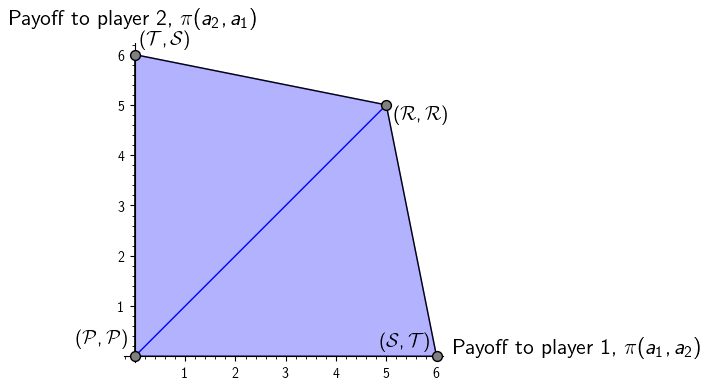

In [51]:
cR=5
cS=6
cT=0
cP=0

cvxHullPayBd = polygon2d([[cP,cP], [cS,cT], [cR,cR], [cT,cS]], color='black', fill=False,axes_labels=["Payoff to player 1, $\\pi(a_1,a_2)$","Payoff to player 2, $\\pi(a_2,a_1)$"],frame=False, axes=True)
cvxHullPay = polygon2d([[cP,cP], [cS,cT], [cR,cR], [cT,cS]], color="blue", alpha=0.3, edgecolor='black', fill=True,axes_labels=["Payoff to player 1, $\\pi(a_1,a_2)$","Payoff to player 2, $\\pi(a_2,a_1)$"],frame=False, axes=True)

tST = text("$(\\mathcal{S},\\mathcal{T})$", (cS-0.1,cT+0.1), vertical_alignment="bottom", horizontal_alignment="right",color='black',fontsize=14)
pST = point((cS,cT),color='gray',faceted='True',markeredgecolor='black',size=50,zorder=50)
tTS = text("$(\\mathcal{T},\\mathcal{S})$", (cT+0.1,cS+0.1), vertical_alignment="bottom", horizontal_alignment="left",color='black',fontsize=14)
pTS = point((cT,cS),color='gray',faceted='True',markeredgecolor='black',size=50,zorder=50)
tPP = text("$(\\mathcal{P},\\mathcal{P})$", (cP-0.1,cP+0.15), vertical_alignment="bottom", horizontal_alignment="right",color='black',fontsize=14)
pPP = point((cP,cP),color='gray',faceted='True',markeredgecolor='black',size=50,zorder=50)
tRR = text("$(\\mathcal{R},\\mathcal{R})$", (cR+0.15,cR), vertical_alignment="top", horizontal_alignment="left",color='black',fontsize=14)
pRR = point((cR,cR),color='gray',faceted='True',markeredgecolor='black',size=50,zorder=50)

paySelf = line([(cP,cP), (cR,cR)],color='blue')
tPay = text("Possible payoffs in a monomorphic population of plastic types, $\pi(\\mathbf{z}_p,\\mathbf{z}_p)$", (cR+0.15,cR), vertical_alignment="bottom", horizontal_alignment="left",color='red',fontsize=14)


show(cvxHullPayBd+cvxHullPay+paySelf+tST+pST+tTS+pTS+tPP+pPP+tRR+pRR)

In [52]:
save(cvxHullPayBd+cvxHullPay+paySelf+tST+pST+tTS+pTS+tPP+pPP+tRR+pRR,"cvxPayMG.pdf")

/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [70]:
import matplotlib.cm; matplotlib.cm.datad.keys()

[u'Spectral',
 u'summer',
 u'coolwarm',
 u'Wistia_r',
 u'pink_r',
 u'Set1',
 u'Set2',
 u'Set3',
 u'brg_r',
 u'Dark2',
 u'hot',
 u'PuOr_r',
 u'afmhot_r',
 u'terrain_r',
 u'PuBuGn_r',
 u'RdPu',
 u'gist_ncar_r',
 u'gist_yarg_r',
 u'Dark2_r',
 u'YlGnBu',
 u'RdYlBu',
 u'hot_r',
 u'gist_rainbow_r',
 u'gist_stern',
 u'gnuplot_r',
 u'cool_r',
 u'cool',
 u'gray',
 u'copper_r',
 u'Greens_r',
 u'GnBu',
 u'gist_ncar',
 u'spring_r',
 u'gist_rainbow',
 u'RdYlBu_r',
 u'gist_heat_r',
 u'Wistia',
 u'OrRd_r',
 u'CMRmap',
 u'bone',
 u'gist_stern_r',
 u'RdYlGn',
 u'Pastel2_r',
 u'spring',
 u'terrain',
 u'YlOrRd_r',
 u'Set2_r',
 u'winter_r',
 u'PuBu',
 u'RdGy_r',
 u'spectral',
 u'flag_r',
 u'jet_r',
 u'RdPu_r',
 u'Purples_r',
 u'gist_yarg',
 u'BuGn',
 u'Paired_r',
 u'hsv_r',
 u'bwr',
 u'cubehelix',
 u'YlOrRd',
 u'Greens',
 u'PRGn',
 u'gist_heat',
 u'spectral_r',
 u'Paired',
 u'hsv',
 u'Oranges_r',
 u'prism_r',
 u'Pastel2',
 u'Pastel1_r',
 u'Pastel1',
 u'gray_r',
 u'PuRd_r',
 u'Spectral_r',
 u'gnuplot2_r',
 u'BuPu',
 u'YlGnBu_r',
 u'copper',
 u'gist_earth_r',
 u'Set3_r',
 u'OrRd',
 u'PuBu_r',
 u'ocean_r',
 u'brg',
 u'gnuplot2',
 u'jet',
 u'bone_r',
 u'gist_earth',
 u'Oranges',
 u'RdYlGn_r',
 u'PiYG',
 u'CMRmap_r',
 u'YlGn',
 u'binary_r',
 u'gist_gray_r',
 u'Accent',
 u'BuPu_r',
 u'gist_gray',
 u'flag',
 u'seismic_r',
 u'RdBu_r',
 u'BrBG',
 u'Reds',
 u'BuGn_r',
 u'summer_r',
 u'GnBu_r',
 u'BrBG_r',
 u'Reds_r',
 u'RdGy',
 u'PuRd',
 u'Accent_r',
 u'Blues',
 u'Greys',
 u'autumn',
 u'cubehelix_r',
 u'nipy_spectral_r',
 u'PRGn_r',
 u'Greys_r',
 u'pink',
 u'binary',
 u'winter',
 u'gnuplot',
 u'RdBu',
 u'prism',
 u'YlOrBr',
 u'coolwarm_r',
 u'rainbow_r',
 u'rainbow',
 u'PiYG_r',
 u'YlGn_r',
 u'Blues_r',
 u'YlOrBr_r',
 u'seismic',
 u'Purples',
 u'bwr_r',
 u'autumn_r',
 u'ocean',
 u'Set1_r',
 u'PuOr',
 u'PuBuGn',
 u'nipy_spectral',
 u'afmhot']

In [ ]:
#plot_vector_field3d((x*cos(z),-y*cos(z),sin(z)), (x,0,pi), (y,0,pi), (z,0,pi),center_arrows=True)

## Global stability of plasticity in the Snowdrift game

In [43]:
z_p

z_p

In [44]:
solve_ineq([o_p(1,1,R,S,T,P) < o_p(z_c,1,R,S,T,P)-k, o_p(0,0,R,S,T,P) < o_p(z_d,0,R,S,T,P)-k, o_p(1,z_c,R,S,T,P) < o_p(z_p,z_p,R,S,T,P)-k, o_p(0,z_d,R,S,T,P) < o_p(z_p,z_p,R,S,T,P)-k],[z_c,z_d,z_p])

[[P*z_p^2 + R*z_p^2 - S*z_p^2 - T*z_p^2 + P*z_d - T*z_d - 2*P*z_p + S*z_p + T*z_p - k > 0,
  P*z_p^2 + R*z_p^2 - S*z_p^2 - T*z_p^2 - R*z_c + S*z_c - 2*P*z_p + S*z_p + T*z_p + P - S - k > 0,
  -P*z_d + S*z_d - k > 0,
  R*z_c - T*z_c - R + T - k > 0]]

In [ ]:
solve_ineq([o_p(1,1,R,S,T,P) < o_p(z_c,1,R,S,T,P)-k, o_p(0,0,R,S,T,P) < o_p(z_d,0,R,S,T,P)-k, o_p(1,z_c,R,S,T,P) < o_p(z_p,z_p,R,S,T,P)-k, o_p(0,z_d,R,S,T,P) < o_p(z_p,z_p,R,S,T,P)-k],[z_c,z_d,z_p])

/Users/slimane/anaconda/envs/sage/lib/python3.6/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


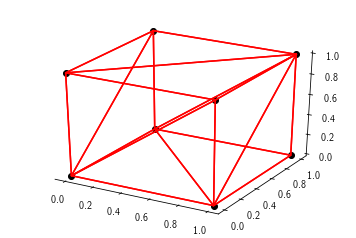

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import ConvexHull


# 8 points defining the cube corners
pts = np.array([[0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0],
                [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1], ])

hull = ConvexHull(pts)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Plot defining corner points
ax.plot(pts.T[0], pts.T[1], pts.T[2], "ko")

# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

# 12 = 2 * 6 faces are the simplices (2 simplices per square face)
for s in hull.simplices:
    s = np.append(s, s[0])  # Here we cycle back to the first coordinate
    ax.plot(pts[s, 0], pts[s, 1], pts[s, 2], "r-")

# Make axis label
#for i in ["x", "y", "z"]:
#    "[enter image description here]"[1]eval("ax.set_{:s}label('{:s}')".format(i, i))

plt.show()

## Rock-Paper-Scissors game

In this section we first define functions for plotting the 3-simplex given any $3\times 3$ payoff matrix. We then plot examples of the Rock-Paper-Scissors game to illustrate our results that plasticity can be globally stable in any zero-sum games without pure NE.

We shall also define functions for plotting the 4-simplex here, so that our Sagemath package for plotting evolutionary dynamics is complete.

In [81]:
def w3(x_1,x_2,y_1,y_2,payMtx):
    ePay = x_1*(y_1*payMtx[0][0] + y_2*payMtx[0][1] + (1-y_1-y_2)*payMtx[0][2]) + x_2*(y_1*payMtx[1][0] + y_2*payMtx[1][1] + (1-y_1-y_2)*payMtx[1][2]) + (1-x_1-x_2)*(y_1*payMtx[2][0] + y_2*payMtx[2][1] + (1-y_1-y_2)*payMtx[2][2])
    return ePay

In [82]:
pMrps = [[0,-2,1],[1,0,-2],[-2,1,0]]
w3(0,1,1,0,pMrps)

1

In [83]:
def repDyn3(x_1,x_2,payMtx):
    return [x_1*(w3(1,0,x_1,x_2,payMtx) - w3(x_1,x_2,x_1,x_2,payMtx)), x_2*(w3(0,1,x_1,x_2,payMtx) - w3(x_1,x_2,x_1,x_2,payMtx))];

In [84]:
repDyn3(0.1,0.2,pMrps)

[0.0530000000000000, -0.214000000000000]

In [85]:
pMrps = [[0,-1,1],[1,0,-1],[-1,1,0]]
pMrps[0][2]

1

In [144]:
#Function for generating a 3-strategy simplex with trajectories of the replicator dynamics given a payoff matrix payMtx
def numSdeSimplexGen3(x0,y0,payMtx,step,parr,Tmax,col,arrSize,arrWidth,zd):
    x,y=var('x,y');
    sol=desolve_odeint(repDyn3(x,y,payMtx),[x0,y0],srange(0,Tmax,step),[x,y]);
    solRev=desolve_odeint(-vector(repDyn3(x,y,payMtx)),[x0,y0],srange(0,Tmax,step),[x,y]);
    
    solX=[];
    solY=[];
    solXrev=[];
    solYrev=[];
    for i in sol:
        cPt = simToP(i[0],i[1]);
        solX += [N(cPt[0])];
        solY += [N(cPt[1])];
    for i in solRev:
        cPt = simToP(i[0],i[1]);
        solXrev += [N(cPt[0])];
        solYrev += [N(cPt[1])];

    psol=line(zip(solX,solY),color=col,xmin=0, xmax=1,ymin=0, ymax=1,aspect_ratio=1, axes=False,ticks=[[],[]],frame=False,zorder=zd);
    psolRev=line(zip(solXrev,solYrev),color=col,xmin=0, xmax=1,ymin=0, ymax=1,aspect_ratio=1, axes=False,ticks=[[],[]],frame=False,zorder=zd);

    dirs=arrow_dyn2(xStart=[solX[integer_floor(parr[0]*len(solX))],solY[integer_floor(parr[0]*len(solX))]], xEnd=[solX[integer_floor(parr[0]*len(solX))+1],solY[integer_floor(parr[0]*len(solX))+1]],arrow_width=arrWidth, arrow_size=arrSize,arrow_color=col,zOrder=zd);
    #dirs=arrow([solX[integer_floor(parr[0]*len(solX))],solY[integer_floor(parr[0]*len(solX))]],[solX[integer_floor(parr[0]*len(solX))+1],solY[integer_floor(parr[0]*len(solX))+1]],width=1, arrowsize=arrSize,color=col,zorder=zd);

    dirsRev=arrow_dyn2(xStart=[solXrev[integer_floor(parr[0]*len(solXrev))],solYrev[integer_floor(parr[0]*len(solXrev))]], xEnd=[solXrev[integer_floor(parr[0]*len(solXrev))+1],solYrev[integer_floor(parr[0]*len(solXrev))+1]],arrow_width=arrWidth, arrow_size=arrSize,arrow_color=col,zOrder=zd);
    
    

    for i in [1..(len(parr)-1)]:
        dirs = dirs+arrow_dyn2(xStart=[solX[integer_floor(parr[i]*len(solX))],solY[integer_floor(parr[i]*len(solX))]], xEnd=[solX[integer_floor(parr[i]*len(solX))+1],solY[integer_floor(parr[i]*len(solX))+1]],arrow_width=arrWidth, arrow_size=arrSize,arrow_color=col,zOrder=zd);
        dirsRev = dirs+arrow_dyn2([solXrev[integer_floor(parr[i]*len(solXrev))+1],solYrev[integer_floor(parr[i]*len(solXrev))+1]], [solXrev[integer_floor(parr[i]*len(solXrev))],solYrev[integer_floor(parr[i]*len(solXrev))]],arrow_width=arrWidth, arrow_size=arrSize,arrow_color=col,zOrder=zd);
    return(psol+psolRev+dirs)

In [87]:
#(R,S,T,P) = the payoffs of the 2-action pure-type game
#k = cost of plasticity
#(z_c,z_d,z_p) = probability that the plastic type cooperates against cooperators, defectors, and plastic types (resp.)
#colSnk = Color of sinks on the plot
#colSdl = Color of saddles
#colSce = Color of sources
#ptSize = size of the equilibria on the plot
#zd = layer of the plot (see Sagemath documentation for details)
def eqShowCompGen(payMtx,colSnk,colSdl,colSce,ptSize,zd):
    var('x,y');


    source = []; #list of sources (both eigenvalues are positive)
    sink = []; #list of sinks (both eigenvalues are negative)
    saddle = []; #list of saddles (one neg., one pos. eig.)
    undet = []; #list of equilibria with both 0 eigenvalues

    numEqs = [];
    numEig = [];


    #Compute equilibria of the replicator dynamics
    nuEqsRaw = solve([repDyn3(x,y,payMtx)[0]==0, repDyn3(x,y,payMtx)[1]==0,sum(repDyn3(x,y,payMtx))==0],x,y);
    
    #Check that all equilibria are within the simplex
    for i in range(len(nuEqsRaw)):
        if (0 <=  nuEqsRaw[i][0].rhs() <= 1 and 0 <=  nuEqsRaw[i][1].rhs() <= 1 and nuEqsRaw[i][0].rhs() + nuEqsRaw[i][1].rhs() <= 1):
            numEqs += [[nuEqsRaw[i][0].rhs(),nuEqsRaw[i][1].rhs()]];
    #Check that equilibria are real
    for i in range(len(numEqs)):
        if (imag_part(numEqs[i][0])!=0 or imag_part(numEqs[i][1])!=0):
            numEqs[i][0] = 99;#attributing unrealistic values in case there are complex eigenvalues, to draw attention
            numEqs[i][1] = 99;

    #Compute eigenvalues of Jacobian evaluated at each equilibrium
    for i in range(len(numEqs)):
            numEig += [jacobian(repDyn3(x,y,payMtx),(x,y))(x=numEqs[i][0],y=numEqs[i][1]).n().eigenvalues()]; #j3 is the name of the Jacobian matrix, defined above in the notebook

    #Classify equilibria into sinks, saddles, sources, degenerate
    for i in range(len(numEqs)):
        if (0<=numEqs[i][0]<=1 and 0<=numEqs[i][1]<=1):
                if (numEig[i][0]>0 and numEig[i][1]>0):
                    source += [simToP(numEqs[i][0],numEqs[i][1])];
                elif (numEig[i][0]>0 or numEig[i][1]>0):
                    saddle += [simToP(numEqs[i][0],numEqs[i][1])];
                elif (numEig[i][0]==0 or numEig[i][1]==0):
                    undet += [simToP(numEqs[i][0],numEqs[i][1])];
                else:
                    sink += [simToP(numEqs[i][0],numEqs[i][1])];

    #Plot equilibria
    pSink = point(sink,color=colSnk,faceted='True',markeredgecolor='black',size=ptSize,zorder=zd,axes=False,ticks=[[],[]],frame=False);
    pSource = point(source,color=colSce,faceted='True',markeredgecolor='black',size=ptSize,zorder=zd,axes=False,ticks=[[],[]],frame=False);
    pSaddle = point(saddle,color=colSdl,faceted='True',markeredgecolor='black',size=ptSize,zorder=zd,axes=False,ticks=[[],[]],frame=False);
    pUndet = point(undet,color='gray',faceted='True',markeredgecolor='black',size=ptSize,zorder=zd,axes=False,ticks=[[],[]],frame=False);

    return(pSink+pSource+pSaddle+pUndet)

In [88]:
payMtxS = [[0,6,-4],[-3,0,5],[-1,3,0]]
eqsStrange = solve([repDyn3(x,y,payMtxS)[0]==0, repDyn3(x,y,payMtxS)[1]==0,sum(repDyn3(x,y,payMtxS))==0],x,y);
eqsStrange

[[x == 0, y == 0], [x == (4/5), y == 0], [x == 0, y == (5/8)], [x == (1/3), y == (1/3)], [x == 1, y == 0], [x == 0, y == 1], [x == 2, y == -1]]

/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:37: UserWarning: Using generic algorithm for an inexact ring, which will probably give incorrect results due to numerical precision issues.


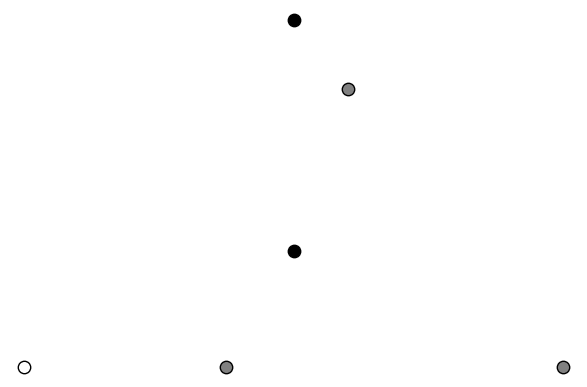

In [89]:
eqShowCompGen([[0,6,-4],[-3,0,5],[-1,3,0]],'black','gray','white',80,54)

/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:37: UserWarning: Using generic algorithm for an inexact ring, which will probably give incorrect results due to numerical precision issues.
/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


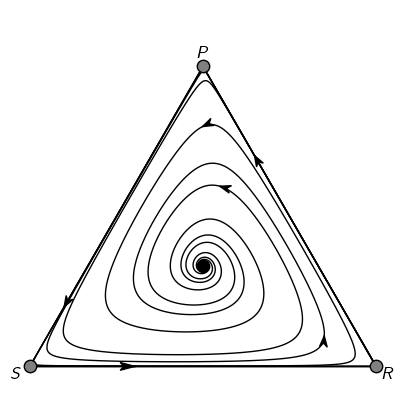

In [91]:
#Good Rock-Paper-Scissors game
arrowSize=1/1000.0;
arrowWidth=(1/8)*arrowSize
pMrps = [[0,-1,2],[2,0,-1],[-1,2,0]]

#x0,y0,payMtx,step,parr,Tmax,col,arrSize,arrWidth,zd

fSim=setSimplex("$R$","$P$","$S$",13,53);
eqsD=eqShowCompGen(pMrps,'black','gray','white',80,54)
traj1=numSdeSimplexGen3(0.7,0,pMrps,0.01,[0.0001],10,'black',arrowSize,arrowWidth,53);
traj4=numSdeSimplexGen3(0,0.7,pMrps,0.01,[0.0001],10,'black',arrowSize,arrowWidth,53);
traj5=numSdeSimplexGen3(0.2,0.8,pMrps,0.01,[0.0001],10,'black',arrowSize,arrowWidth,53);
traj8=numSdeSimplexGen3(0.8,0.1,pMrps,0.01,[0.000001],30,'black',arrowSize,arrowWidth,53);
traj9=numSdeSimplexGen3(0.1,0.1,pMrps,0.01,[0.000001],30,'black',arrowSize,arrowWidth,53);
traj10=numSdeSimplexGen3(0.6,0.15,pMrps,0.01,[0.000001],30,'black',arrowSize,arrowWidth,53);
#csp = contour_plot(speed(x,y,pMrps), (x,0,1), (y,0,sqrt(3/4)),cmap='RdYlBu_r',region=bdrys(0.01),contours=20,axes=False,frame=False,zorder=50);
hideOut1 = polygon2d([(0,sqrt(3/4)), simToP(0,1), simToP(1,0)], fill=True, thickness=1, color='white',axes=False,zorder=51);
hideOut2 = polygon2d([(1,sqrt(3/4)), simToP(0,0), simToP(1,0)], fill=True, thickness=1, color='white',axes=False,zorder=52);
#stbEqs = eqShow(pMrps,'black','gray','white',eqsc0d1p1,80,54);
show(fSim+traj1+traj4+traj5+traj8+traj9+traj10+hideOut1+hideOut2+eqsD)
#save(fSim+traj1+traj2+traj3+traj4+traj5+traj6+traj7+csp+hideOut1+hideOut2+stbEqs,"resPayDom.pdf")

In [101]:
save(fSim+traj1+traj4+traj5+traj8+traj9+traj10+hideOut1+hideOut2,"gRPS.pdf")

/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


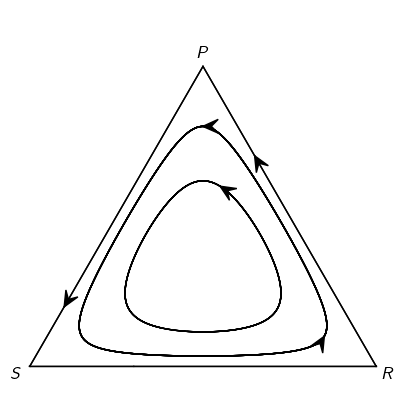

In [203]:
#Standard Rock-Paper-Scissors game
arrowSize=2/1000.0;
arrowWidth=(1/5)*arrowSize
pMrps = [[0,-1,1],[1,0,-1],[-1,1,0]]

fSim=setSimplex("$R$","$P$","$S$",13,53);
traj1=numSdeSimplexGen3(0.7,0,pMrps,0.01,[0.0001],30,'black',arrowSize,arrowWidth,53);
traj4=numSdeSimplexGen3(0,0.7,pMrps,0.01,[0.0001],30,'black',arrowSize,arrowWidth,53);
traj5=numSdeSimplexGen3(0.2,0.8,pMrps,0.01,[0.0001],30,'black',arrowSize,arrowWidth,53);
traj8=numSdeSimplexGen3(0.8,0.1,pMrps,0.01,[0.000001],30,'black',arrowSize,arrowWidth,53);
traj9=numSdeSimplexGen3(0.1,0.1,pMrps,0.01,[0.000001],30,'black',arrowSize,arrowWidth,53);
traj10=numSdeSimplexGen3(0.6,0.15,pMrps,0.01,[0.000001],30,'black',arrowSize,arrowWidth,53);
#csp = contour_plot(speed(x,y,pMrps), (x,0,1), (y,0,sqrt(3/4)),cmap='RdYlBu_r',region=bdrys(0.01),contours=20,axes=False,frame=False,zorder=50);
hideOut1 = polygon2d([(0,sqrt(3/4)), simToP(0,1), simToP(1,0)], fill=True, thickness=1, color='white',axes=False,zorder=51);
hideOut2 = polygon2d([(1,sqrt(3/4)), simToP(0,0), simToP(1,0)], fill=True, thickness=1, color='white',axes=False,zorder=52);
#stbEqs = eqShow(pMrps,'black','gray','white',eqsc0d1p1,80,54);
show(fSim+traj1+traj4+traj5+traj8+traj9+traj10+hideOut1+hideOut2)
#save(fSim+traj1+traj2+traj3+traj4+traj5+traj6+traj7+csp+hideOut1+hideOut2+stbEqs,"resPayDom.pdf")

/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


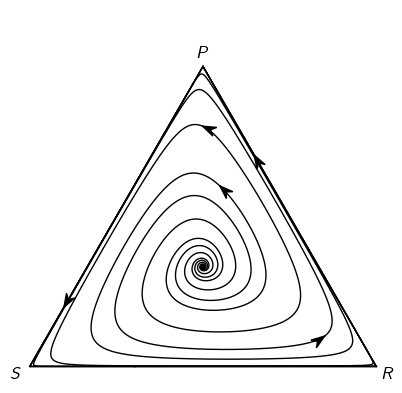

In [226]:
#Bad Rock-Paper-Scissors game
arrowSize=1.5/1000.0;
arrowWidth=(1/8)*arrowSize
pMrps = [[0,-2,1],[1,0,-2],[-2,1,0]]

fSim=setSimplex("$R$","$P$","$S$",13,53);
traj1=numSdeSimplexGen3(0.7,0,pMrps,0.01,[0.0001],10,'black',arrowSize,arrowWidth,53);
traj4=numSdeSimplexGen3(0,0.7,pMrps,0.01,[0.0001],10,'black',arrowSize,arrowWidth,53);
traj5=numSdeSimplexGen3(0.2,0.8,pMrps,0.01,[0.0001],10,'black',arrowSize,arrowWidth,53);
traj8=numSdeSimplexGen3(0.8,0.1,pMrps,0.01,[0.000001],30,'black',arrowSize,arrowWidth,53);
traj9=numSdeSimplexGen3(0.1,0.1,pMrps,0.01,[0.000001],30,'black',arrowSize,arrowWidth,53);
traj10=numSdeSimplexGen3(0.6,0.15,pMrps,0.01,[0.000001],30,'black',arrowSize,arrowWidth,53);
#csp = contour_plot(speed(x,y,pMrps), (x,0,1), (y,0,sqrt(3/4)),cmap='RdYlBu_r',region=bdrys(0.01),contours=20,axes=False,frame=False,zorder=50);
hideOut1 = polygon2d([(0,sqrt(3/4)), simToP(0,1), simToP(1,0)], fill=True, thickness=1, color='white',axes=False,zorder=51);
hideOut2 = polygon2d([(1,sqrt(3/4)), simToP(0,0), simToP(1,0)], fill=True, thickness=1, color='white',axes=False,zorder=52);
#stbEqs = eqShow(pMrps,'black','gray','white',eqsc0d1p1,80,54);
show(fSim+traj1+traj4+traj5+traj8+traj9+traj10+hideOut1+hideOut2)
#save(fSim+traj1+traj2+traj3+traj4+traj5+traj6+traj7+csp+hideOut1+hideOut2+stbEqs,"resPayDom.pdf")

/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


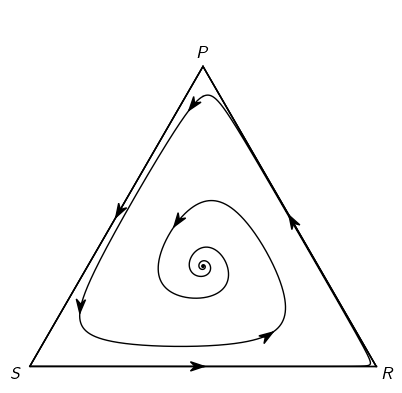

In [160]:
#Good Rock-Paper-Scissors game
arrowSize=1/25.0;
arrowWidth=(1/3)*arrowSize
pMrps = [[0,-1,2],[2,0,-1],[-1,2,0]]

fSim=setSimplex("$R$","$P$","$S$",13,53);
traj1=numSdeSimplexGen3(0.9,0.05,pMrps,0.01,[0.01,0.06,0.12,0.2],50,'black',arrowSize,arrowWidth,53);
traj2=numSdeSimplexGen3(0.5,0,pMrps,0.01,[0.0001],10,'black',arrowSize,arrowWidth,53);
traj3=numSdeSimplexGen3(0,0.5,pMrps,0.01,[0.0001],10,'black',arrowSize,arrowWidth,53);
traj4=numSdeSimplexGen3(0.5,0.5,pMrps,0.01,[0.0001],10,'black',arrowSize,arrowWidth,53);
#csp = contour_plot(speed(x,y,pMrps), (x,0,1), (y,0,sqrt(3/4)),cmap='RdYlBu_r',region=bdrys(0.01),contours=20,axes=False,frame=False,zorder=50);
hideOut1 = polygon2d([(0,sqrt(3/4)), simToP(0,1), simToP(1,0)], fill=True, thickness=1, color='white',axes=False,zorder=51);
hideOut2 = polygon2d([(1,sqrt(3/4)), simToP(0,0), simToP(1,0)], fill=True, thickness=1, color='white',axes=False,zorder=52);
#stbEqs = eqShow(pMrps,'black','gray','white',eqsc0d1p1,80,54);
show(fSim+traj1+traj2+traj3+traj4+hideOut1+hideOut2)
#save(fSim+traj1+traj2+traj3+traj4+traj5+traj6+traj7+csp+hideOut1+hideOut2+stbEqs,"resPayDom.pdf")

In [161]:
save(fSim+traj1+traj2+traj3+traj4+hideOut1+hideOut2,'gRPS2.pdf')

/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


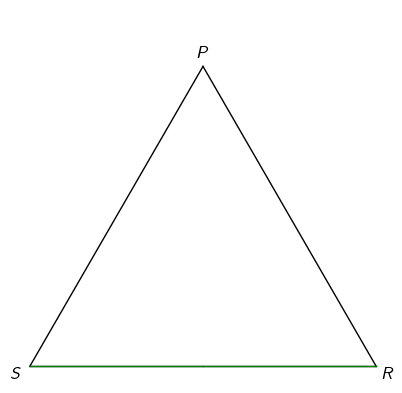

In [223]:
arrowSize=1.2/1000.0;
arrowWidth=(1/5)*arrowSize
pMrps = [[0,-1,2],[2,0,-1],[-1,2,0]]

fSim=setSimplex("$R$","$P$","$S$",13,53);

traj3=numSdeSimplexGen3(0,0.5,pMrps,0.01,[0.5],10,'green',arrowSize,arrowWidth,53);

show(fSim+traj3)

In [57]:
save(fSim+traj1+traj2+traj3+traj4+hideOut1+hideOut2,"gRPS.pdf")

/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:37: UserWarning: Using generic algorithm for an inexact ring, which will probably give incorrect results due to numerical precision issues.
/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


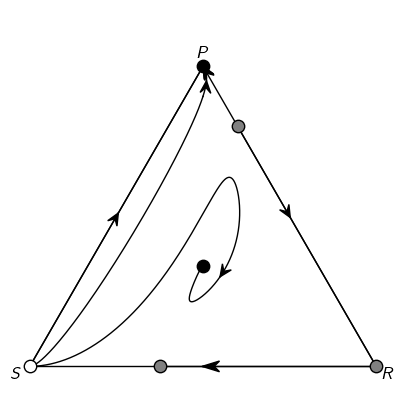

In [120]:
#Strange example from Fig. 6.12 in Bomze (1983, p. 207)
arrowSize=1.2/1000.0;
arrowWidth=(1/5)*arrowSize
pMrps = [[0,6,-4],[-3,0,5],[-1,3,0]]


fSim=setSimplex("$R$","$P$","$S$",13,53);
traj1=numSdeSimplexGen3(0.9,0.05,pMrps,0.01,[0.01,0.06,0.12,0.2],50,'black',arrowSize,arrowWidth,53);
traj2=numSdeSimplexGen3(0.5,0,pMrps,0.01,[0.0001],10,'black',arrowSize,arrowWidth,53);
traj3=numSdeSimplexGen3(0,0.5,pMrps,0.01,[0.0001],10,'black',arrowSize,arrowWidth,53);
traj4=numSdeSimplexGen3(0.5,0.5,pMrps,0.01,[0.0001],10,'black',arrowSize,arrowWidth,53);
traj5=numSdeSimplexGen3(0.3,0.3,pMrps,0.01,[0.0001],10,'black',arrowSize,arrowWidth,53);
#csp = contour_plot(speed(x,y,pMrps), (x,0,1), (y,0,sqrt(3/4)),cmap='RdYlBu_r',region=bdrys(0.01),contours=20,axes=False,frame=False,zorder=50);
hideOut1 = polygon2d([(0,sqrt(3/4)), simToP(0,1), simToP(1,0)], fill=True, thickness=1, color='white',axes=False,zorder=51);
hideOut2 = polygon2d([(1,sqrt(3/4)), simToP(0,0), simToP(1,0)], fill=True, thickness=1, color='white',axes=False,zorder=52);
stbEqs = eqShowCompGen(pMrps,'black','gray','white',80,54);
show(fSim+stbEqs+traj1+traj2+traj3+traj4+traj5+hideOut1+hideOut2)
#save(fSim+traj1+traj2+traj3+traj4+traj5+traj6+traj7+csp+hideOut1+hideOut2+stbEqs,"resPayDom.pdf")

In [121]:
save(fSim+stbEqs+traj1+traj2+traj3+traj4+traj5+hideOut1+hideOut2,"resArrTest.pdf")

In [52]:
y = var('y')
plot3d(w3(x,y,x,y,pMrps),(0,1),(0,1))

NameError: name 'w3' is not defined

In [52]:
err = 0
pMrps2 = [[0+err,-1+err,1+err],[1+err,0+err,-1+err],[-1+err,1+err,0+err]]
w3(1/3,1/3,1/3,1/3,pMrps2)

0

In [53]:
w3(1,0,1,0,pMrps2)

0

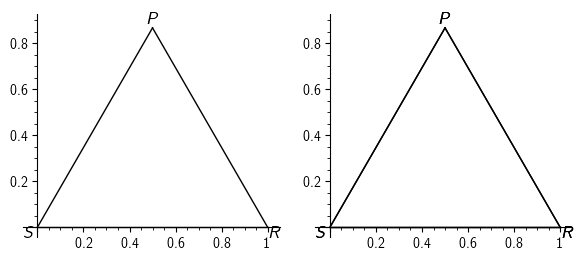

In [50]:
graphics_array([setSimplex("$R$","$P$","$S$",13,53),setSimplex("$R$","$P$","$S$",13,53)])

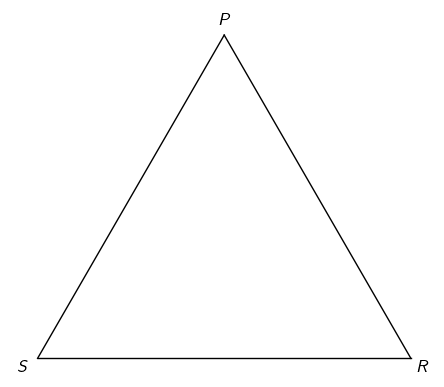

In [74]:
setSimplex("$R$","$P$","$S$",13,53)

In [77]:
graphics_array?

In [56]:
sorted(colors)

['aliceblue',
 'antiquewhite',
 'aqua',
 'aquamarine',
 'automatic',
 'azure',
 'beige',
 'bisque',
 'black',
 'blanchedalmond',
 'blue',
 'blueviolet',
 'brown',
 'burlywood',
 'cadetblue',
 'chartreuse',
 'chocolate',
 'coral',
 'cornflowerblue',
 'cornsilk',
 'crimson',
 'cyan',
 'darkblue',
 'darkcyan',
 'darkgoldenrod',
 'darkgray',
 'darkgreen',
 'darkgrey',
 'darkkhaki',
 'darkmagenta',
 'darkolivegreen',
 'darkorange',
 'darkorchid',
 'darkred',
 'darksalmon',
 'darkseagreen',
 'darkslateblue',
 'darkslategray',
 'darkslategrey',
 'darkturquoise',
 'darkviolet',
 'deeppink',
 'deepskyblue',
 'dimgray',
 'dimgrey',
 'dodgerblue',
 'firebrick',
 'floralwhite',
 'forestgreen',
 'fuchsia',
 'gainsboro',
 'ghostwhite',
 'gold',
 'goldenrod',
 'gray',
 'green',
 'greenyellow',
 'grey',
 'honeydew',
 'hotpink',
 'indianred',
 'indigo',
 'ivory',
 'khaki',
 'lavender',
 'lavenderblush',
 'lawngreen',
 'lemonchiffon',
 'lightblue',
 'lightcoral',
 'lightcyan',
 'lightgoldenrodyellow',
 'lightgray',
 'lightgreen',
 'lightgrey',
 'lightpink',
 'lightsalmon',
 'lightseagreen',
 'lightskyblue',
 'lightslategray',
 'lightslategrey',
 'lightsteelblue',
 'lightyellow',
 'lime',
 'limegreen',
 'linen',
 'magenta',
 'maroon',
 'mediumaquamarine',
 'mediumblue',
 'mediumorchid',
 'mediumpurple',
 'mediumseagreen',
 'mediumslateblue',
 'mediumspringgreen',
 'mediumturquoise',
 'mediumvioletred',
 'midnightblue',
 'mintcream',
 'mistyrose',
 'moccasin',
 'navajowhite',
 'navy',
 'oldlace',
 'olive',
 'olivedrab',
 'orange',
 'orangered',
 'orchid',
 'palegoldenrod',
 'palegreen',
 'paleturquoise',
 'palevioletred',
 'papayawhip',
 'peachpuff',
 'peru',
 'pink',
 'plum',
 'powderblue',
 'purple',
 'red',
 'rosybrown',
 'royalblue',
 'saddlebrown',
 'salmon',
 'sandybrown',
 'seagreen',
 'seashell',
 'sienna',
 'silver',
 'skyblue',
 'slateblue',
 'slategray',
 'slategrey',
 'snow',
 'springgreen',
 'steelblue',
 'tan',
 'teal',
 'thistle',
 'tomato',
 'turquoise',
 'violet',
 'wheat',
 'white',
 'whitesmoke',
 'yellow',
 'yellowgreen']

## The 12 families of $2\times 2$ games

In this section we determine invasion and stability of plasticity in the 12 possible families of $2\times 2$ games.

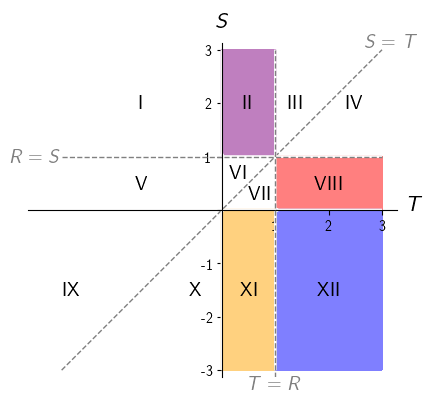

In [100]:
cR=1
cP=0

#Lines separating payoffs
SeqT = plot(x,x,-3,3,xmin=-3,xmax=3,ymin=-3,ymax=3,axes_labels=["$T$","$S$"], color='gray',linestyle="--",ticks=[[1,2,3],[-3,-2,-1,0,1,2,3]],zorder=1);
#avgFit = plot(x*w_c(x,1-x,cR,cS,cT,cP,zC,zD,zP) + (1-x)*w_d(x,1-x,cR,cS,cT,cP,zC,zD,zP),x,0,1,xmin=-3,xmax=3,ymin=-3,ymax=3,axes_labels=["$T$","$S$"], color='black', legend_label='$\\bar{\\pi}_{-p}(x)$');
TeqR = line([(cR,-3.4), (cR,3)],color='gray',linestyle="--",zorder=10)
SeqR = line([(-3,cR), (3,cR)],color='gray',linestyle="--")

#Game regions
MGs = region_plot([cP<T,T<cR,S>cR], (T,-3,3), (S,-3,3), incol='purple', bordercol='white',alpha=0.5);
SD = region_plot([cR<T,S<cR,S>cP], (T,-3,3), (S,-3,3), incol='red', bordercol='white',alpha=0.5);
SH = region_plot([cP<T,T<cR,S<cP], (T,-3,3), (S,-3,3), incol='orange', bordercol='white',alpha=0.5,zorder=3);
PD = region_plot([cR<T,S<cP], (T,-3,3), (S,-3,3), incol='blue', bordercol='white',alpha=0.5,zorder=3);
#SH = polygon2d([[0,-3], [1,-3], [1,0], [0,0]], color="orange", alpha=0.3, edgecolor='orange', fill=True,axes_labels=["Payoff to player 1, $\\pi(a_1,a_2)$","Payoff to player 2, $\\pi(a_2,a_1)$"],frame=False, axes=True)

#Text Labels
MGstxt = text("II", (0.5,2), vertical_alignment="center", horizontal_alignment="center",color='black',fontsize=14)
SDtxt = text("VIII", (2,0.5), vertical_alignment="center", horizontal_alignment="center",color='black',fontsize=14)
SHtxt = text("XI", (0.5,-1.5), vertical_alignment="center", horizontal_alignment="center",color='black',fontsize=14)
PDtxt = text("XII", (2,-1.5), vertical_alignment="center", horizontal_alignment="center",color='black',fontsize=14)
R1 = text("$R=1$", (-1.8,2.8), vertical_alignment="center", horizontal_alignment="center",color='gray',fontsize=14)
P0 = text("$P=0$", (-1.8,2.3), vertical_alignment="center", horizontal_alignment="center",color='gray',fontsize=14)
SeqTtxt = text("$S=T$", (3.15,3.15), vertical_alignment="center", horizontal_alignment="center",color='gray',fontsize=14)
SeqRtxt = text("$R=S$", (-3.5,1), vertical_alignment="center", horizontal_alignment="center",color='gray',fontsize=14)
TeqRtxt = text("$T=R$", (1,-3.25), vertical_alignment="center", horizontal_alignment="center",color='gray',fontsize=14)

#The twelve families text labels
fI = text("I", (-1.5,2), vertical_alignment="center", horizontal_alignment="center",color='black',fontsize=14)
fIII = text("III", (1.4,2), vertical_alignment="center", horizontal_alignment="center",color='black',fontsize=14)
fIV = text("IV", (2.5,2), vertical_alignment="center", horizontal_alignment="center",color='black',fontsize=14)
fV = text("V", (-1.5,0.5), vertical_alignment="center", horizontal_alignment="center",color='black',fontsize=14)
fVI = text("VI", (0.3,0.7), vertical_alignment="center", horizontal_alignment="center",color='black',fontsize=14)
fVII = text("VII", (0.7,0.3), vertical_alignment="center", horizontal_alignment="center",color='black',fontsize=14)
fIX = text("IX", (-2.8,-1.5), vertical_alignment="center", horizontal_alignment="center",color='black',fontsize=14)
fX = text("X", (-0.5,-1.5), vertical_alignment="center", horizontal_alignment="center",color='black',fontsize=14)



show(SeqT+TeqR+SeqR+MGs+SD+SH+PD+MGstxt+SDtxt+SHtxt+PDtxt+SeqTtxt+SeqRtxt+TeqRtxt+fI+fIII+fIV+fV+fVI+fVII+fIX+fX)


In [101]:
save(SeqT+TeqR+SeqR+MGs+SD+SH+PD+MGstxt+SDtxt+SHtxt+PDtxt+SeqTtxt+SeqRtxt+TeqRtxt+fI+fIII+fIV+fV+fVI+fVII+fIX+fX,"gameRegions.pdf")

## New arrow style

See my handwritten notes for a definition of the variables.

In [33]:
var('x_B,x_C,y_B,y_C,x_F,y_F,x_A,y_A,s,a,c,r,i_m,i_p')
#solve_ineq([(y_A-y_B)/(x_A-x_B)==s,x_A-x_B==1],y_B)

#i_m = -s*x_A+y_A

solF = solve([(y_A-y_F)/(x_A-x_F)==s,(y_A-y_F)^2+(x_A-x_F)^2==a^2],x_F,y_F)
solF

#i_p = (1/s)*x_F+y_F

[[x_F == ((s^2 + 1)*x_A - sqrt(s^2 + 1)*a)/(s^2 + 1), y_F == -(sqrt(s^2 + 1)*a*s - (s^2 + 1)*y_A)/(s^2 + 1)], [x_F == ((s^2 + 1)*x_A + sqrt(s^2 + 1)*a)/(s^2 + 1), y_F == (sqrt(s^2 + 1)*a*s + (s^2 + 1)*y_A)/(s^2 + 1)]]

In [34]:
solB = solve([(y_F-y_B)/(x_F-x_B)==s,(y_B-y_F)^2+(x_B-x_F)^2==c^2],x_B,y_B)
solB

[[x_B == ((s^2 + 1)*x_F - sqrt(s^2 + 1)*c)/(s^2 + 1), y_B == -(sqrt(s^2 + 1)*c*s - (s^2 + 1)*y_F)/(s^2 + 1)], [x_B == ((s^2 + 1)*x_F + sqrt(s^2 + 1)*c)/(s^2 + 1), y_B == (sqrt(s^2 + 1)*c*s + (s^2 + 1)*y_F)/(s^2 + 1)]]

In [35]:
solC = solve([y_C==(-1/s)*x_C+i_p,(y_C-y_F)^2+(x_C-x_F)^2==c^2],x_C,y_C)
solC

[[x_C == (s^2*x_F + i_p*s - s*y_F - sqrt(-s^2*y_F^2 + (c^2 - i_p^2)*s^2 + 2*i_p*s*x_F + c^2 - x_F^2 + 2*(i_p*s^2 - s*x_F)*y_F)*s)/(s^2 + 1), y_C == (i_p*s^2 - s*x_F + y_F + sqrt(-s^2*y_F^2 + (c^2 - i_p^2)*s^2 + 2*i_p*s*x_F + c^2 - x_F^2 + 2*(i_p*s^2 - s*x_F)*y_F))/(s^2 + 1)], [x_C == (s^2*x_F + i_p*s - s*y_F + sqrt(-s^2*y_F^2 + (c^2 - i_p^2)*s^2 + 2*i_p*s*x_F + c^2 - x_F^2 + 2*(i_p*s^2 - s*x_F)*y_F)*s)/(s^2 + 1), y_C == (i_p*s^2 - s*x_F + y_F - sqrt(-s^2*y_F^2 + (c^2 - i_p^2)*s^2 + 2*i_p*s*x_F + c^2 - x_F^2 + 2*(i_p*s^2 - s*x_F)*y_F))/(s^2 + 1)]]

In [36]:
def arrow_dyn2(xStart,xEnd,arrow_size,arrow_width,arrow_color,zOrder):
    
    cf=arrow_width
    af=arrow_size
    xA=n(xEnd)
    x0=n(xStart)
    
    xB=[0,0]
    xC=[0,0]
    xD=[0,0]
    xF=[0,0]
    
    sf=(xA[1]-x0[1])/(xA[0]-x0[0])
    
    
    if(x0[0]==xA[0]):
        xB[0]=xA[0]
        xF[0]=xA[0]
        if(x0[1]>=xA[1]):
            xF[1]=af+xA[1]
            xB[1]=-cf+xF[1]
        
        else:
            xF[1]=-af+xA[1]
            xB[1]=cf+xF[1]
        xC = [xF[0]-cf,xF[1]]
        xD = [xF[0]+cf,xF[1]]
    
    elif(x0[1]==xA[1]):
        xF[1]=xA[1]
        xB[1]=xA[1]
        if(x0[0]>=xA[0]):
            xF[0]=af+xA[0]
            xB[0]=-cf+xF[0]
        
        else:
            xF[0]=-af+xA[0]
            xB[0]=cf+xF[0]
        xC = [xF[0],xF[1]-cf]
        xD = [xF[0],xF[1]+cf]
    
    elif(xA[0]>x0[0]):
        xF = [solF[0][0].subs(x_A=xA[0],y_A=xA[1],s=sf,a=af).rhs().n(),solF[0][1].subs(x_A=xA[0],y_A=xA[1],s=sf,a=af).rhs().n()]
        xB = [solB[1][0].rhs().subs(x_F=xF[0],y_F=xF[1],s=sf,c=cf).n(),solB[1][1].rhs().subs(x_F=xF[0],y_F=xF[1],s=sf,c=cf).n()]
        xC = [solC[0][0].subs(x_F=xF[0],y_F=xF[1],i_p=(1/sf)*xF[0]+xF[1],s=sf,c=cf).rhs().n(),solC[0][1].subs(x_F=xF[0],y_F=xF[1],i_p=(1/sf)*xF[0]+xF[1],s=sf,c=cf).rhs().n()]
        xD = [solC[1][0].subs(x_F=xF[0],y_F=xF[1],i_p=(1/sf)*xF[0]+xF[1],s=sf,c=cf).rhs().n(),solC[1][1].subs(x_F=xF[0],y_F=xF[1],i_p=(1/sf)*xF[0]+xF[1],s=sf,c=cf).rhs().n()]
    
    elif(xA[0]<x0[0]):
        xF = [solF[1][0].subs(x_A=xA[0],y_A=xA[1],s=sf,a=af).rhs().n(),solF[1][1].subs(x_A=xA[0],y_A=xA[1],s=sf,a=af).rhs().n()]
        xB = [solB[0][0].rhs().subs(x_F=xF[0],y_F=xF[1],s=sf,c=cf).n(),solB[0][1].rhs().subs(x_F=xF[0],y_F=xF[1],s=sf,c=cf).n()]
        xC = [solC[0][0].subs(x_F=xF[0],y_F=xF[1],i_p=(1/sf)*xF[0]+xF[1],s=sf,c=cf).rhs().n(),solC[0][1].subs(x_F=xF[0],y_F=xF[1],i_p=(1/sf)*xF[0]+xF[1],s=sf,c=cf).rhs().n()]
        xD = [solC[1][0].subs(x_F=xF[0],y_F=xF[1],i_p=(1/sf)*xF[0]+xF[1],s=sf,c=cf).rhs().n(),solC[1][1].subs(x_F=xF[0],y_F=xF[1],i_p=(1/sf)*xF[0]+xF[1],s=sf,c=cf).rhs().n()]
        
    
    arrLine = line([x0,xA], color=arrow_color,zorder=zOrder,axes=False,frame=False)
    arrHead = polygon2d([xA, xC, xB, xD], edgecolor=arrow_color, fill=True, color=arrow_color, zorder=zOrder,axes=False,frame=False)
    
    return arrLine+arrHead

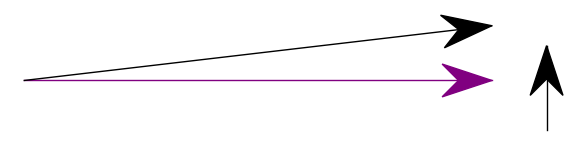

In [37]:
At = [5.4,3]
Ot = [-4,3]

At2 = [5.4,4.1]
Ot2 = [-4,3]

At3 = [6.5,3.7]
Ot3 = [6.5,2]


res1 = arrow_dyn2(Ot,At,1,0.33,'purple',zOrder=3)
res2 = arrow_dyn2(Ot2,At2,1,0.33,'black',zOrder=3)
res3 = arrow_dyn2(Ot3,At3,1,0.33,'black',zOrder=3)

show(res1+res2+res3)

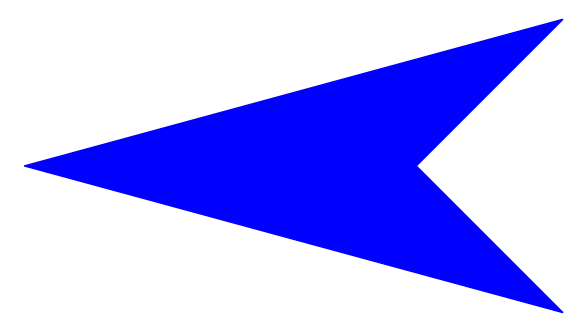

In [281]:
arrTest = polygon2d([At, res1[2], res1[1], res1[3]], edgecolor='blue', fill=True, color='blue', zorder=3,axes=False,frame=False)
show(arrTest)

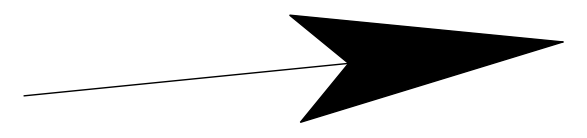

In [73]:
At = [5,3.1]
Ot = [4,3]
res1 = arrow_dyn2(Ot,At,0.5,0.1,'black',zOrder=3)
res1

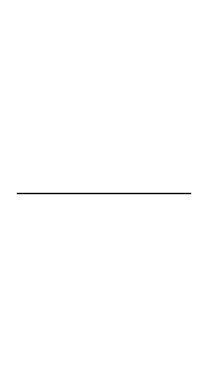

In [256]:
show(res1)

/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


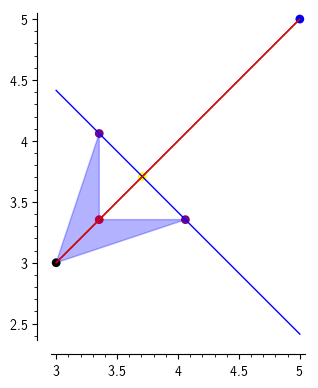

In [150]:
ptsA = point([At],size=40,color="black")
pts0 = point([Ot],size=40,color="blue")
ptsB = point([res1[0]],size=40,color="red")
ptsF = point([res1[1]],size=40,color="yellow")

i_mv = -(At[1]-Ot[1])/(At[0]-Ot[0])*At[0]+At[1]
i_pv = 1/((At[1]-Ot[1])/(At[0]-Ot[0]))*res1[1][0]+res1[1][1]

ptsC = point([res1[2]],size=40,color="purple")
ptsD = point([res1[3]],size=40,color="purple")

lneT = line([Ot,At], color="black")
orthLneT = plot(-1/((At[1]-Ot[1])/(At[0]-Ot[0]))*x+i_pv,x,3,5)
lneS = plot((At[1]-Ot[1])/(At[0]-Ot[0])*x+i_mv,x,3,5,color="red",aspect_ratio=1)

arrowN=polygon2d([At, res1[2], res1[0], res1[3]], edgecolor='blue', fill=True,color="blue", alpha=0.3)

show(lneT+ptsA+pts0+ptsB+ptsF+ptsC+ptsD+orthLneT+lneS+arrowN)

/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


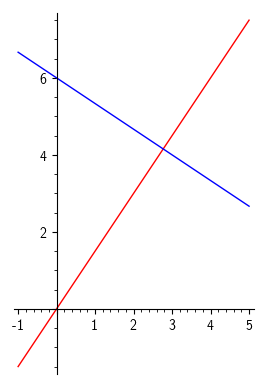

In [101]:
sv=1.5

orthLneT = plot(-(1/sv)*x+6,x,-1,5)
lneS = plot(sv*x,x,-1,5,color="red",aspect_ratio=1)

show(lneS+orthLneT)

/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


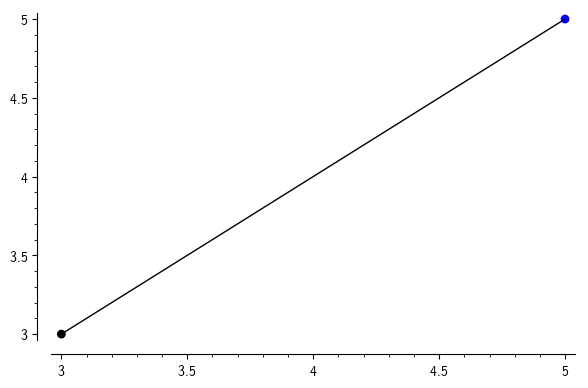

In [54]:
ptsA = point([At],size=40,color="black")
pts0 = point([Ot],size=40,color="blue")

lneT = line([Ot,At], color="black")

sv=

plot

show(lneT+ptsA+pts0)

## Evolution of $\mathbf{z}$ under error-prone plasticity

We now assume that plastic types can make detection errors.

Given the strategy $\mathbf{z}$ of the plastic type, the *effective response*, $\mathbf{q}_i$, of the plastic type to pure type $i\neq p$ is now defined as
$$ \mathbf{q}_i = (1-\varepsilon) \mathbf{z}_i + \frac{\varepsilon}{n+1} \sum_{j\in A\cup\{p\}}\mathbf{z}_j $$
We define a different error probability, $\varepsilon_p$ when encountering other plastic types, such that the effective response, $\mathbf{q}_p$, against a plastic type is
$$ \mathbf{q}_p = (1-\varepsilon_p) \mathbf{z}_p + \frac{\varepsilon_p}{n+1} \sum_{j\in A\cup\{p\}}\mathbf{z}_j $$

To do:

- Wrap the simulation code in a general function in order to avoid copying/pasting big chunks of code.
- Write code to allow plotting of evolutionary trajectories in the simplex. This will make a nice visual illustration of how analytical and simulation results compare to one another.
- Do a minimal set of numerical experiments, report about them in the paper, and re-send the paper!

### Code for agent-based simulations

In [39]:
pay(z_1,z_2,R,S,T,P) = z_1*z_2*R + z_1*(1-z_2)*S + (1-z_1)*z_2*T + (1-z_1)*(1-z_2)*P
pay

(z_1, z_2, R, S, T, P) |--> P*(z_1 - 1)*(z_2 - 1) - S*z_1*(z_2 - 1) - T*(z_1 - 1)*z_2 + R*z_1*z_2

In [40]:
pay(0,1)

T

In [41]:
#"Effective" strategy of the plastic type given epsilons and z
def effPlastic(epsilon,epsilon_p,z_c,z_d,z_p):
    q_c = (1-epsilon)*z_c + epsilon*(z_c+z_d+z_p)/3;
    q_d = (1-epsilon)*z_d + epsilon*(z_c+z_d+z_p)/3;
    q_p = (1-epsilon_p)*z_p + epsilon_p*(z_c+z_d+z_p)/3;
    
    return [q_c,q_d,q_p]

In [46]:
effPlastic(0,0,0.3,1,1)

[0.300000000000000, 1.00000000000000, 1.00000000000000]

In [47]:
cR=3
cS=1
cT=5
cP=2
intNE.subs(R=cR,S=cS,T=cT,P=cP)

-1

In [50]:
def mutatePhenotype(origin,destination,phenoOrigin,deviation,traitsMut,initPlastic):
    
    import copy

    xO = origin #mutates from type xO
    xD = destination #mutates to type xD
    pO = phenoOrigin #phenotype of original phenotype pO
    pD = [xD,-99] #mutated phenotype pD
    delta_p = deviation #deviation applied to a continuous trait 
    dirMuts = [-1,0,1] #vector of possible directions for a mutation to a continuous trait
    rDirMut = -99 #realized direction of mutation

    
    if(xO==0 and xD==0): #pure-to-pure mutation
        pD[1] = 1-pO
    
    elif(xO==0 and xD==1): #pure-to-plastic mutation
        pD[1] = [1-delta_p,1-delta_p,-99,-99,-99]
        
        if(initPlastic):
            pD[1] = copy.deepcopy(initPlastic)
        else:    
            distZ = RealDistribution('uniform', [0,1])
            pD[1][2] = distZ.get_random_element()
            pD[1][3] = distZ.get_random_element()
            pD[1][4] = distZ.get_random_element()
        
    elif(xO==1 and xD==0): #plastic-to-pure mutation
        
        distCD = GeneralDiscreteDistribution([1,1]) #if a plastic type mutates back to being pure, it becomes a C or D with prob. 1/2 resp.
        pD[1] = distCD.get_random_element()
    
    elif(xO==1 and xD==1): #plastic-to-plastic mutation
        pD[1] = pO #initialize mutant phenotype
        
        distDir = GeneralDiscreteDistribution([1,1,1]) #Distribution of mutational direction ([-1,0,1])
        for i in range(5):
            if(i in traitsMut):
                rDirMut = distDir.get_random_element()
                pD[1][i] = pD[1][i] + dirMuts[rDirMut]*delta_p
                if(pD[1][i]>1):
                    pD[1][i]=1
                elif(pD[1][i]<0):
                    pD[1][i]=0
    
    return pD

In [51]:
mutatePhenotype(0,1,[0.5,0.4,1,0,0.7],0.02,range(5),[0.1,0.1,1,1,1])

[1, [0.100000000000000, 0.100000000000000, 1, 1, 1]]

In [52]:
#phenotype = [type,strategy]
#type=0 if pure, type=1 if plastic
#strategy=[0 or 1] if pure (defector or cooperator), strategy=[epsilon,epsilon_p,z_c,z_d,z_p] if plastic
#allPop[g]=array of length N, where each element is the phenotype of every allPop[g] member

def simulPurePlastic(popSize,nbGen,payoffs,k,mu_x,mu_a,mu_p,deltaP,baseline,freqP,freqC,initPlastic,traitsMut):

#phenotype = [type,strategy]
#type=0 if pure, type=1 if plastic
#strategy=[0 or 1] if pure (defector or cooperator), strategy=[epsilon,epsilon_p,z_c,z_d,z_p] if plastic
#allPop[g]=array of length N, where each element is the phenotype of every allPop[g] member

    import numpy as np
    import copy

    #Game payoffs
    cR=payoffs[0]
    cS=payoffs[1]
    cT=payoffs[2]
    cP=payoffs[3]

    #Mutation distributions
    distMu_x = GeneralDiscreteDistribution([1-mu_x,mu_x])
    distMu_a = GeneralDiscreteDistribution([1-mu_a,mu_a])
    distMu_p = GeneralDiscreteDistribution([1-mu_p,mu_p])

    actOpp=-99
    actFocal=-99

    fitness = [1 for i in range(popSize)] #vector containing the relative fitness
    freqType = [0 for g in range(nbGen)]

    #Generating the inital population
    nP = floor(popSize*freqP)
    nnP = popSize-nP
    nC = floor(nnP*freqC)
    nD = nnP-nC
    plasticList = [mutatePhenotype(0,1,0,deltaP,traitsMut,initPlastic) for i in range(nP)]
    pureListC = [[0,1] for i in range(nC)]
    pureListD = [[0,0] for i in range(nD)]
    allPop = [[*plasticList,*pureListC,*pureListD] for g in range(nbGen+1)]
    for g in range(nbGen):

        fitness = copy.deepcopy([1 for i in range(popSize)])
        #For each player, pick a random opponent, play the game, compute payoffs and fitnesses of focal
        distOpp = GeneralDiscreteDistribution([1 for i in range(popSize)])

        for i in range(popSize):
            cOpp = distOpp.get_random_element() #choose opponent randomly from the population

            #Action choice as a function of whether the focal and opponent are pure vs. plastic
            if(allPop[g][cOpp][0]==0): #pure opponent
                actOpp = allPop[g][cOpp][1]
                if(allPop[g][i][0]==0): #pure focal
                    actFocal = allPop[g][i][1]
                elif(allPop[g][cOpp][1]==1): #plastic focal against a pure cooperator
                    actFocal = effPlastic(allPop[g][i][1][0],allPop[g][i][1][1],allPop[g][i][1][2],allPop[g][i][1][3],allPop[g][i][1][4])[0]
                elif(allPop[g][cOpp][1]==0): #plastic focal against a pure defector
                    actFocal = effPlastic(allPop[g][i][1][0],allPop[g][i][1][1],allPop[g][i][1][2],allPop[g][i][1][3],allPop[g][i][1][4])[1]
            else: #plastic opponent
                if(allPop[g][i][0]==0 and allPop[g][i][1]==1): #pure focal cooperator
                    actOpp = effPlastic(allPop[g][cOpp][1][0],allPop[g][cOpp][1][1],allPop[g][cOpp][1][2],allPop[g][cOpp][1][3],allPop[g][cOpp][1][4])[0]
                    actFocal = allPop[g][i][1]
                elif(allPop[g][i][0]==0 and allPop[g][i][1]==0): #pure focal defector
                    actOpp = effPlastic(allPop[g][cOpp][1][0],allPop[g][cOpp][1][1],allPop[g][cOpp][1][2],allPop[g][cOpp][1][3],allPop[g][cOpp][1][4])[1]
                    actFocal = allPop[g][i][1]
                else: #plastic focal against plastic opponent
                    actOpp = effPlastic(allPop[g][cOpp][1][0],allPop[g][cOpp][1][1],allPop[g][cOpp][1][2],allPop[g][cOpp][1][3],allPop[g][cOpp][1][4])[2]
                    actFocal = effPlastic(allPop[g][i][1][0],allPop[g][i][1][1],allPop[g][i][1][2],allPop[g][i][1][3],allPop[g][i][1][4])[2]

            if(allPop[g][i][0]==1):
                fitness[i] = n(baseline + pay(actFocal,actOpp,cR,cS,cT,cP)-k) #The plastic type pays a cost k
            else:
                fitness[i] = n(baseline + pay(actFocal,actOpp,cR,cS,cT,cP))

        #Minimum fitness=0
        minFit = min(fitness)
        if(minFit<0):
            fitness = copy.deepcopy([fitP + abs(minFit) for fitP in fitness])
        if(max(fitness)==0):
            fitness = copy.deepcopy([1 for i in range(popSize)])


        #Production of offsprings and replacement of the parent population by the offsprings
        offspringDist = GeneralDiscreteDistribution(fitness)
        for i in range(popSize):
            parent = offspringDist.get_random_element()
            allPop[g+1][i] = copy.deepcopy(allPop[g][parent])


        #Mutate offsprings
        for i in range(popSize):
            if(allPop[g+1][i][0]==0):
                isMutX = distMu_x.get_random_element()
                isMutA = distMu_a.get_random_element()
                if(isMutA):
                    allPop[g+1][i] = copy.deepcopy(mutatePhenotype(0,1,allPop[g+1][i][1],deltaP,traitsMut,initPlastic))
                elif(isMutX):
                    allPop[g+1][i] = copy.deepcopy(mutatePhenotype(0,0,allPop[g+1][i][1],deltaP,traitsMut,initPlastic))
            else:
                isMutP = distMu_p.get_random_element()
                isMutA = distMu_a.get_random_element()
                if(isMutA):
                    allPop[g+1][i] = copy.deepcopy(mutatePhenotype(1,0,allPop[g+1][i][1],deltaP,traitsMut,initPlastic))
                elif(isMutP):
                    allPop[g+1][i] = copy.deepcopy(mutatePhenotype(1,1,allPop[g+1][i][1],deltaP,traitsMut,initPlastic))


        #Compute population statistics (freq. of pure vs. plastic type, mean and variance of each phenotypic value)
        freqType[g] = n(mean([allPop[g][i][0] for i in range(popSize)]))

    return([allPop,freqType])


In [53]:
resSim = simulPurePlastic(popSize=20,nbGen=5,payoffs=[2.5,0.1,5,-1],k=0.3,mu_x=0.01,mu_a=0,mu_p=0,deltaP=0.05,baseline=0,freqP=0.33,freqC=0.5,initPlastic=[0,0,1,0,1],traitsMut=0)
resSim[1]

[0.300000000000000,
 0.450000000000000,
 0.500000000000000,
 0.400000000000000,
 0.350000000000000]

In [79]:
import numpy as np
xv = np.arange(40).reshape(4,5,2)
yv = xv[1,1,0]
xv[1,1,0]

12

In [80]:
xv[1,1]=xv[1,1]+1

yv

12

In [85]:
import copy
list1 = [[1,2],[3,4]]
list2 = copy.deepcopy(list1)
list1[0][0]=10
list2

[[1, 2], [3, 4]]

In [89]:
x = np.array([1, 2, 3])
y = x
z = np.copy(x)

x[0] = 10
x[0] == y[0]

y

array([10,  2,  3])

In [413]:
allPop = [[[0,distInitPop.get_random_element()] for i in range(popSize)] for g in range(nbGen)]

fitness = [50 for i in range(popSize)]
fitness[0] = 100

allPop[g][0][1] = 27

offspringDist = GeneralDiscreteDistribution(fitness)
for i in range(popSize):
    parent = offspringDist.get_random_element()
    #CHANGE THE LINE BELOW WHEN WE ARE DONE TESTING
    allPop[g][i][1] = allPop[g][parent][1]

In [427]:

fitness = [50 for i in range(popSize)]
fitness[0] = 100000

#fitness = [n(fitness[i]/sum(fitness)) for i in range(popSize)]

offspringDist = GeneralDiscreteDistribution(fitness)
sampleParents = []

for i in range(30):
    sampleParents += [offspringDist.get_random_element()]

sampleParents

[467,
 90,
 0,
 0,
 0,
 0,
 0,
 97,
 0,
 0,
 0,
 90,
 0,
 356,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 153,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


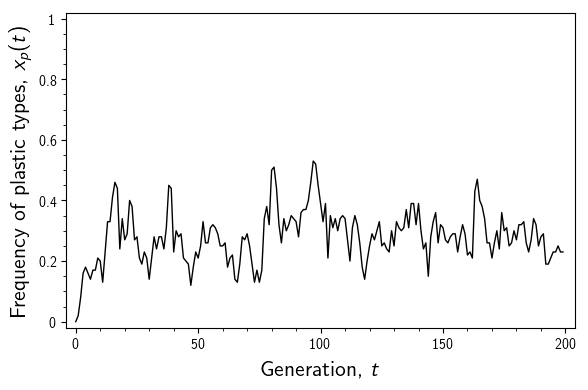

In [52]:
list_plot(freqType,plotjoined=True,color='black',xmin=0, xmax=nbGen,ymin=0, ymax=1, axes=False,axes_labels=["Generation, $t$","Frequency of plastic types, $x_p(t)$"],frame=True,transparent='TRUE')

### Reproducing analytical results

#### Only pure types

We start with a population of pure types only and set the pure-plastic mutation rate to $\mu_a=0$. We simulate evolution in the Hawk-Dove game to check whether our population converges to the ESS.

In [54]:
resSim = simulPurePlastic(popSize=500,nbGen=1000,payoffs=[2.5,0.1,5,-1],k=0.3,mu_x=0.01,mu_a=0,mu_p=0,deltaP=0.05,baseline=0,freqP=0,freqC=0.52,initPlastic=[0,0,1,0,1],traitsMut=0)

In [56]:
burnIn=100
popSize=500
nbGen=1000

cFreq = [sum([resSim[0][g][i][1] for i in range(popSize)])/popSize.n() for g in range(nbGen)]
dynFreq = []
for j in [burnIn..nbGen]:
    cumFreq = sum(cFreq[burnIn:j+1])
    dynFreq += [[j,cumFreq/(j+1-burnIn)]]
dynFreq[-1]

[1000, 0.316668146503885]

/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


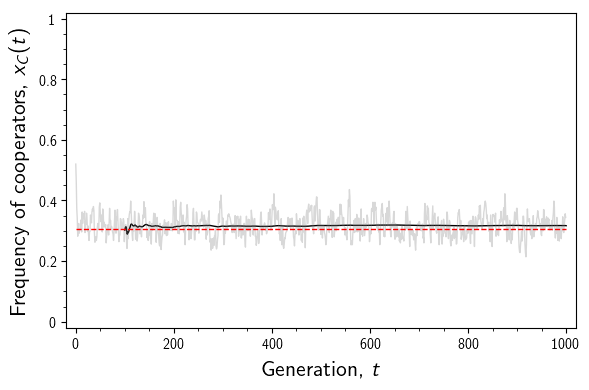

In [58]:

dynFreqP = list_plot(dynFreq,plotjoined=True,color='black',xmin=0, xmax=nbGen,ymin=0, ymax=1, axes=False,axes_labels=["Generation, $t$","Frequency of cooperators, $x_C(t)$"],frame=True,transparent='TRUE')
cFreqP = list_plot(cFreq,plotjoined=True,color='gray',xmin=0, xmax=nbGen,ymin=0, ymax=1, axes=False,axes_labels=["Generation, $t$","Frequency of cooperators, $x_C(t)$"],frame=True,transparent='TRUE',alpha=0.3)
intNEline = plot(intNE.subs(R=2.5,S=0.1,T=5,P=-1),xmin=0, xmax=nbGen,ymin=0, ymax=1,linestyle="--",color="red")
show(dynFreqP+cFreqP+intNEline)

In [138]:
save(dynFreqP+cFreqP+intNEline, "SDpureSimul.pdf")

/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


#### Reproducing my paper's analytical results

We start in the interior of the simplex (i.e., with a population consisting of pure and plastic types). Our plastic types initially all use the same strategy $\mathbf{z}$ and have $\varepsilon=\varepsilon_p=0$. We set all the mutation rates to 0 (since we start in the interior of the simplex are we are not interested here in the evolution of the plastic response itself).

In [59]:
zC=0.03
zD=1
zP=0.9

resSim1 = simulPurePlastic(popSize=300,nbGen=2000,payoffs=[2.5,0.1,5,-1],k=0.3,mu_x=0.05,mu_a=0,mu_p=0,deltaP=0.05,baseline=0,freqP=0.75,freqC=0.5,initPlastic=[0,0,zC,zD,zP],traitsMut=0)

In [63]:
burnIn=150
nbGen=2000

#cFreq = [sum([allPop[g][i][1] for i in range(popSize)])/popSize.n() for g in range(nbGen)]
dynFreq = []
for j in [burnIn..nbGen]:
    cumFreq = sum(resSim1[1][burnIn:j+1])
    dynFreq += [[j,cumFreq/(j+1-burnIn)]]
dynFreq[-1]

[2000, 0.198622366288493]

/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


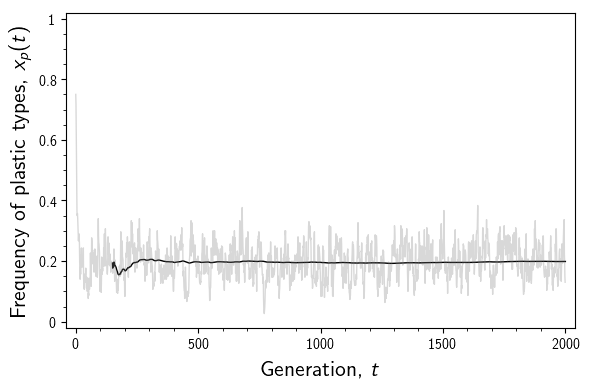

In [64]:
dynFreqP = list_plot(dynFreq,plotjoined=True,color='black',xmin=0, xmax=nbGen,ymin=0, ymax=1, axes=False,axes_labels=["Generation, $t$","Frequency of plastic types, $x_p(t)$"],frame=True,transparent='TRUE')
cFreqP = list_plot(resSim1[1],plotjoined=True,color='gray',xmin=0, xmax=nbGen,ymin=0, ymax=1, axes=False,axes_labels=["Generation, $t$","Frequency of plastic types, $x_p(t)$"],frame=True,transparent='TRUE',alpha=0.3)
show(dynFreqP+cFreqP)

There seems to be a good match between analytical results and the simulations *regarding the equilibrium frequency of plastic types*. However, it also seems that there are discrepancy regarding other aspects. Namely, in the analytical results the above parameters lead to an equilibrium where only plasticity and defection co-exist. In the simulations, we rather find that cooperators also survive in what seems to be an evolutionary equilibrium. To be continued...

In [101]:
simToP

(x, y) |--> (-1/2*x - y + 1, 1/2*sqrt(3)*x)

In [96]:
import copy

burnIn=100
popSize=300
nbGen=2000

#cFreqC = [sum([if resSim[0][g][i][1] for i in range(popSize)])/popSize.n() for g in range(nbGen)]

cFnp = [[0,0] for g in range(nbGen)]

for g in range(nbGen): 
    cNc = 0
    if(resSim1[1][g]<1):
        cNp = resSim1[1][g]*popSize
        cNnp = popSize-cNp
        for i in range(popSize):
            if(resSim1[0][g][i][0]==0):
                if(resSim1[0][g][i][1]==1):
                    cNc += 1
        cFnp[g] = copy.deepcopy([n(cNc/popSize),n(1-(cNc/popSize)-resSim1[1][g])])
    else:
        cFnp[g] = [0,0]


        
        
        

#dynFreq = []
#for j in [burnIn..nbGen]:
#    cumFreq = sum(cFreq[burnIn:j+1])
#    dynFreq += [[j,cumFreq/(j+1-burnIn)]]
#dynFreq[-1]

In [100]:
cFnp[-1]

[0.0933333333333333, 0.776666666666667]

In [177]:
import copy

burnIn=100
popSize=300
nbGen=2000

#cFreqC = [sum([if resSim[0][g][i][1] for i in range(popSize)])/popSize.n() for g in range(nbGen)]

step=100

Tout =srange(0, nbGen, step)+[nbGen-1]
cFnpS = []

for g in Tout: 
    cNc = 0
    if(resSim1[1][g]<1):
        cNp = resSim1[1][g]*popSize
        cNnp = popSize-cNp
        for i in range(popSize):
            if(resSim1[0][g][i][0]==0):
                if(resSim1[0][g][i][1]==1):
                    cNc += 1
        cFnpS += [simToP(n(cNc/popSize),n(1-(cNc/popSize)-resSim1[1][g]))]
    else:
        cFnpS += [simToP(0,0)]

In [178]:
cFnpS[-6]

(0.308333333333333, 0.0550000000000000*sqrt(3))

/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


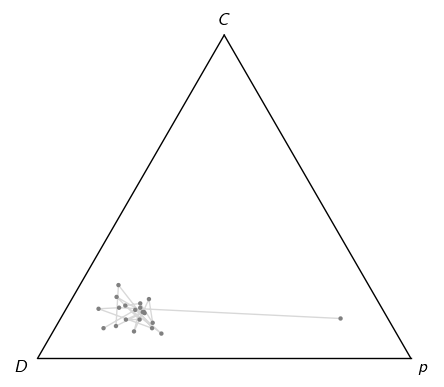

In [179]:
fSim=setSimplex("$p$","$C$","$D$",13,53);

freqSim = list_plot(cFnpS,plotjoined=True,color='gray', axes=False,frame=False,transparent='TRUE',alpha=0.3)
freqSimP = list_plot(cFnpS,plotjoined=False,color='gray', axes=False,frame=False,transparent='TRUE')


show(fSim+freqSim+freqSimP)


In [67]:
resSim1[0][-1][20:40]

[[1, [0, 0, 0.0300000000000000, 1, 0.900000000000000]],
 [0, 0],
 [0, 0],
 [0, 0],
 [1, [0, 0, 0.0300000000000000, 1, 0.900000000000000]],
 [0, 1],
 [0, 0],
 [0, 0],
 [0, 1],
 [0, 0],
 [0, 0],
 [1, [0, 0, 0.0300000000000000, 1, 0.900000000000000]],
 [1, [0, 0, 0.0300000000000000, 1, 0.900000000000000]],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [1, [0, 0, 0.0300000000000000, 1, 0.900000000000000]],
 [0, 0],
 [0, 0]]

### Numerical experiments

#### Robustness to perceptual errors

In these simulations, we treat $\varepsilon,\varepsilon_p,\mathbf{z^*}$ as non-evolving parameters and we ask whether the response $\mathbf{z^*}$ that we found in the analytical results to be the optimal response of plastic types still allows plasticity to be stable and invade pure types.

Note that these numerical experiments could be performed using the replicator dynamics framework set in our sections on analytical results.

#### Evolution of the plastic response $\mathbf{z}$

In these simulations, we treat $\varepsilon,\varepsilon_p$ as non-evolving parameters and we let evolve both the frequency of plastic types as well as their response, $\mathbf{z}$, to pure types.

##### Pure greenbeards $z_C=z_D$, $\varepsilon=\varepsilon_p=0$

In this section, the plastic types behave as pure greenbeards. They have one response $z_p$ to other plastic types, and one response $z_C=z_D=z_{-p}$ to non-plastic types. We assume they make no errors (as a first take) and let evolve the two traits $(z_{p},z_{-p})$ as well as the frequency of plastic types.

##### No beards $z_p=(z_C+z_D)/2$

In this section, the plastic type can distinguish $C$ from $D$ but cannot distinguish plastic types from pure types. We capture this by setting $\varepsilon_p=1$ (and we still let $z_p$ evolve; an alternative would have been that $z_p=(z_C+z_D)/2$ and the value of $\varepsilon_p$ would then not matter because all values $\varepsilon_p$ would produce the same $q_p$).

#### Free evolution in the $(p,\varepsilon,\varepsilon_p,\mathbf{z})$- space

All traits co-evolve simultaneously. The plastic types are initially absent and can emerge only through mutations. The first plastic mutants have a very high error rate $\varepsilon,\varepsilon_p=1-\delta$ for $\delta$ small. The main interest here is to see if plasticity can invade (maybe aided by genetic drift...).

### Plotting simulation results

In [72]:
burnIn=100

cFreq = [sum([allPop[g][i][1] for i in range(popSize)])/popSize.n() for g in range(nbGen)]
dynFreq = []
for j in [burnIn..nbGen]:
    cumFreq = sum(cFreq[burnIn:j+1])
    dynFreq += [[j,cumFreq/(j+1-burnIn)]]
dynFreq[-1]

[500, 0.984426433915217]

/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/slimane/opt/miniconda3/envs/sage/lib/python3.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


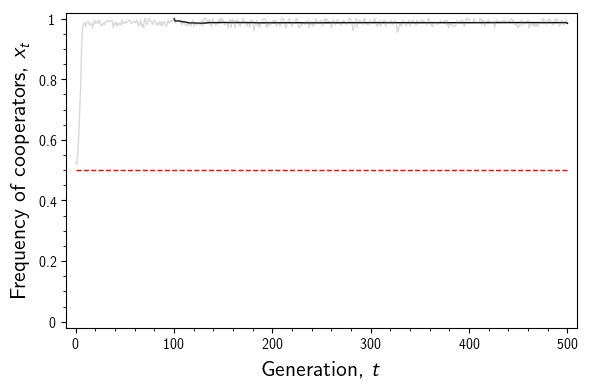

In [75]:
dynFreqP = list_plot(dynFreq,plotjoined=True,color='black',xmin=0, xmax=nbGen,ymin=0, ymax=1, axes=False,axes_labels=["Generation, $t$","Frequency of cooperators, $x_t$"],frame=True,transparent='TRUE')
cFreqP = list_plot(cFreq,plotjoined=True,color='gray',xmin=0, xmax=nbGen,ymin=0, ymax=1, axes=False,axes_labels=["Generation, $t$","Frequency of cooperators, $x_t$"],frame=True,transparent='TRUE',alpha=0.3)
intNEline = plot(intNE.subs(R=cR,S=cS,T=cT,P=cP),xmin=0, xmax=nbGen,ymin=0, ymax=1,linestyle="--",color="red")
show(dynFreqP+cFreqP+intNEline)

In [324]:
sum([allPop[1][i][1] for i in range(popSize)])/popSize.n()

0.180000000000000

In [83]:
nbGen=10
for g in (3..9):
    print(g)

3
4
5
6
7
8
9
